# Laboratorio No.9 - Visualizacion de datos
**Integrantes**
- Paola de León 20361
- Gabriela Contreras 20213 


### Cargar data

In [21]:
import random
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data = pd.read_csv("Food_Share_Emissions.csv")

C:\Users\Contreras GP\AppData\Local\Temp\ipykernel_44732\4148797243.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### Gráficos

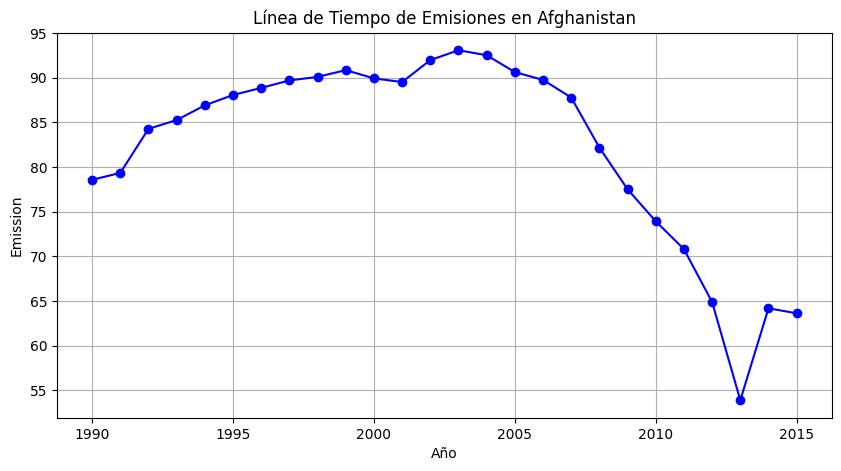

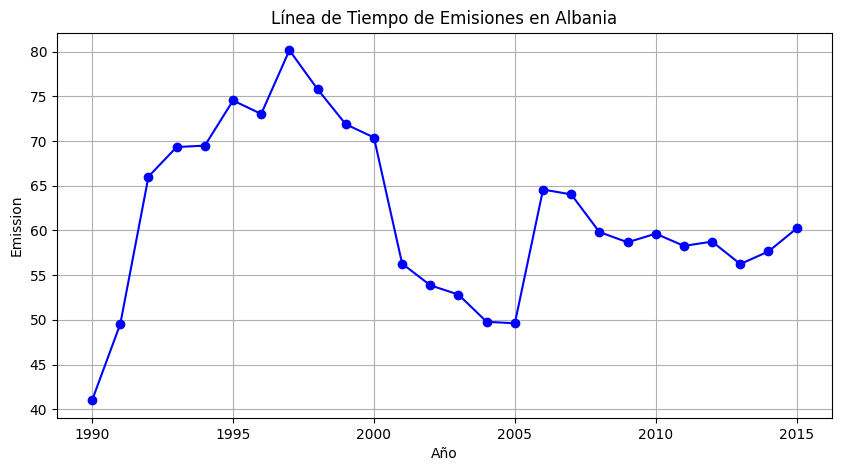

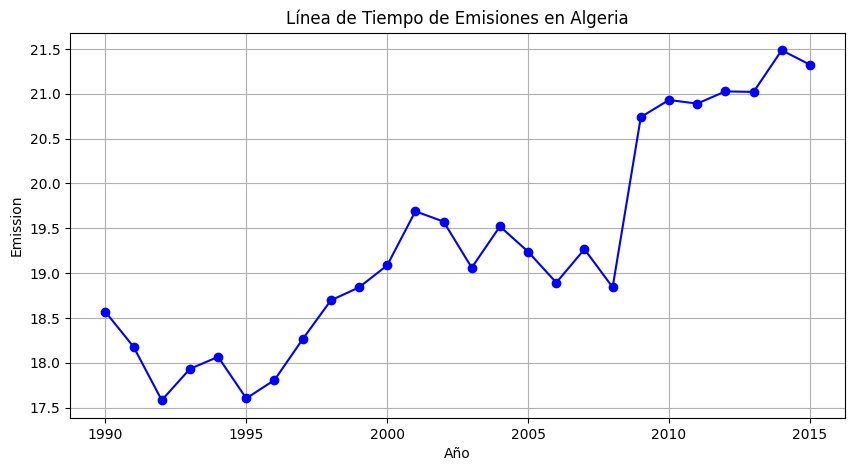

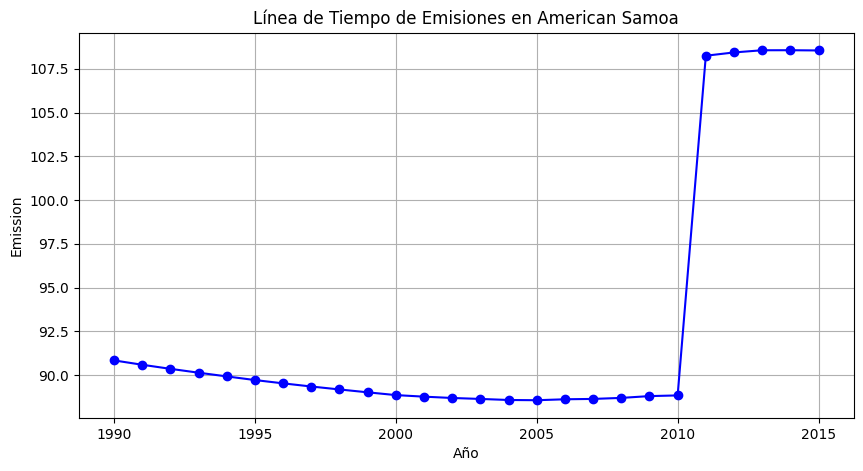

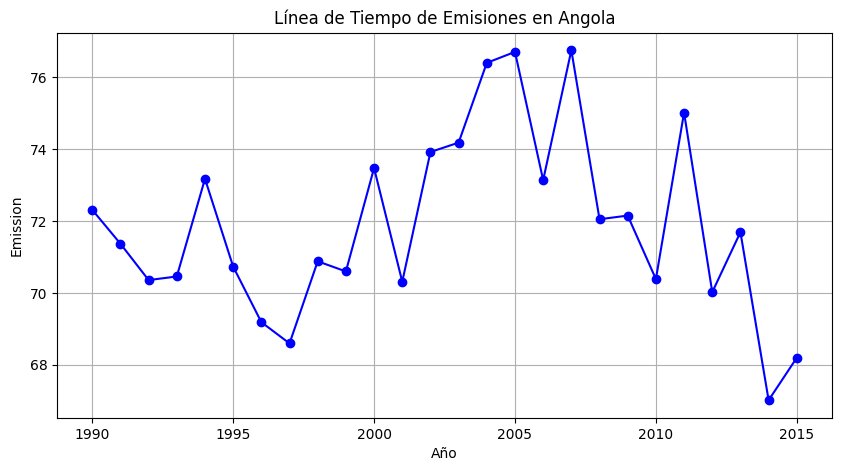

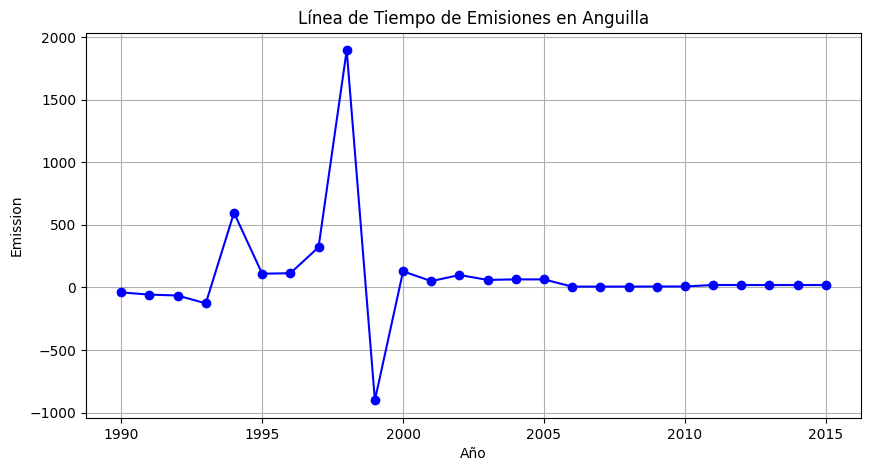

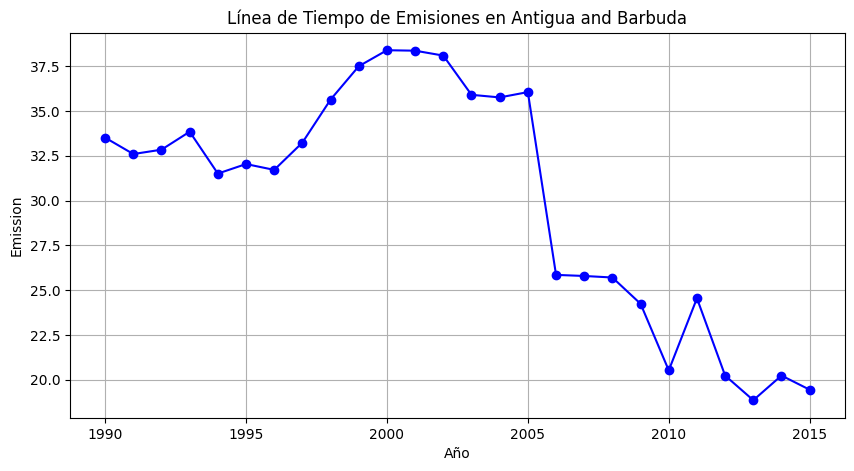

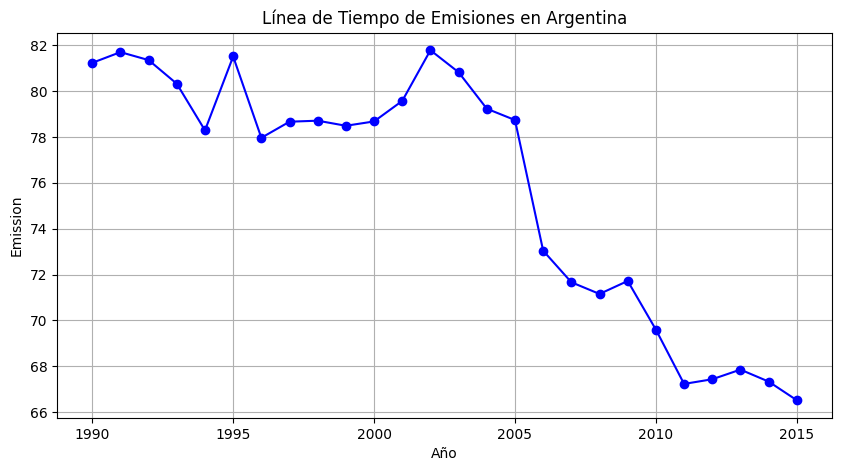

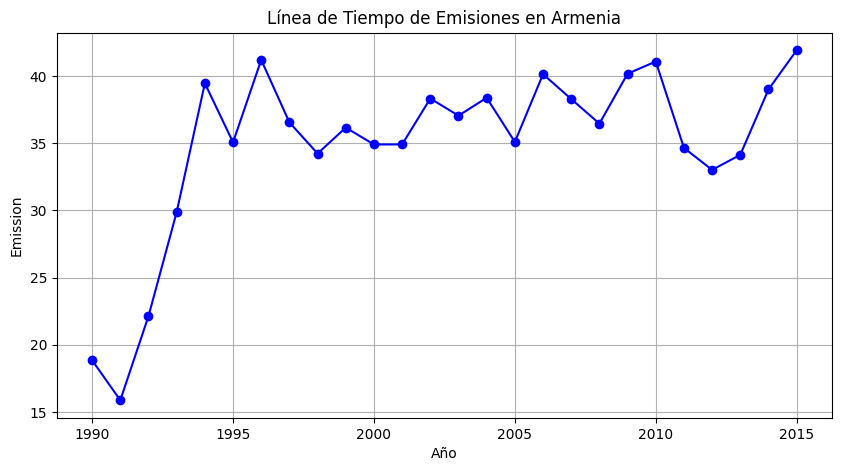

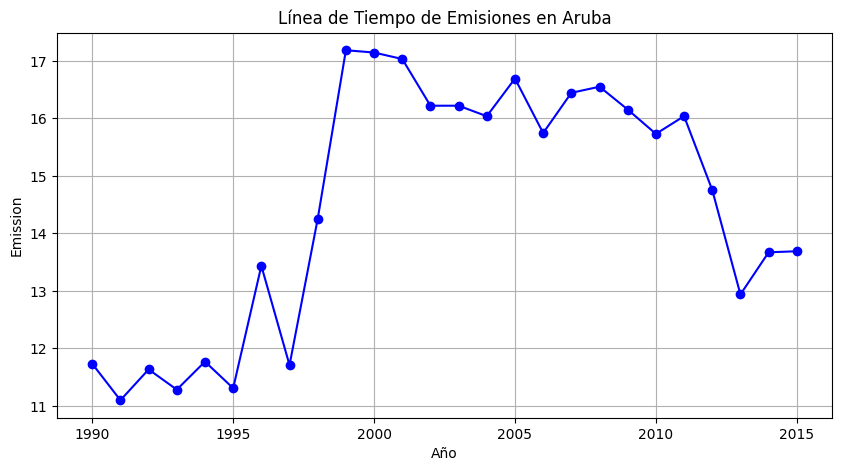

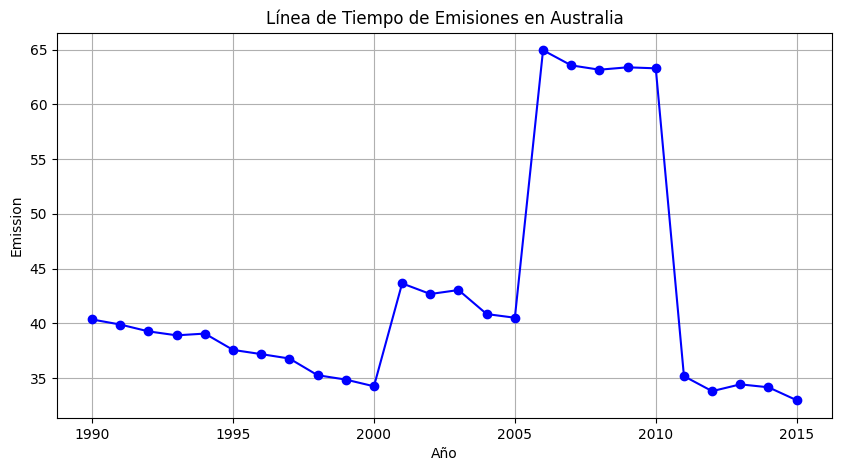

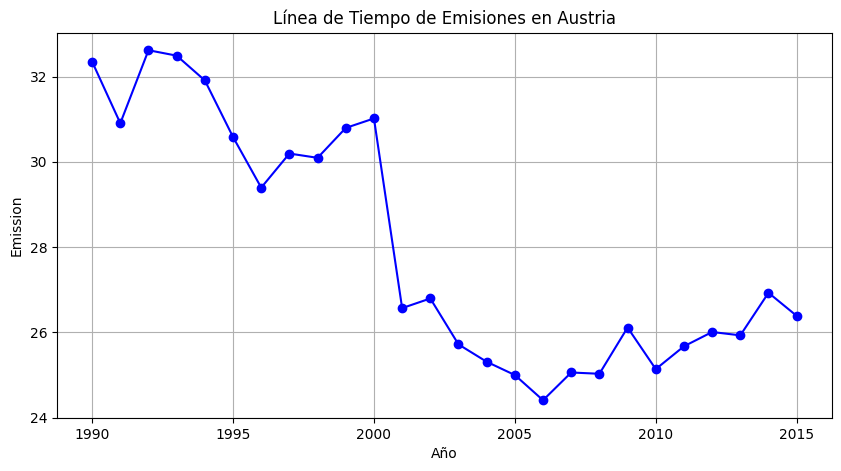

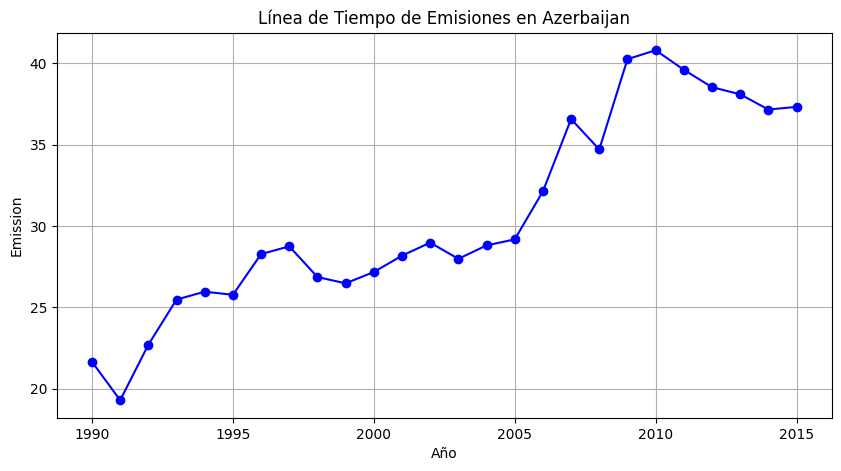

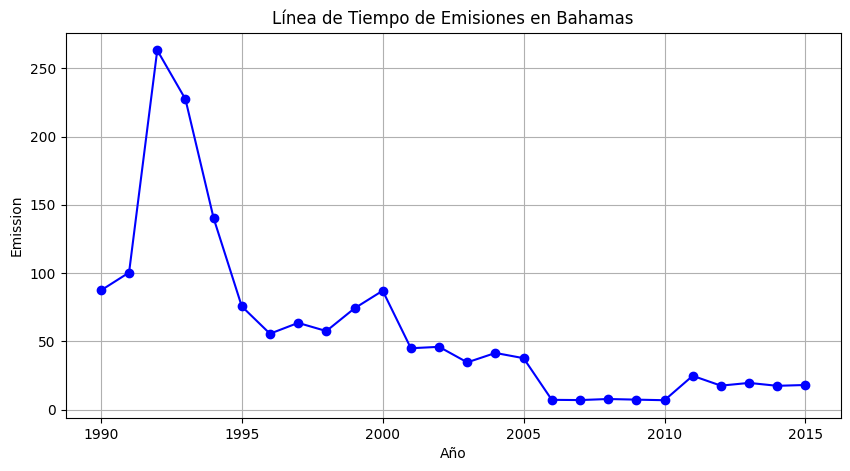

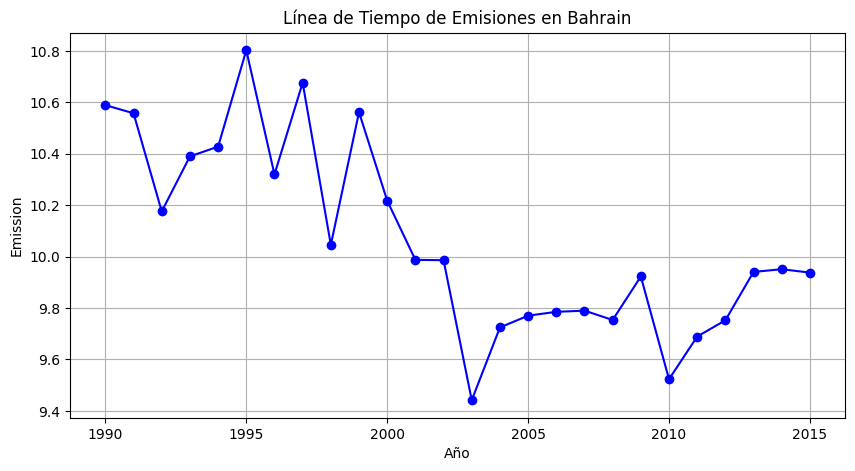

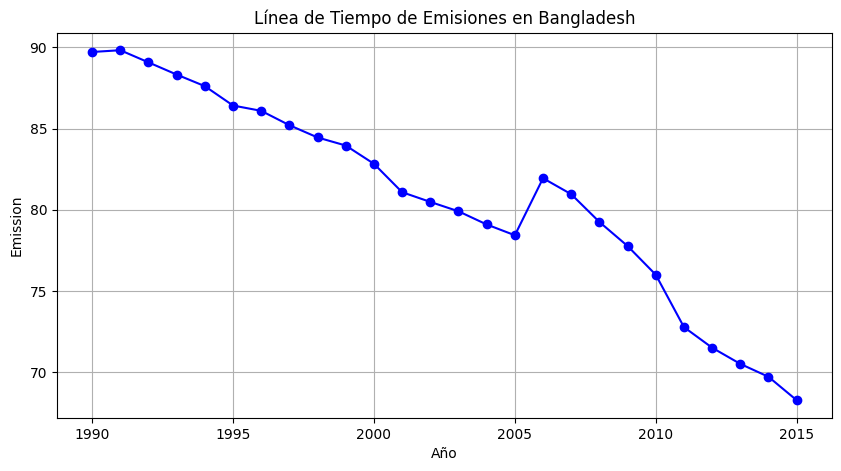

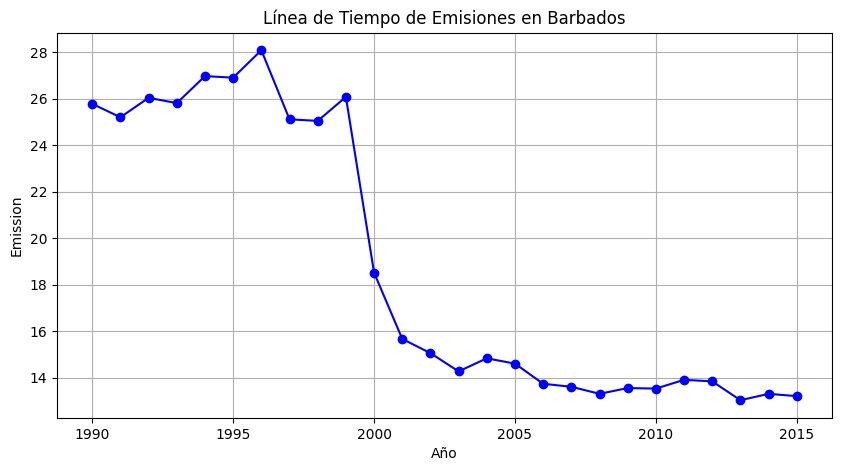

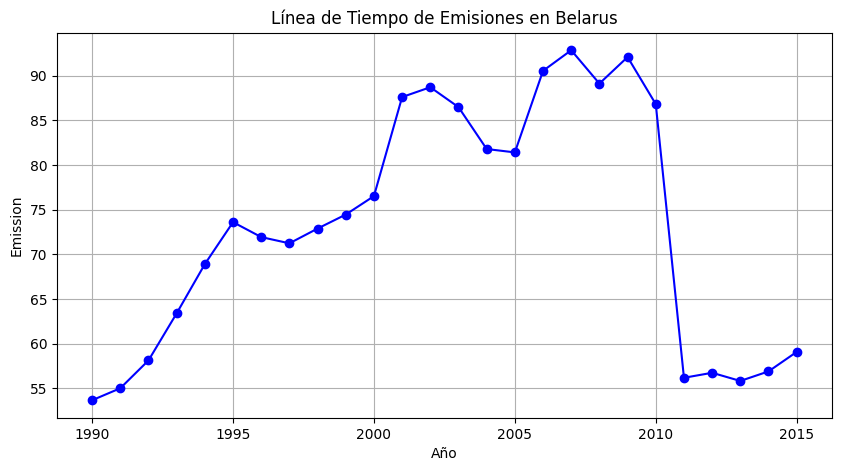

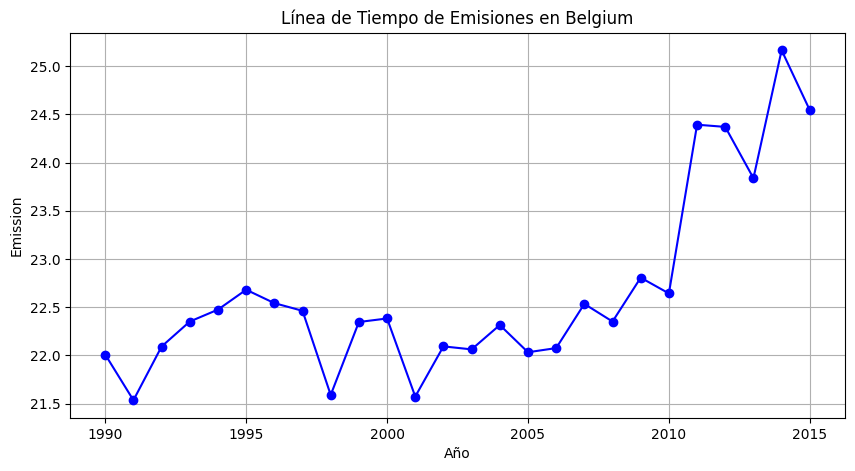

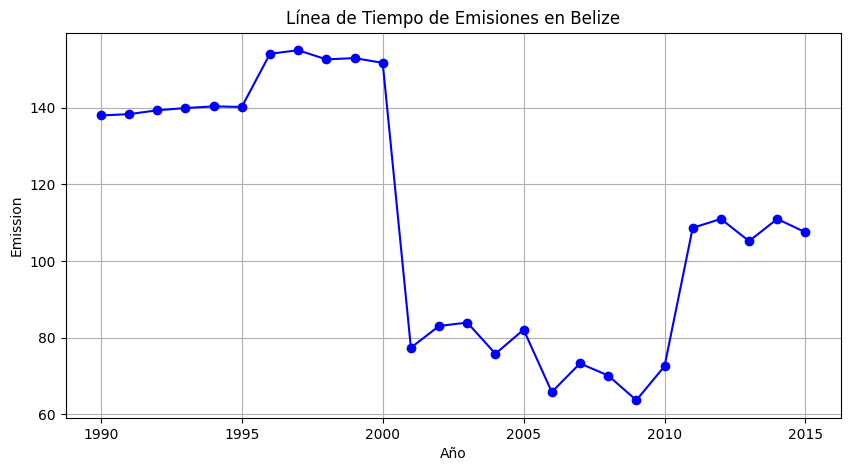

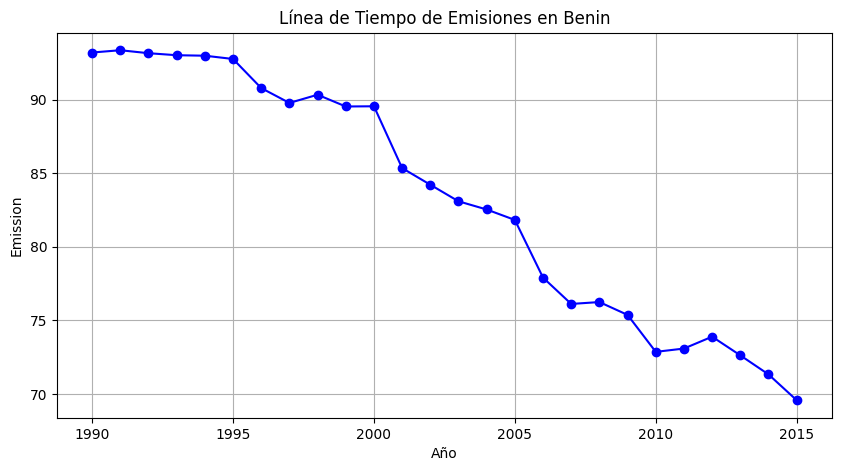

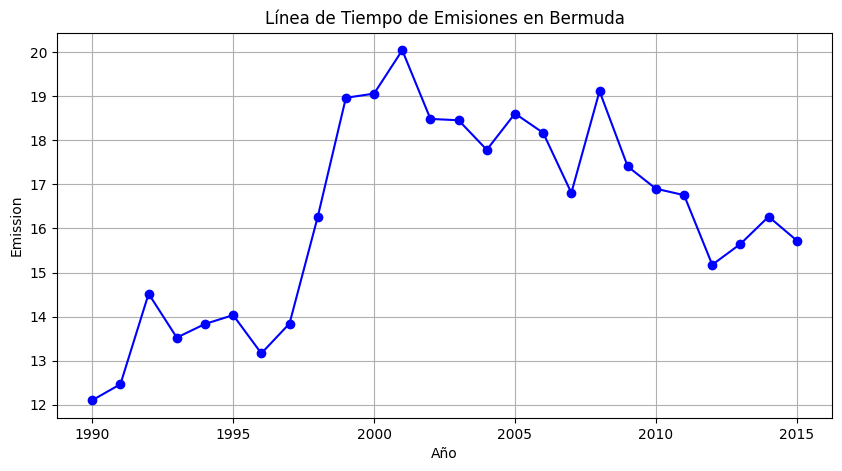

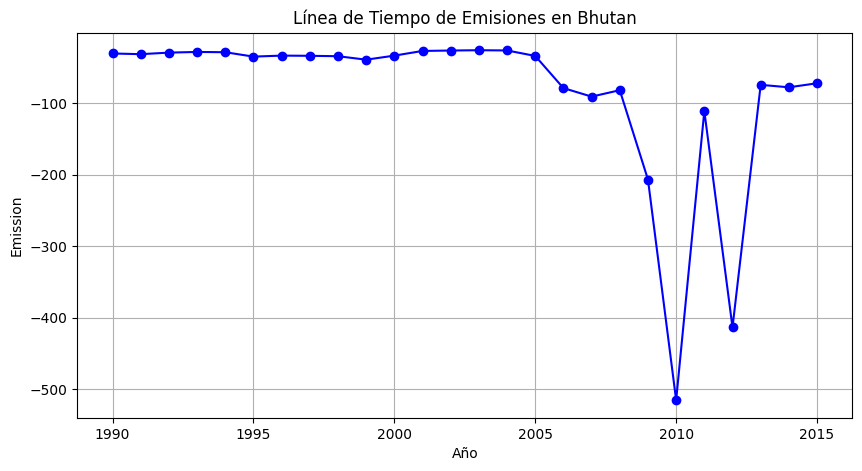

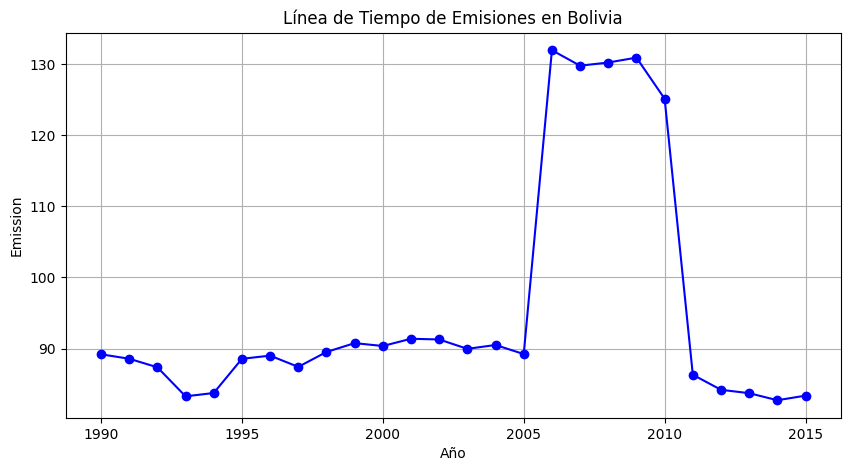

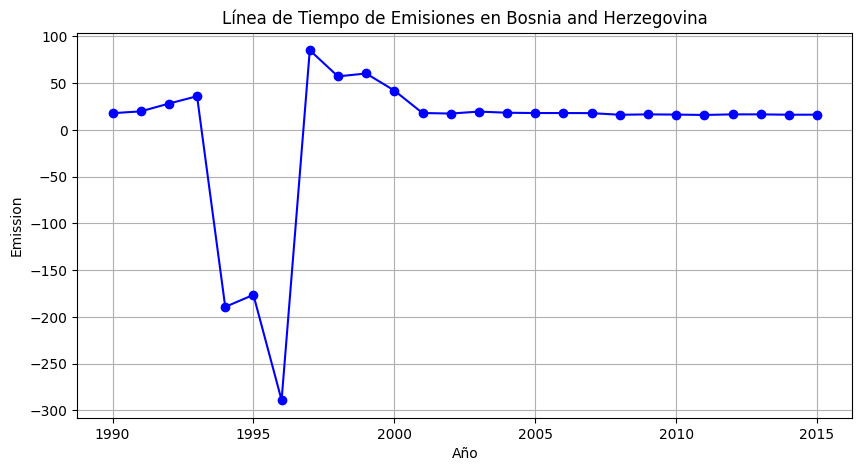

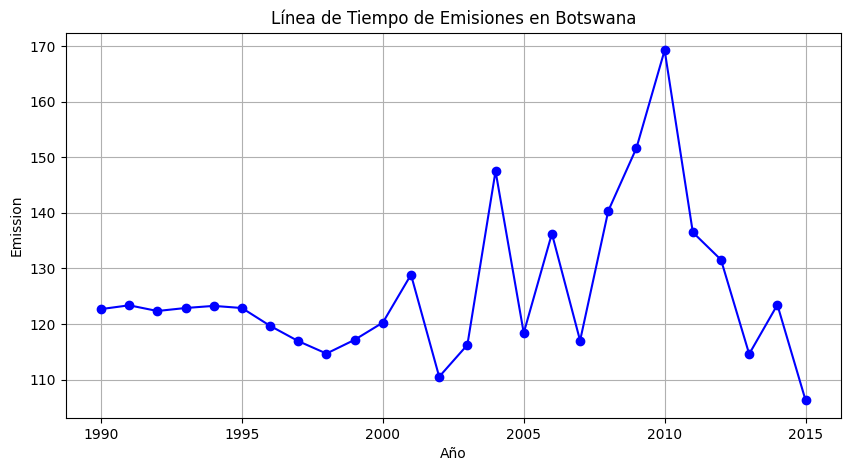

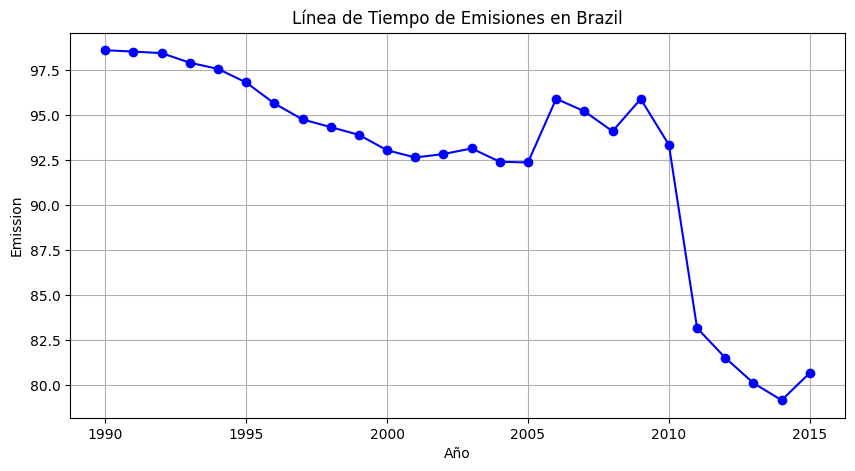

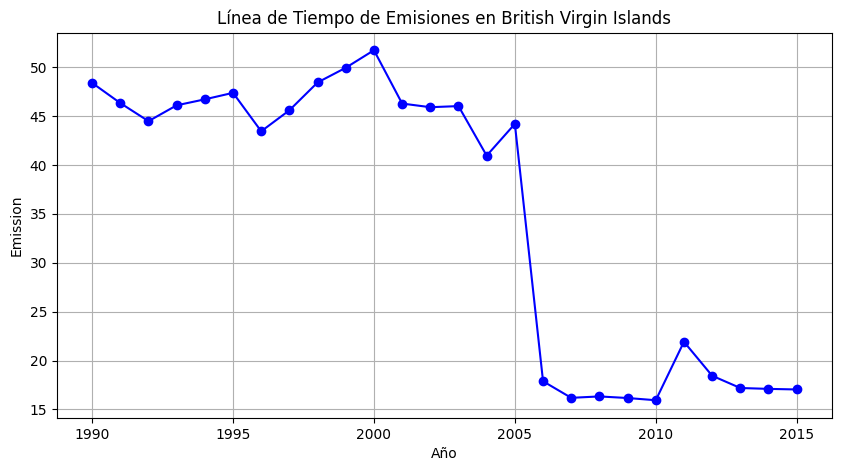

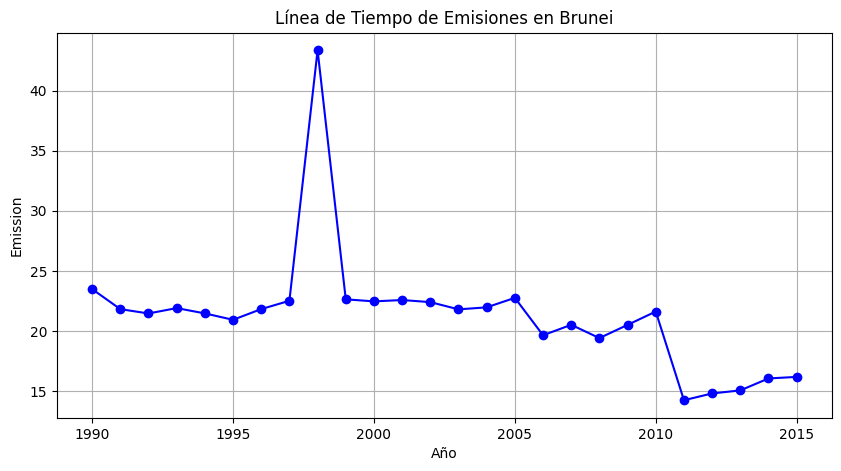

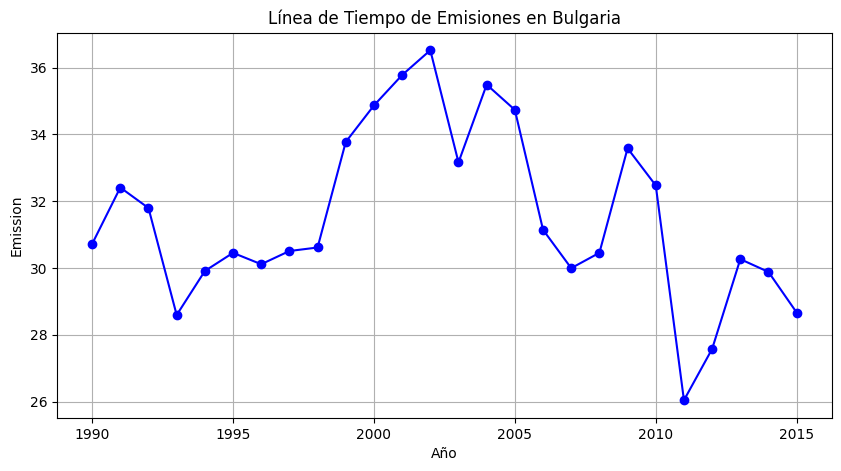

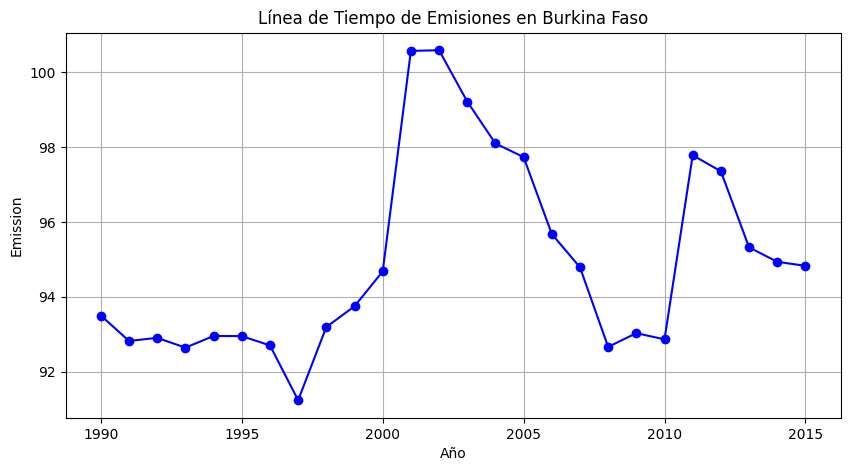

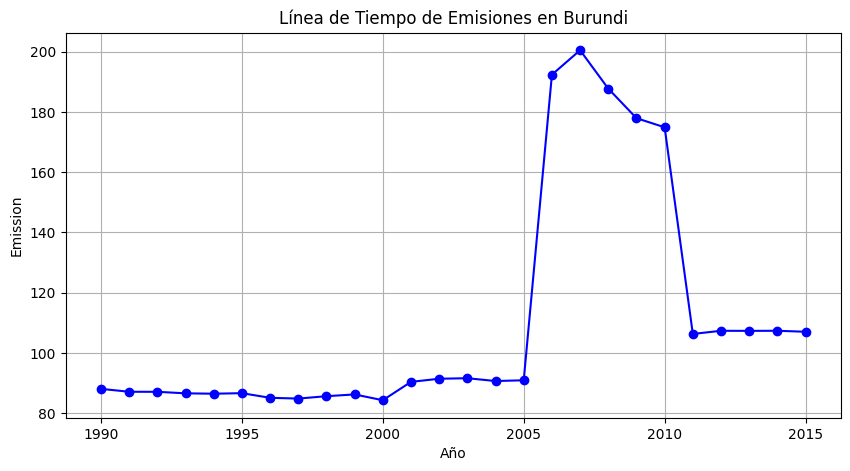

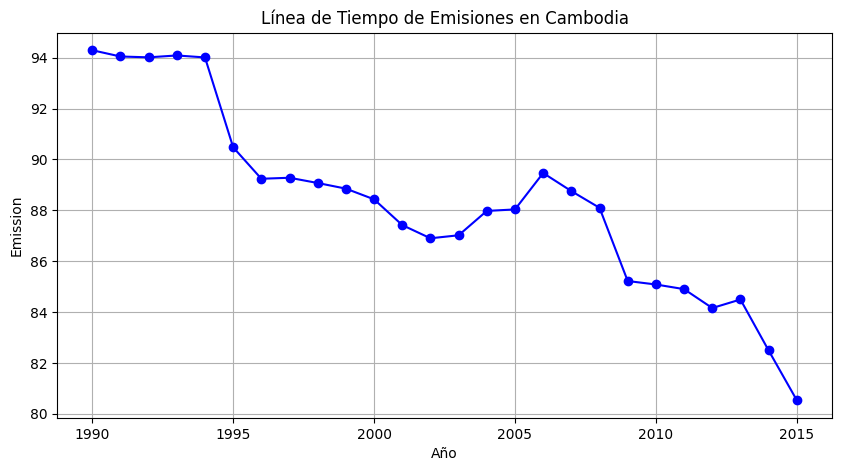

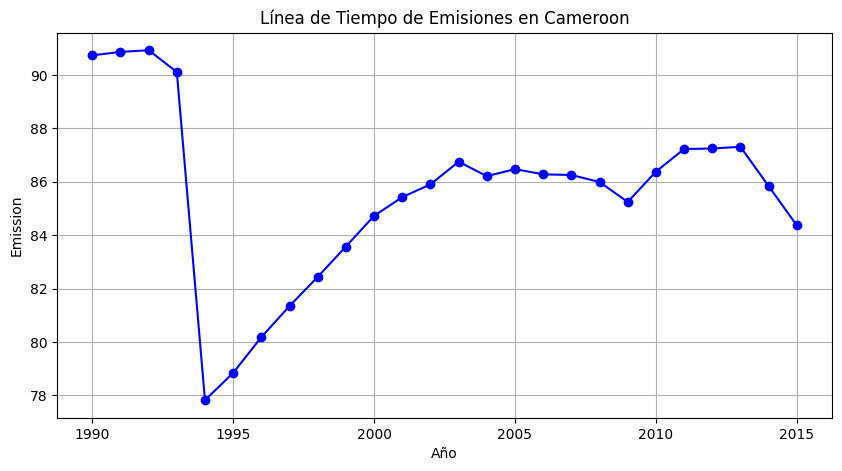

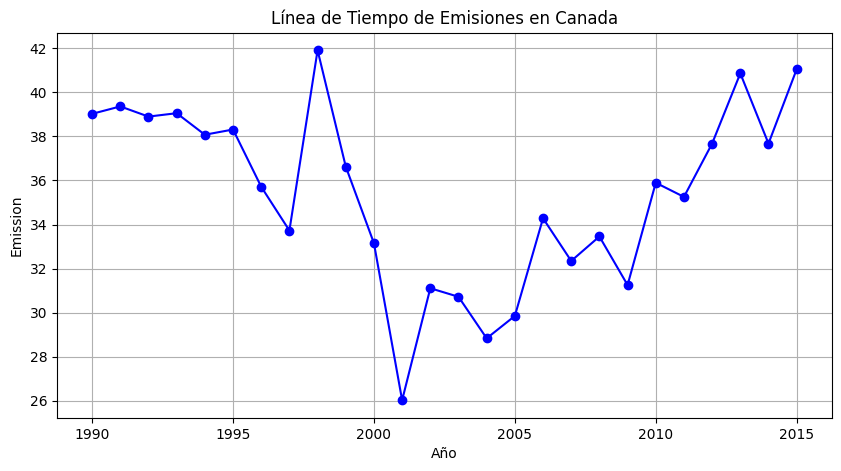

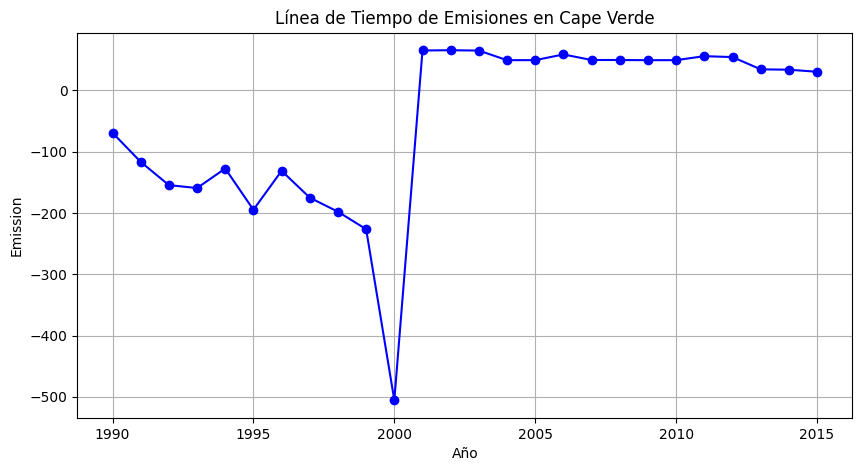

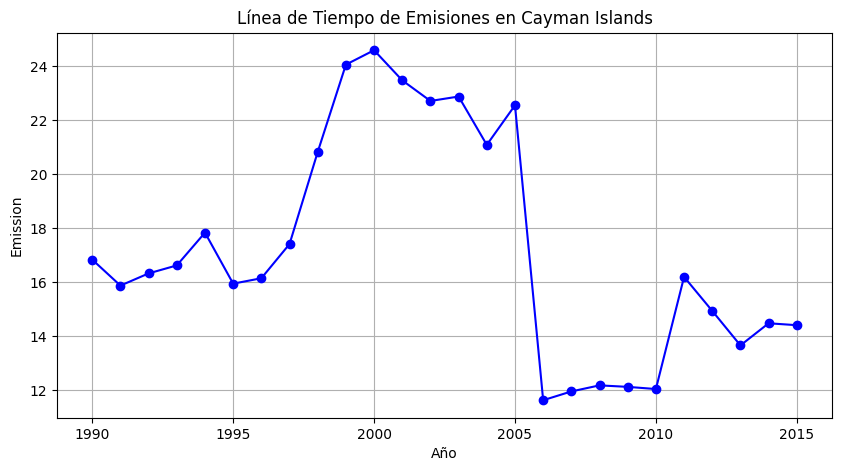

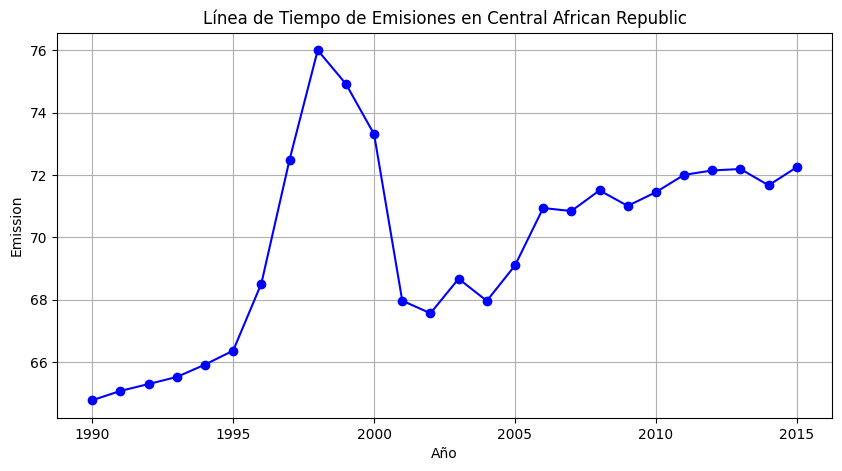

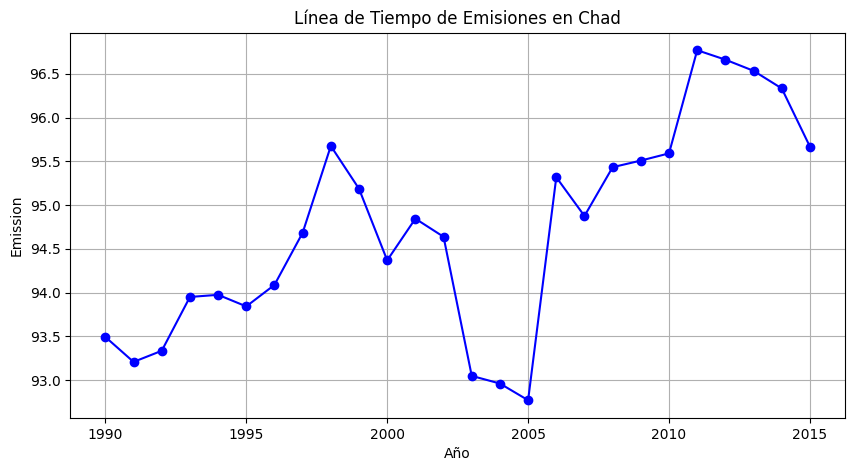

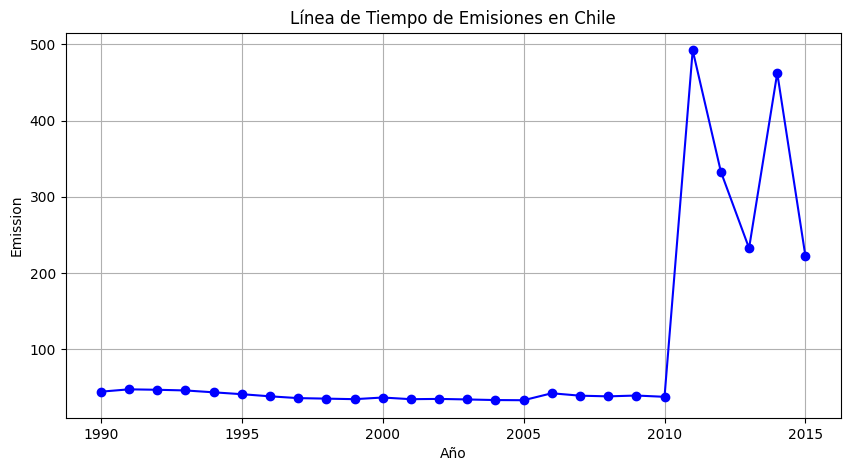

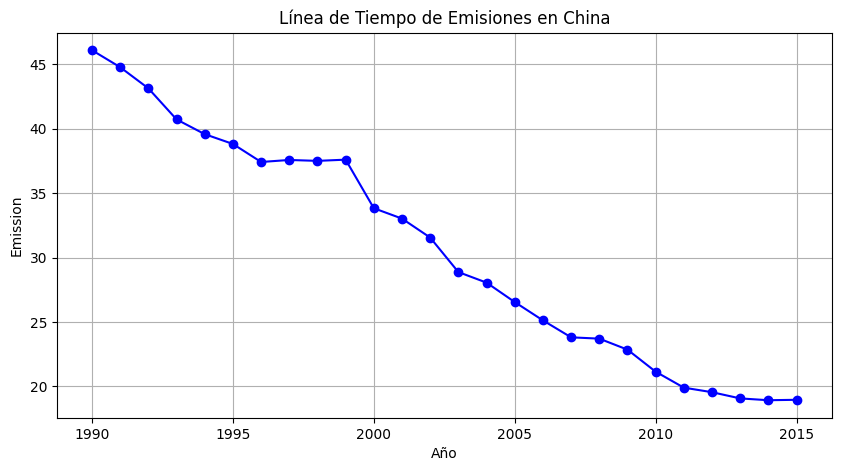

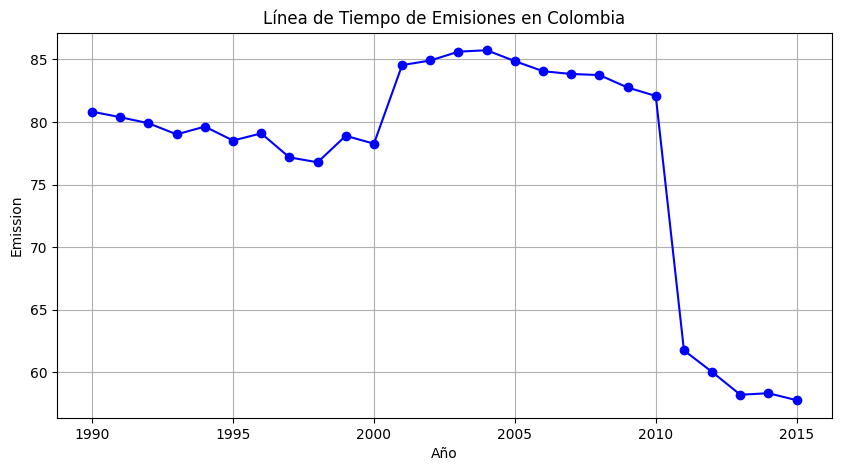

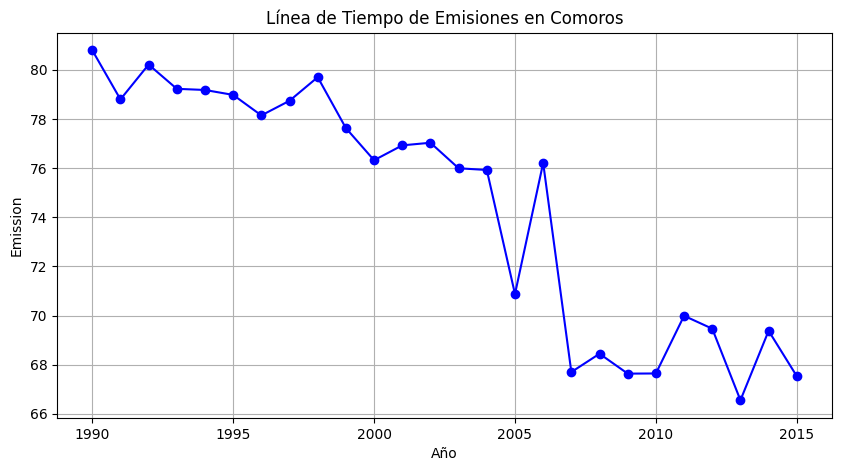

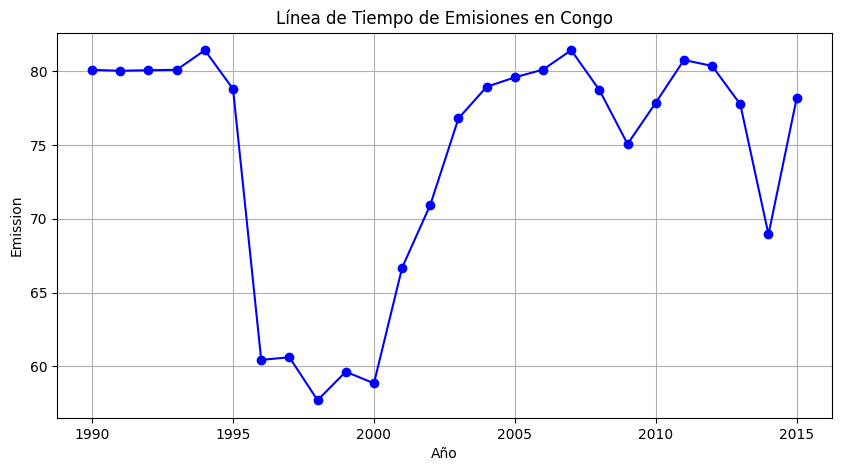

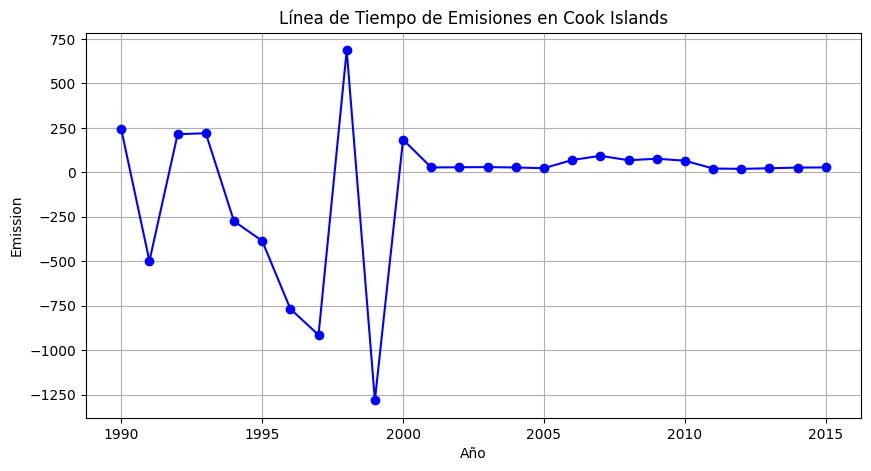

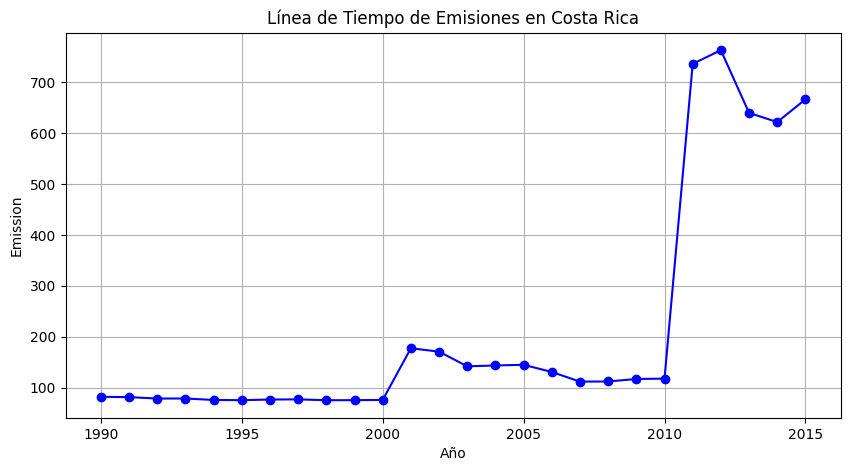

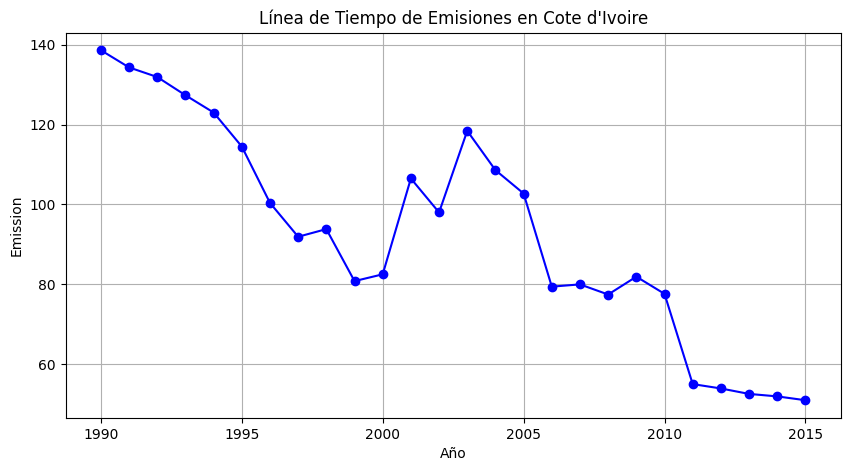

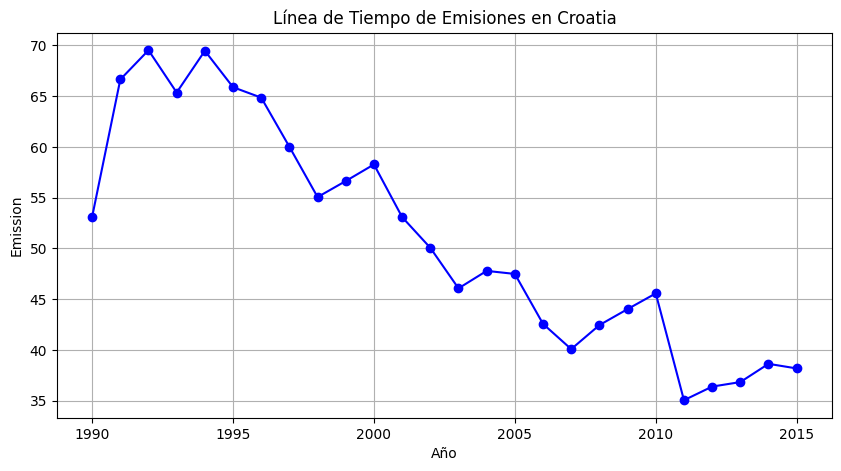

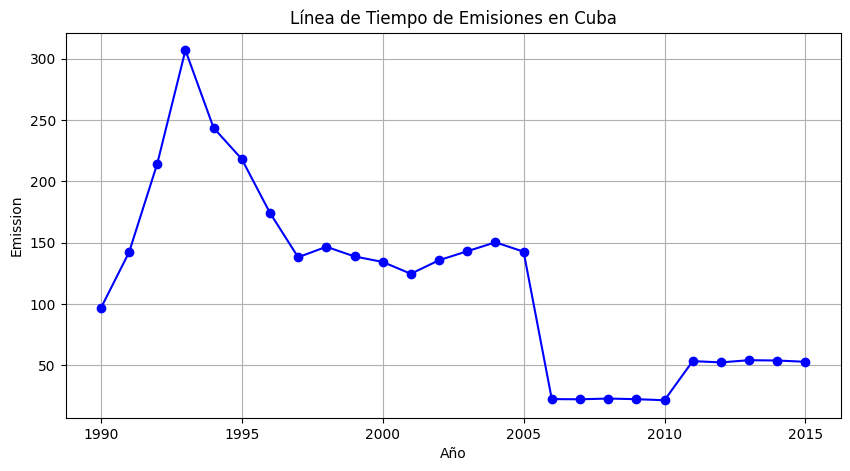

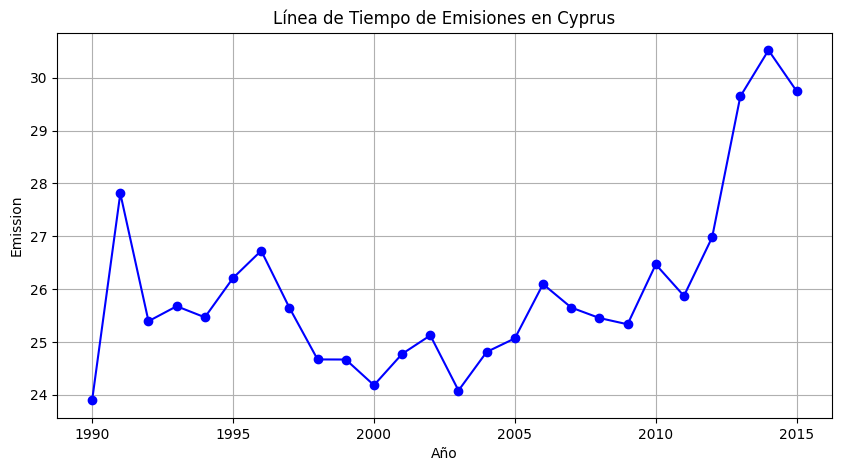

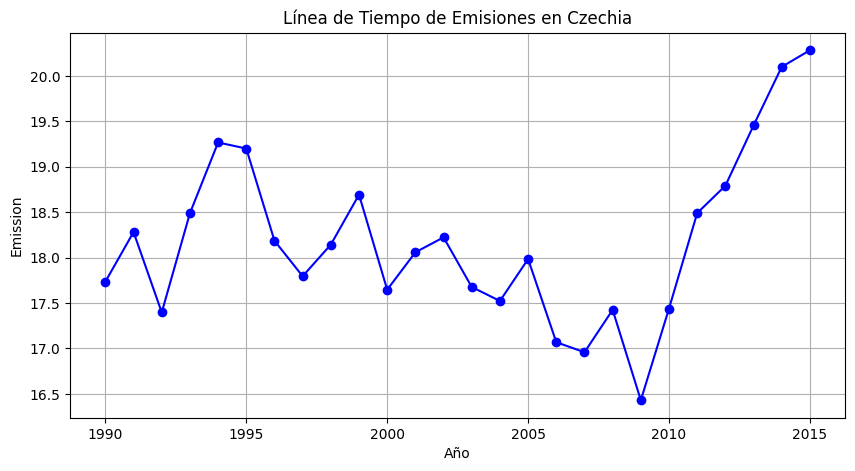

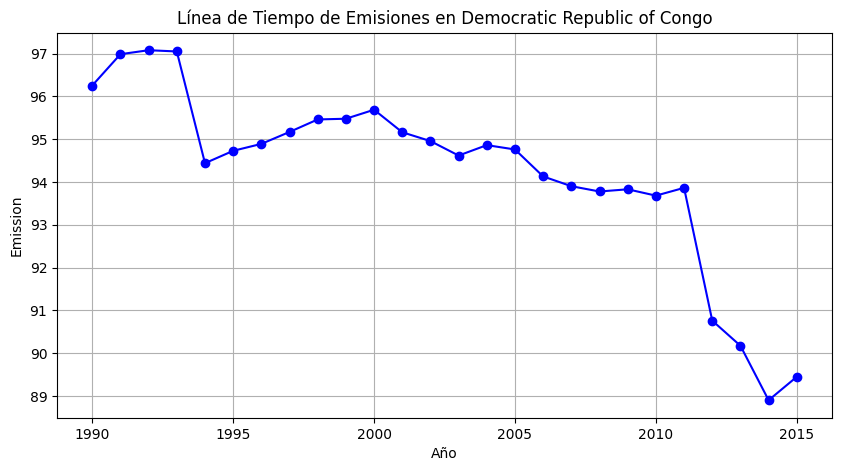

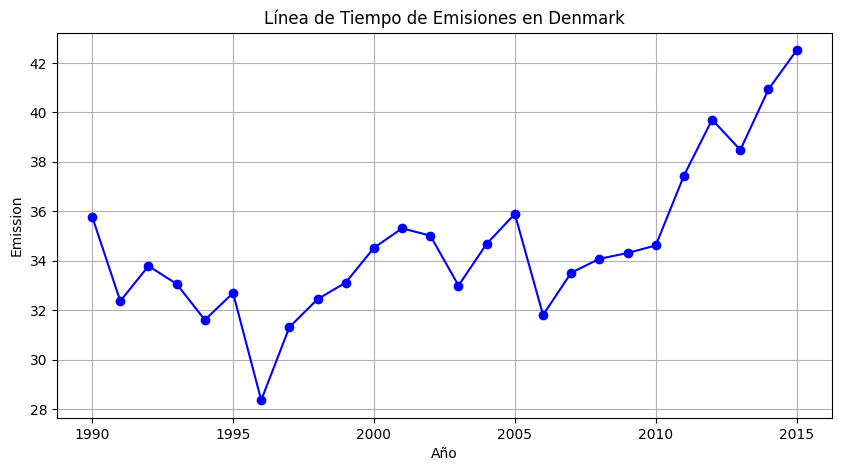

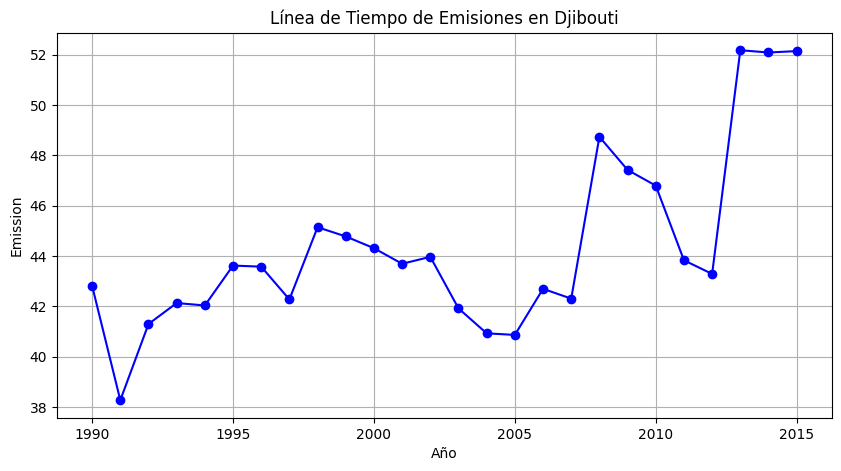

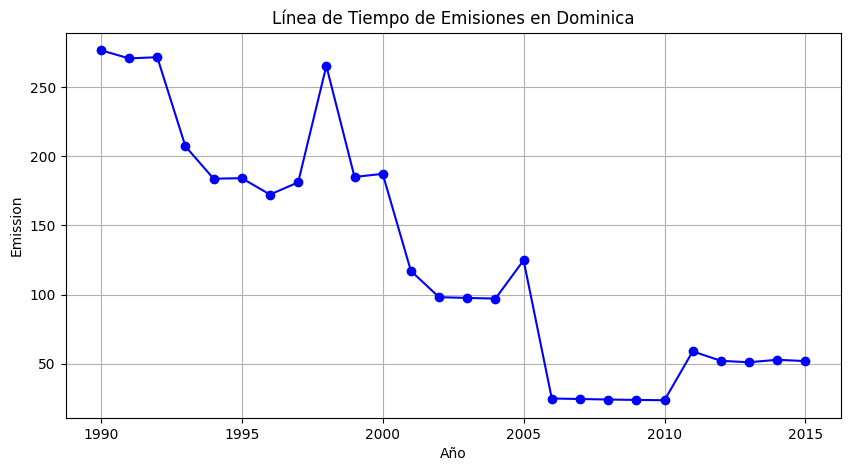

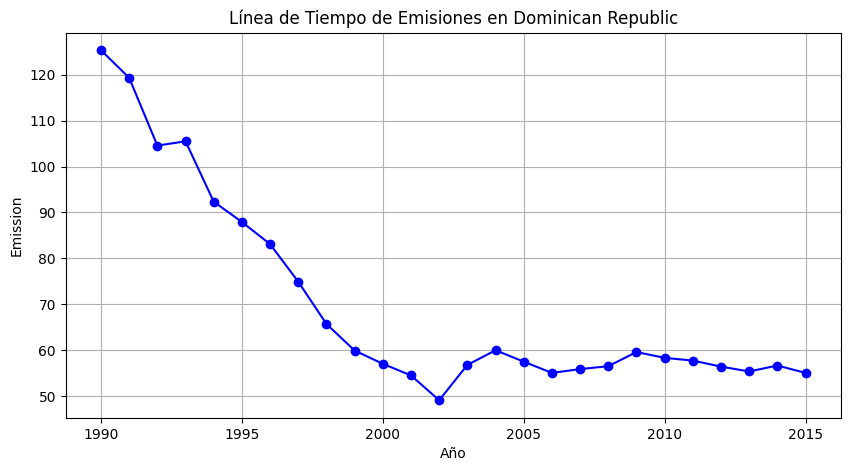

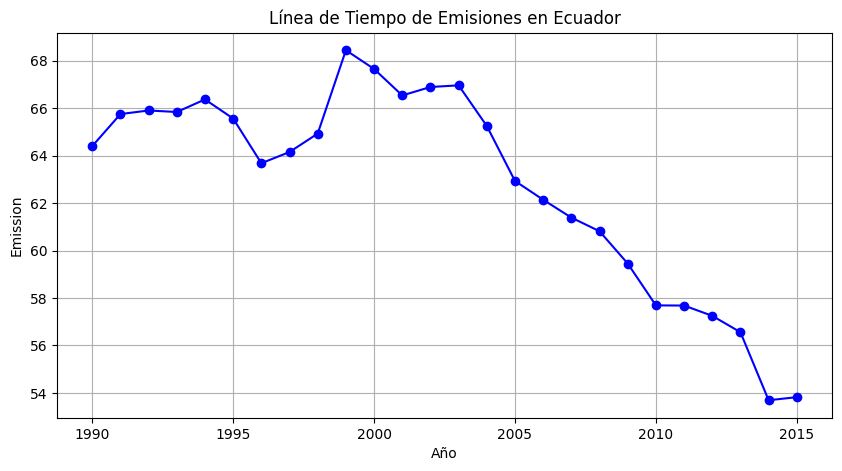

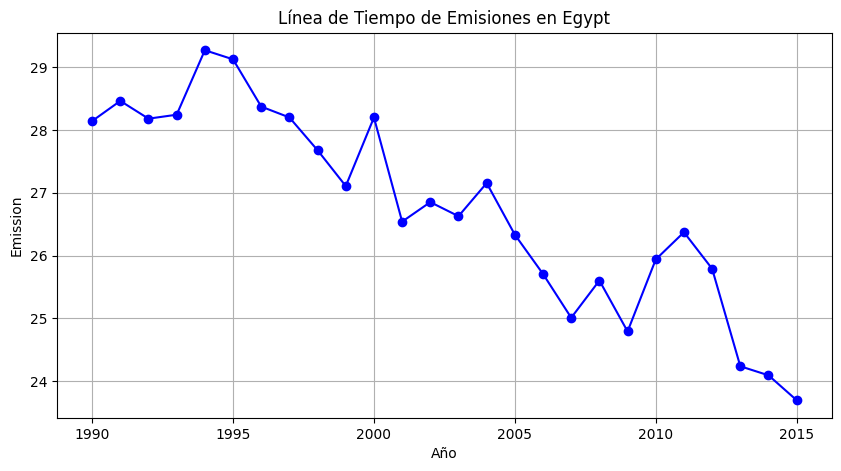

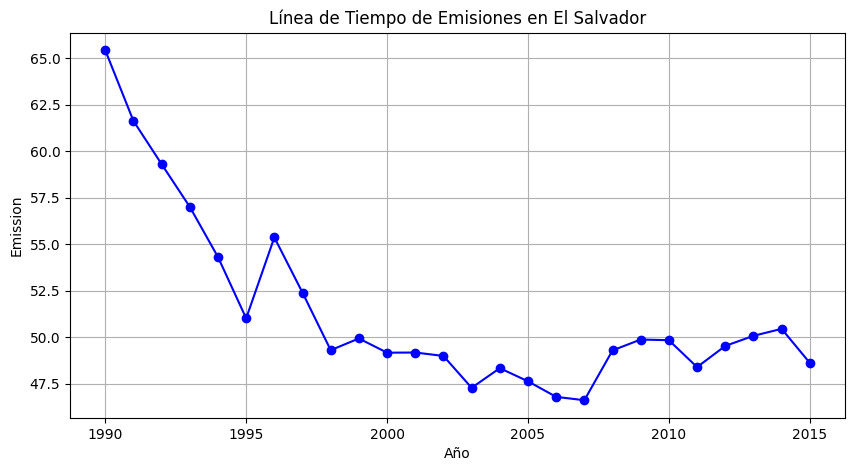

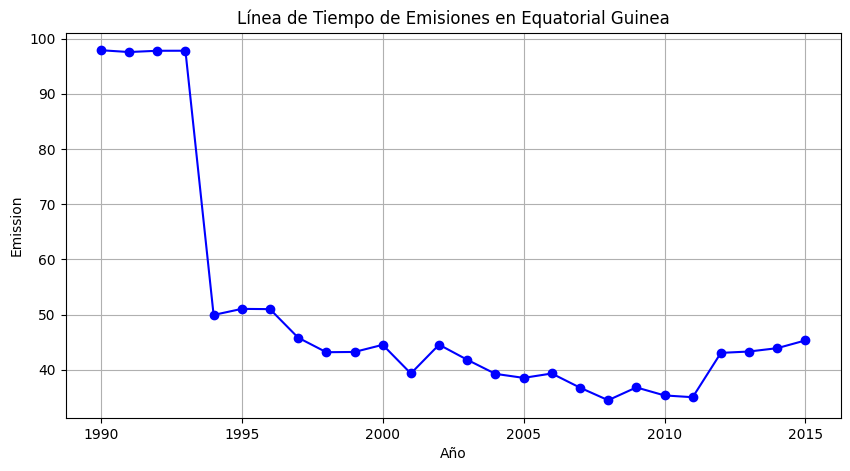

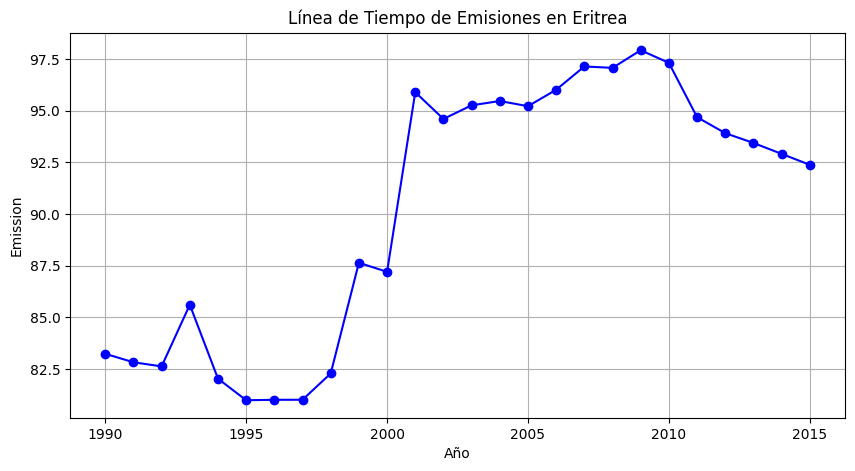

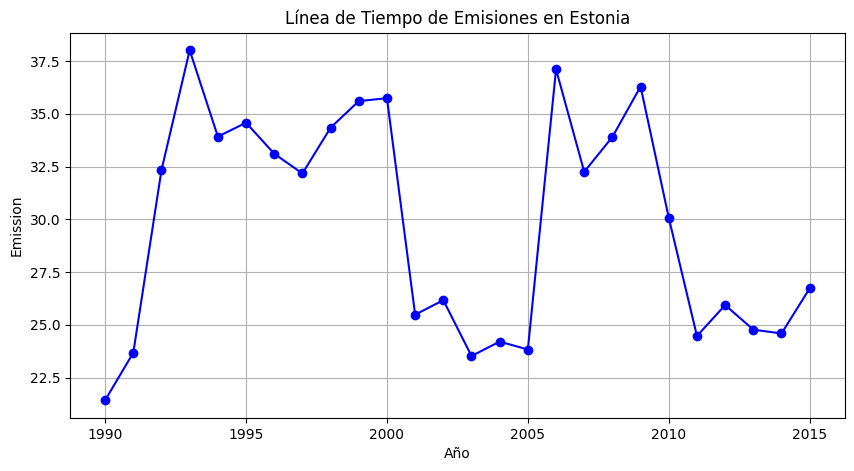

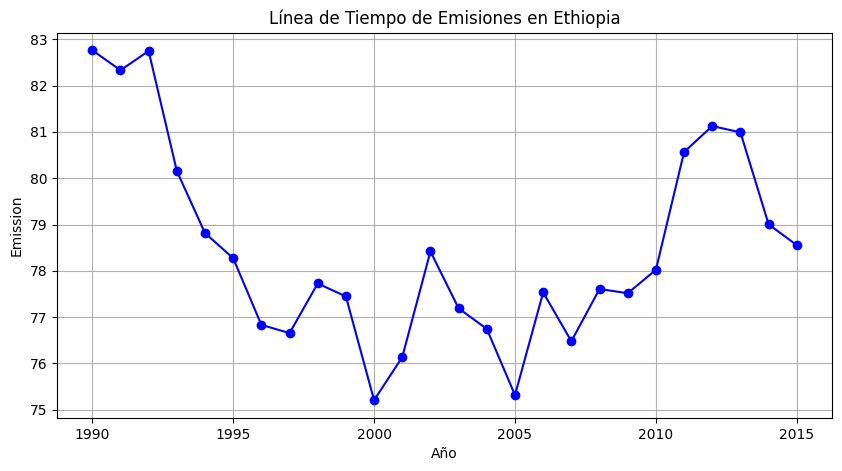

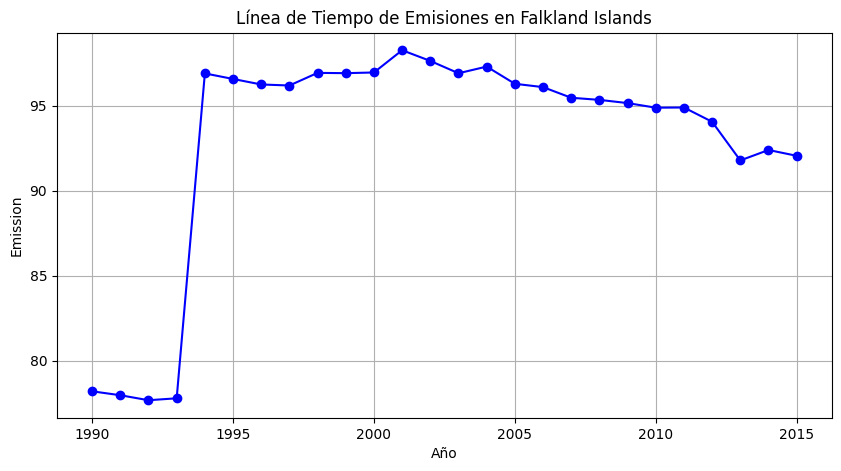

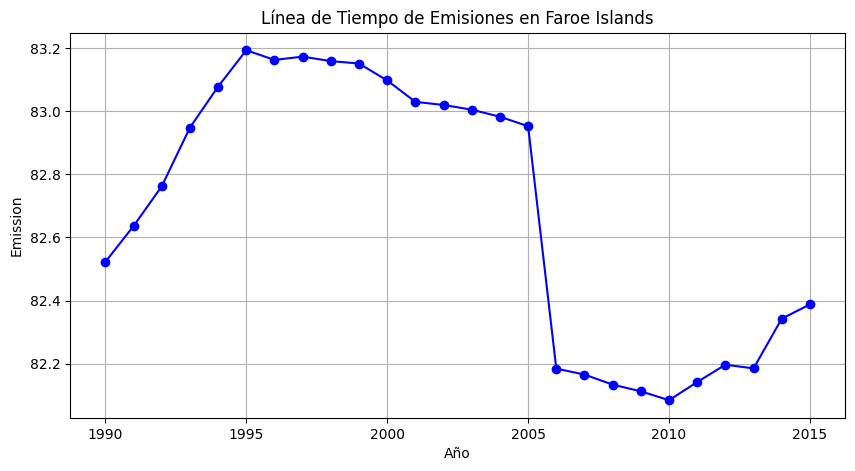

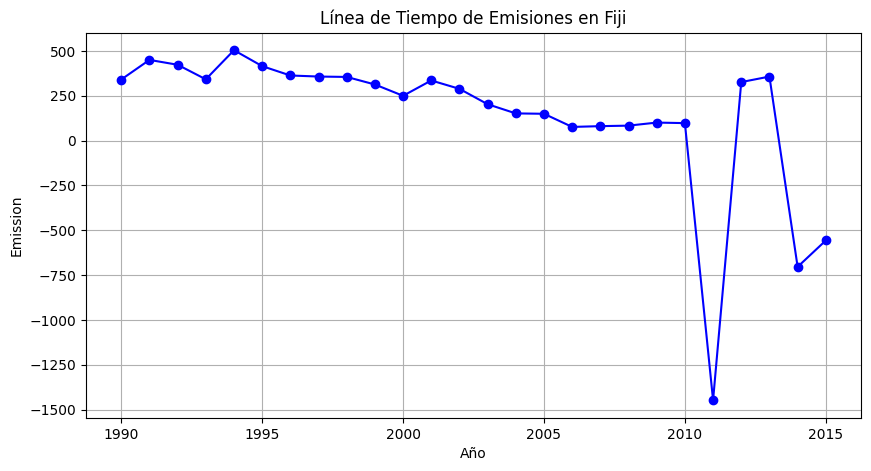

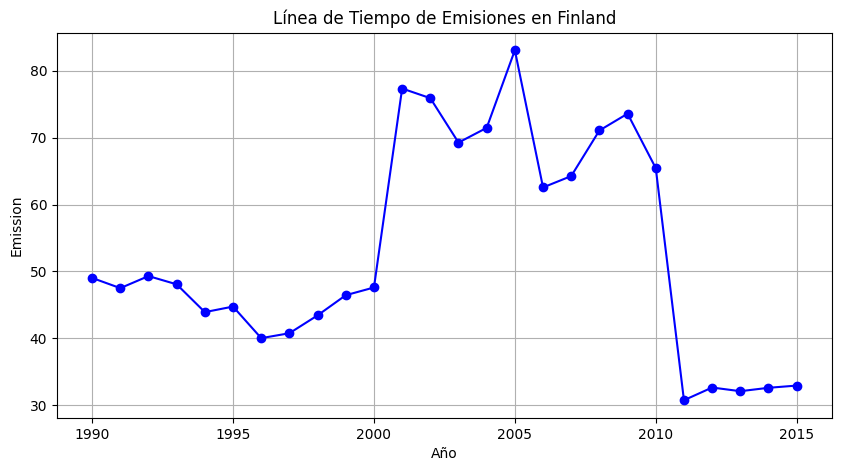

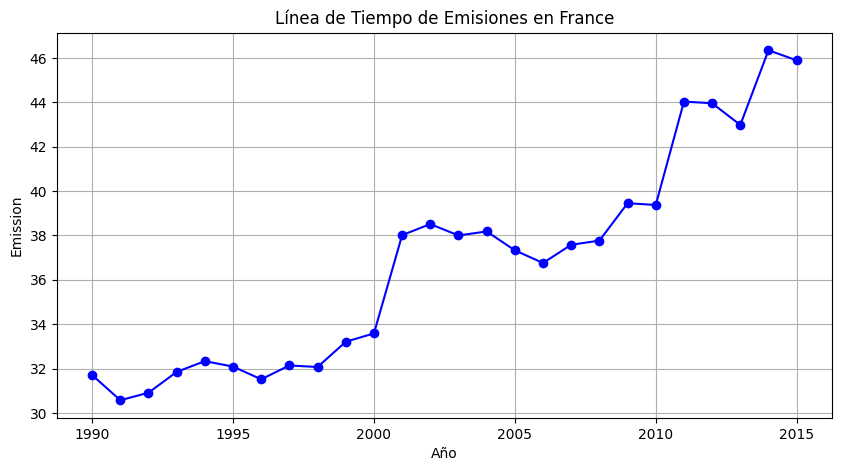

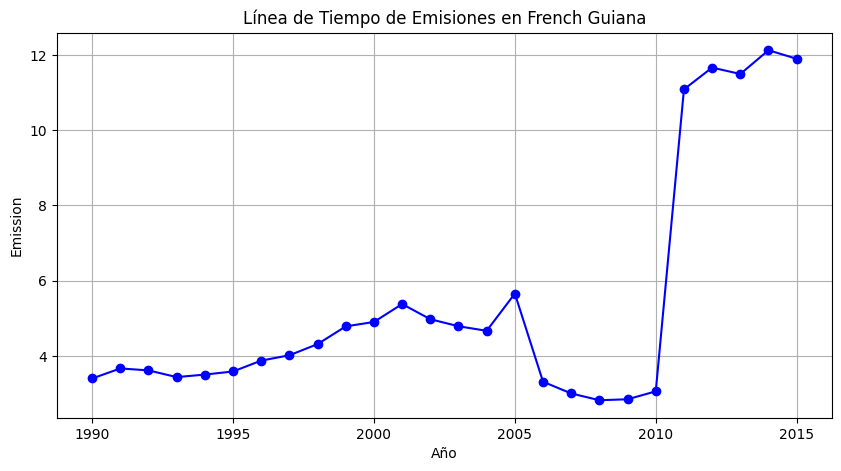

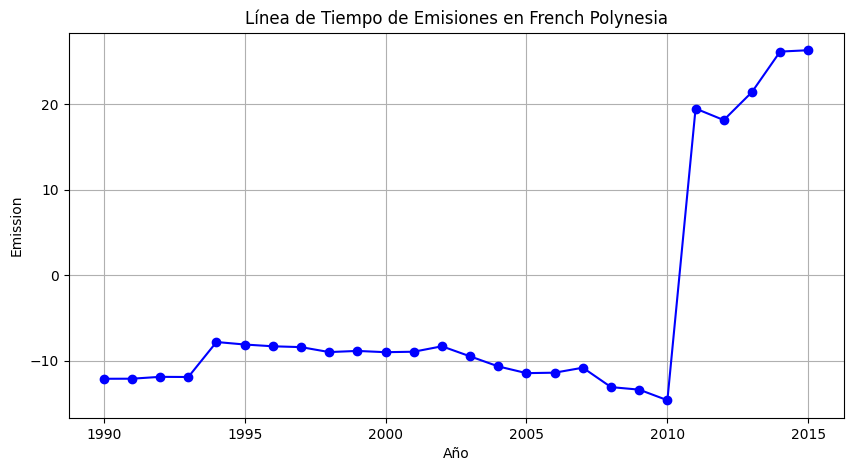

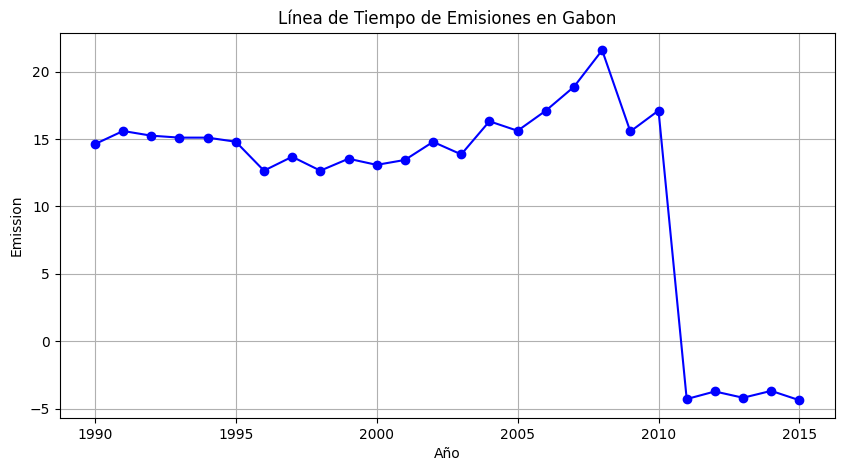

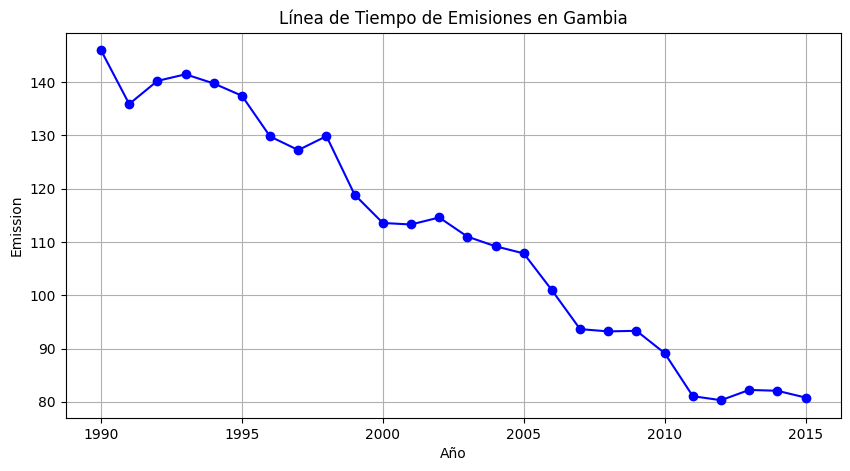

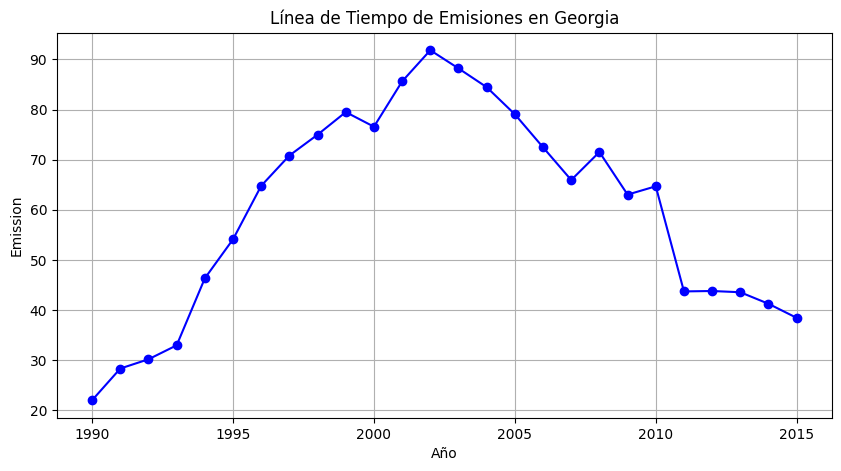

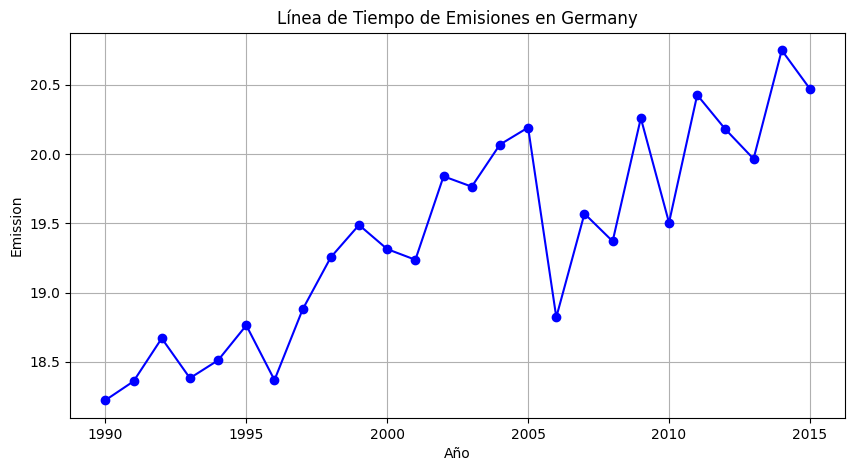

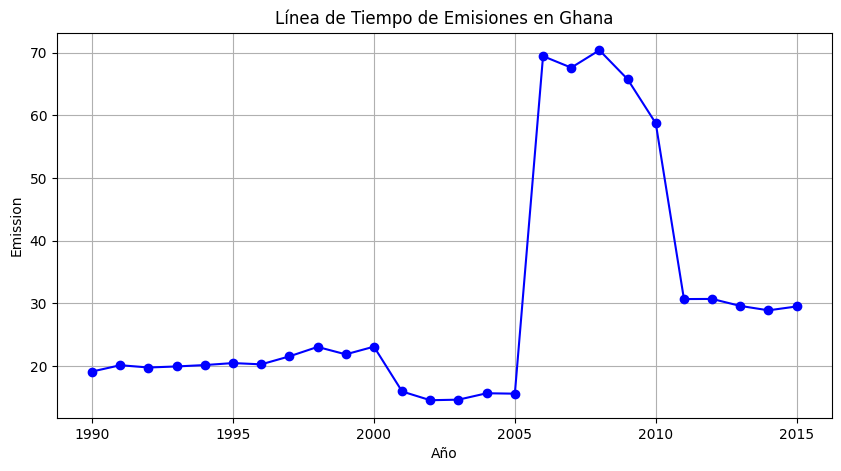

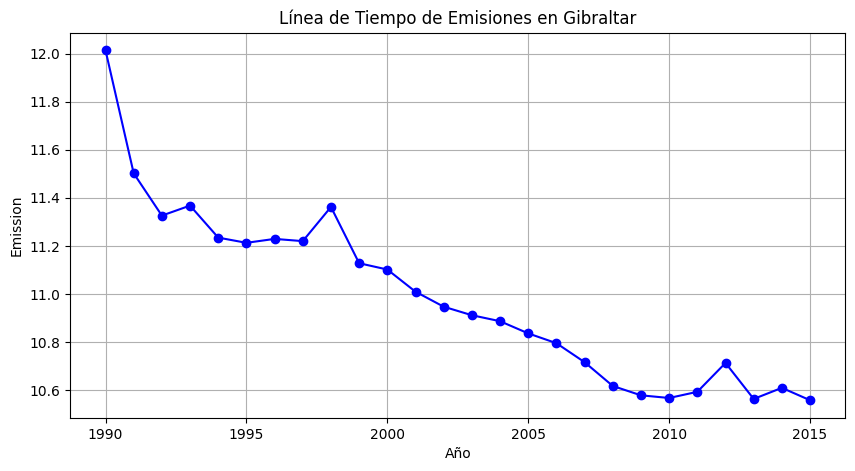

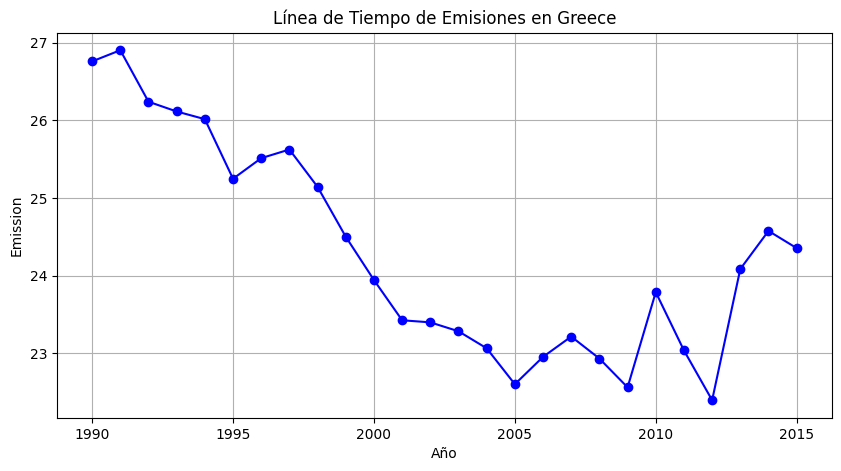

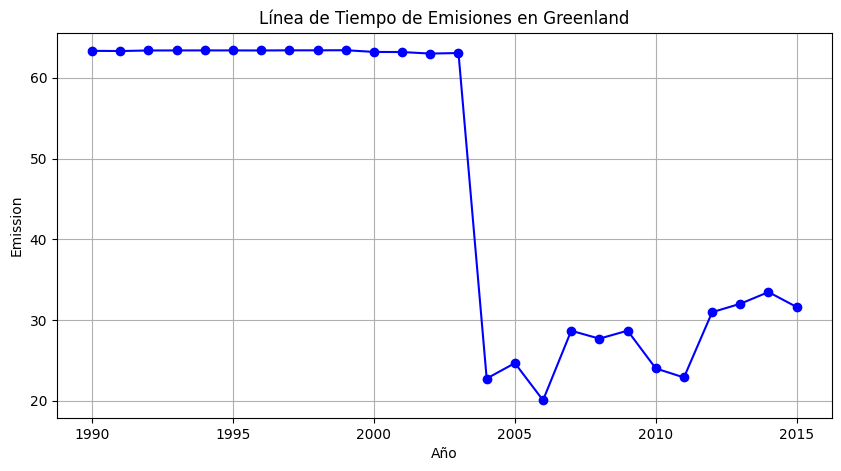

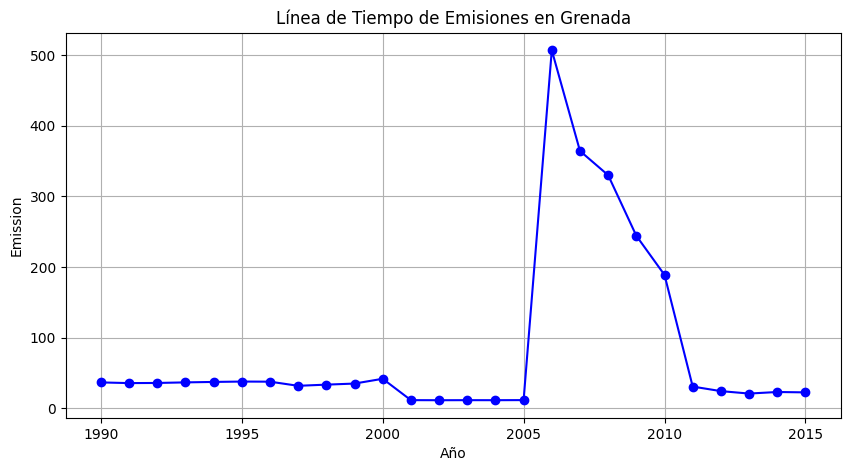

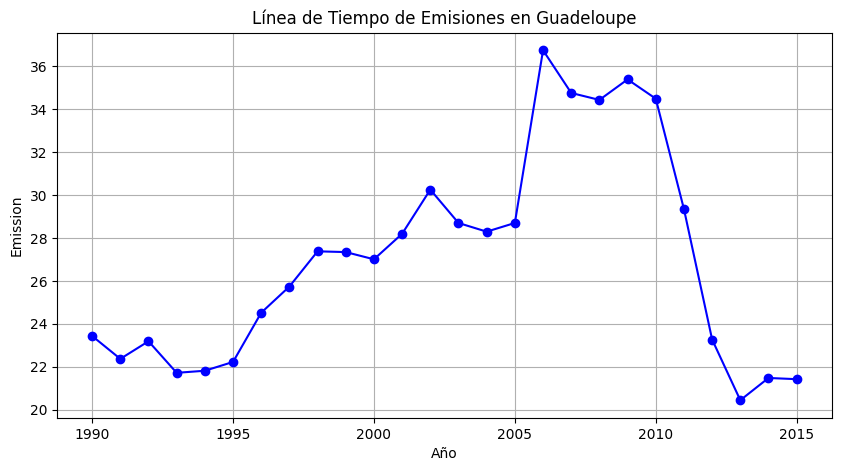

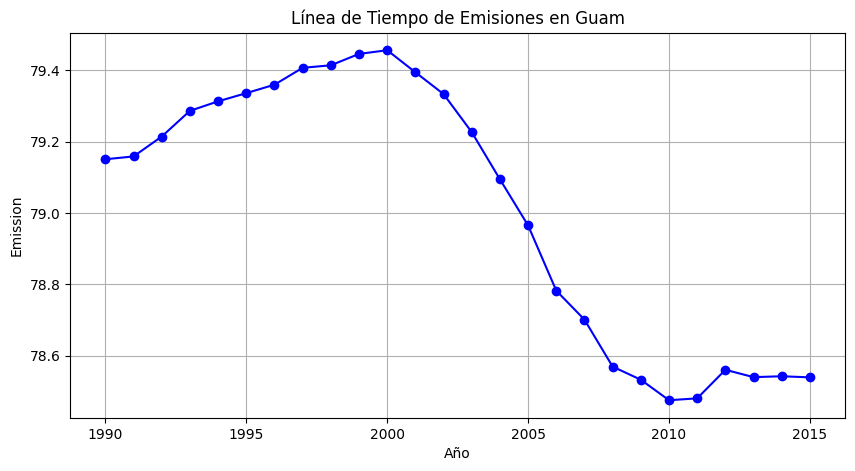

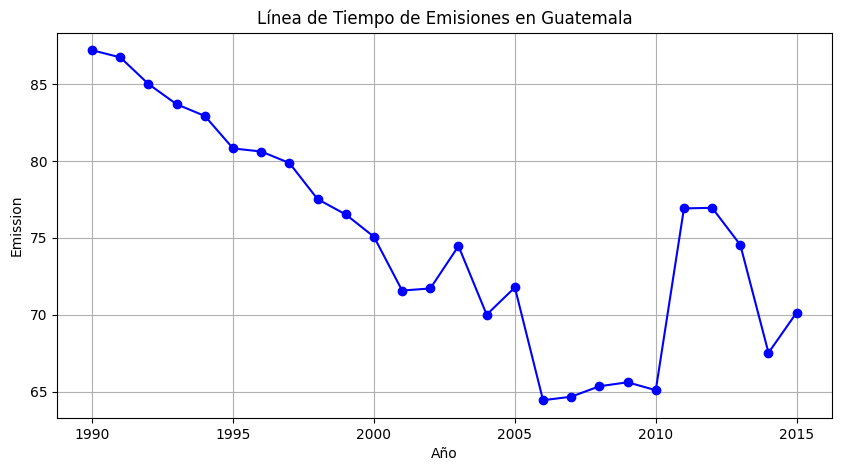

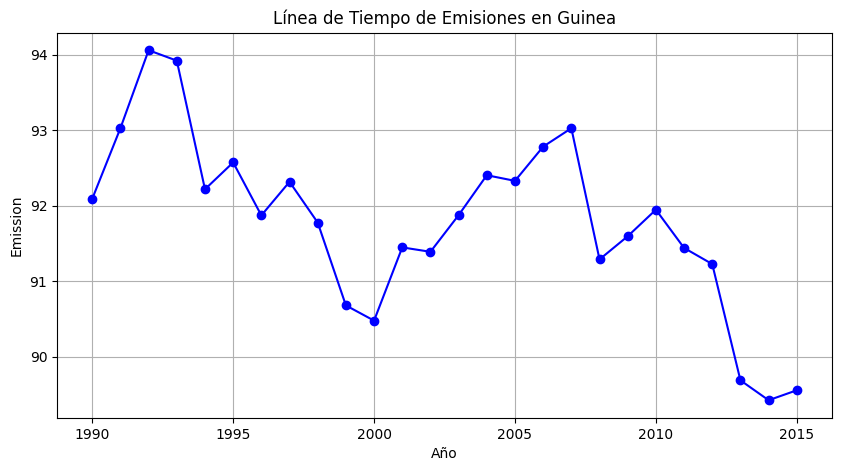

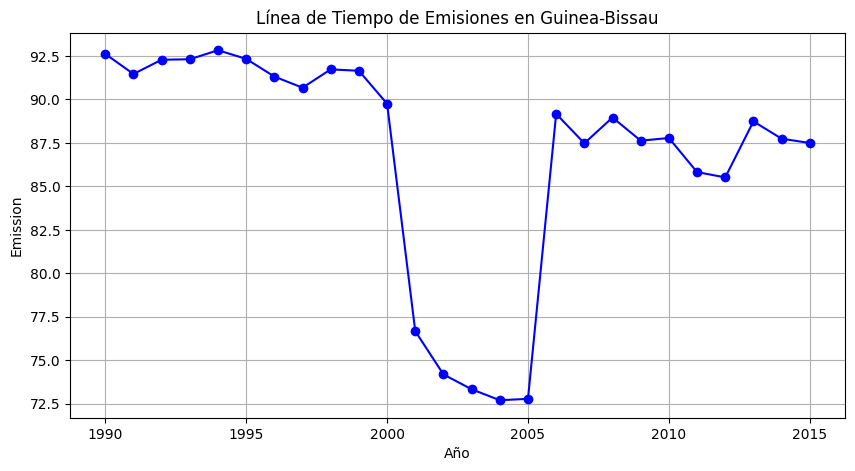

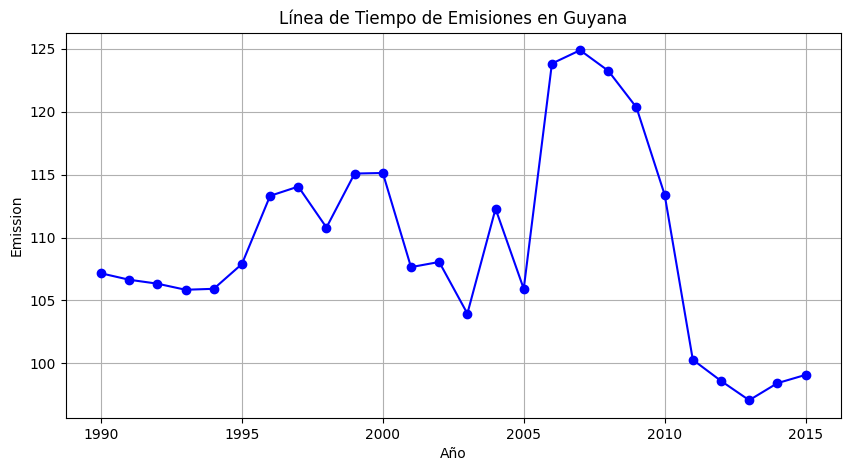

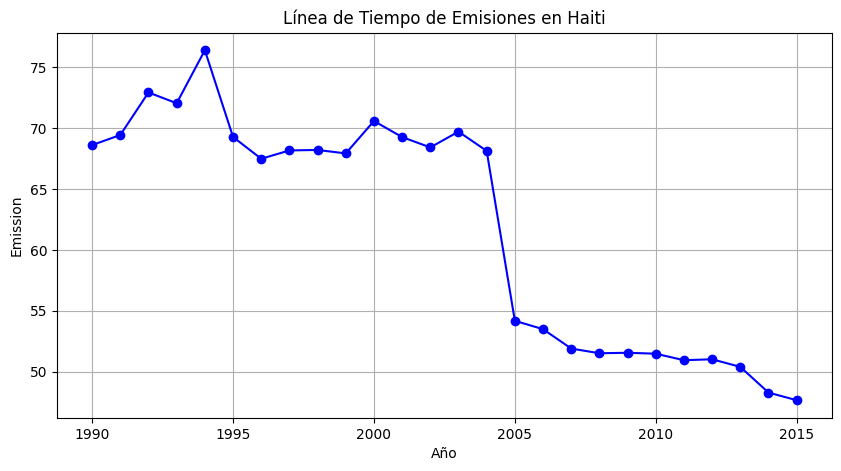

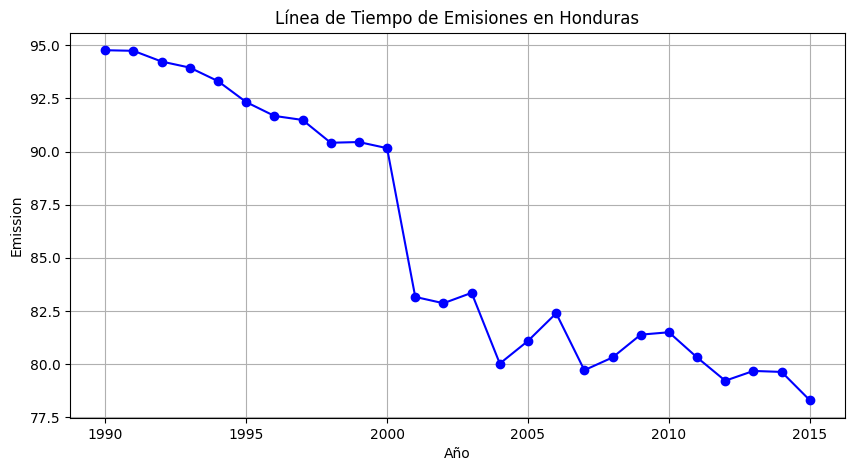

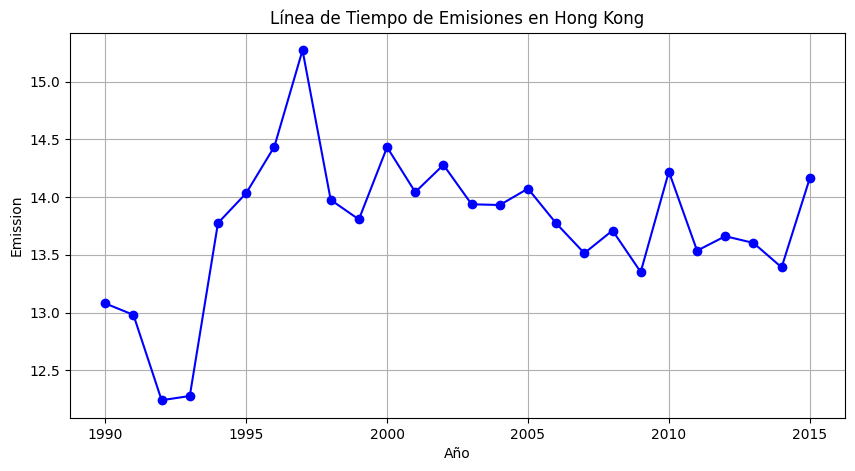

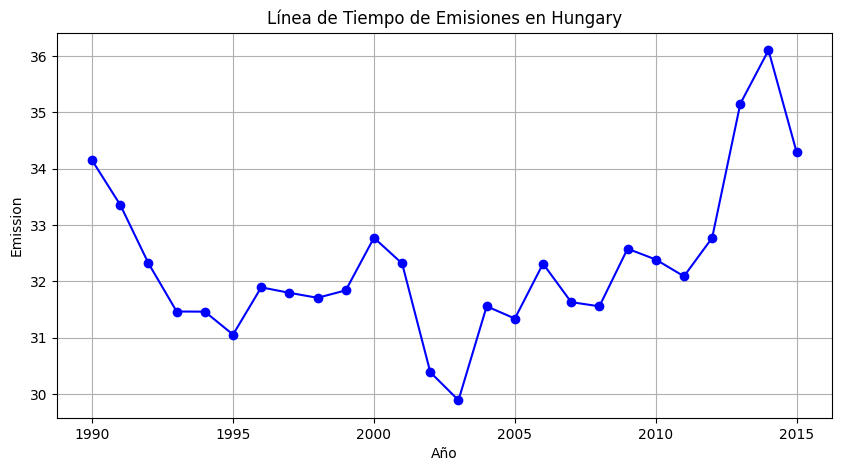

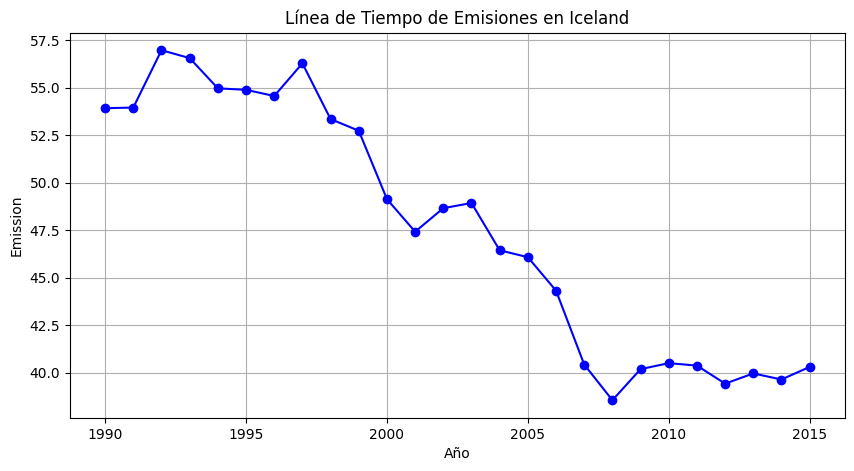

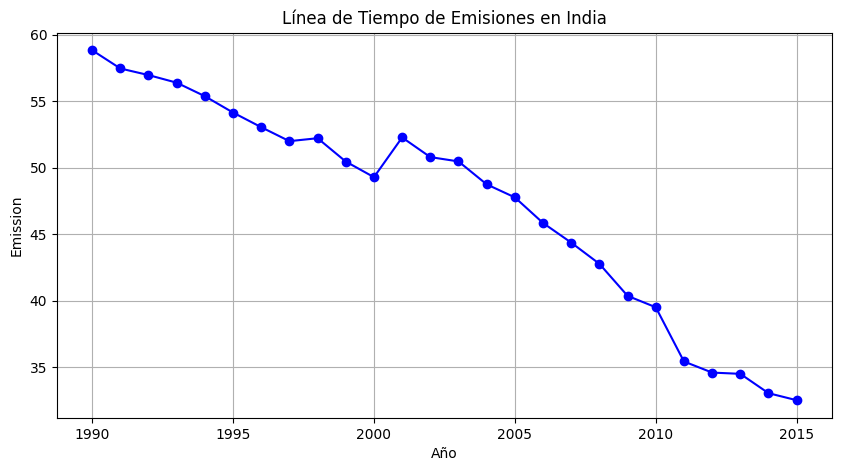

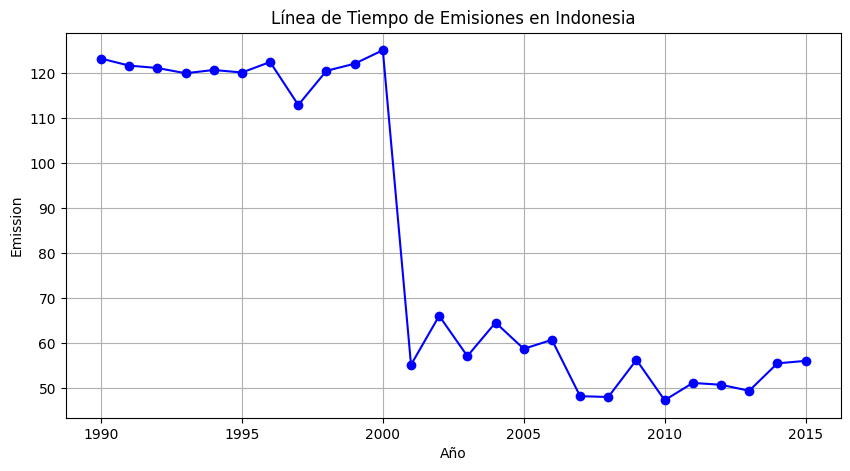

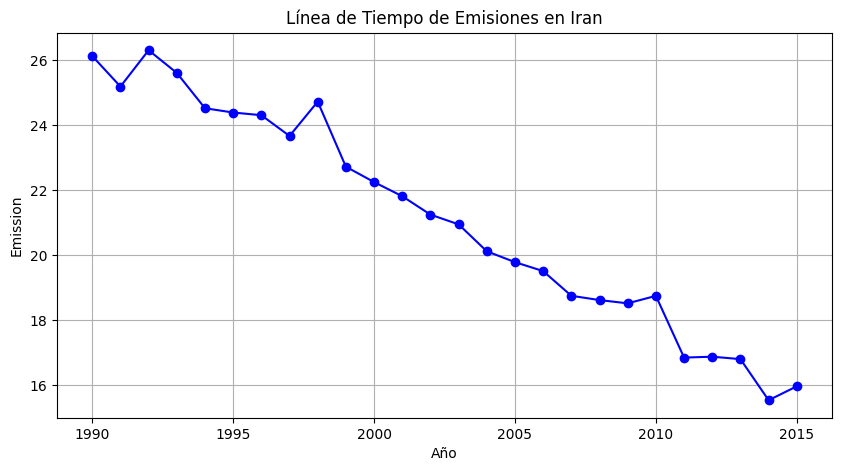

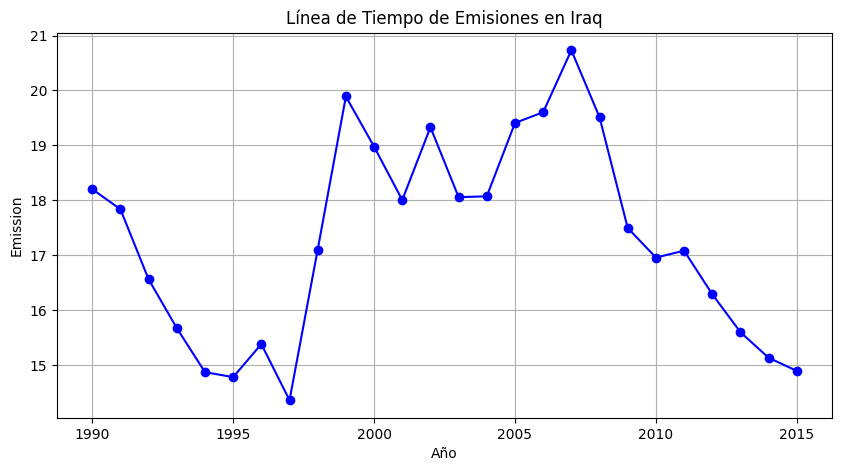

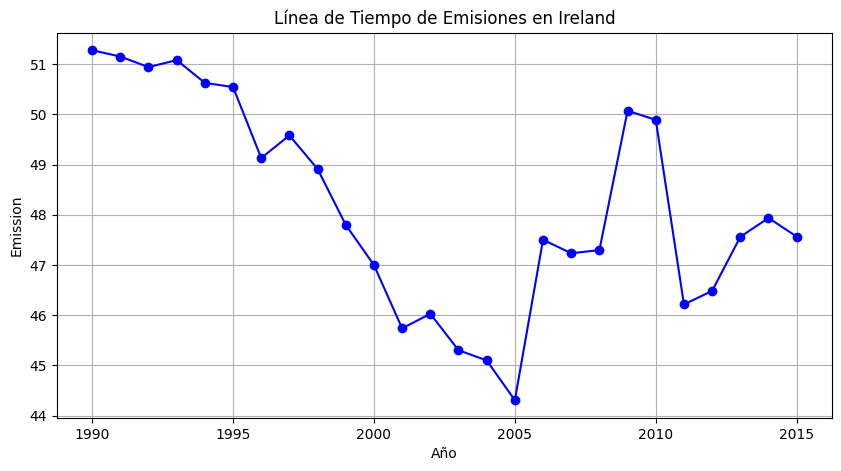

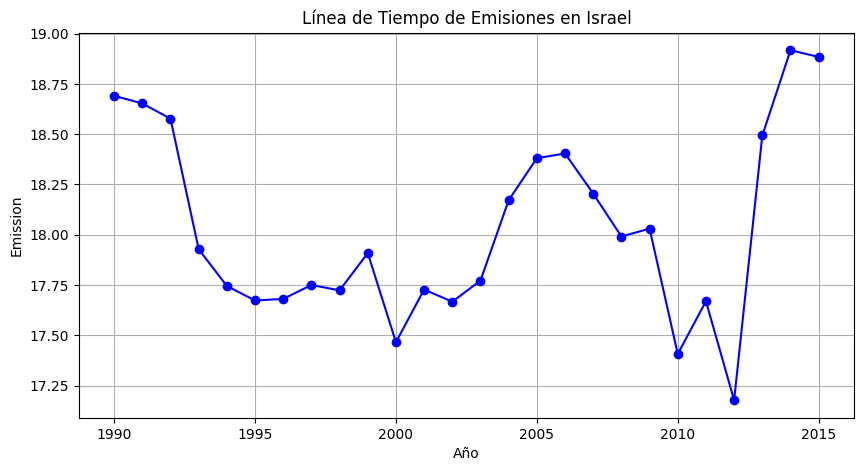

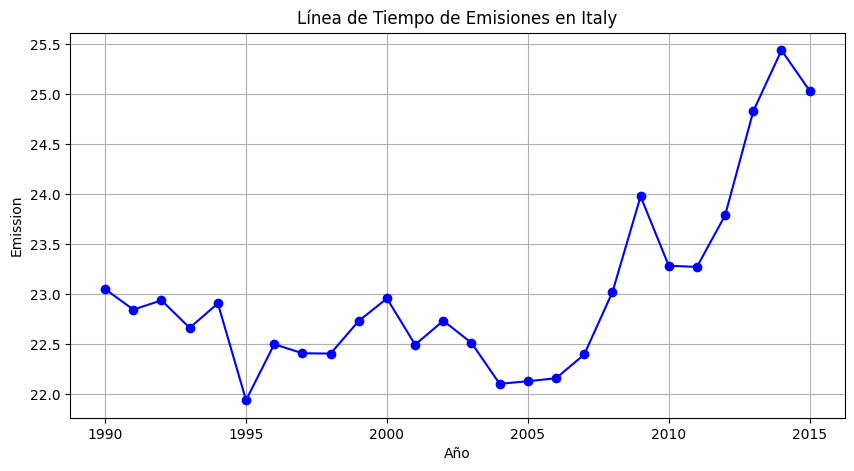

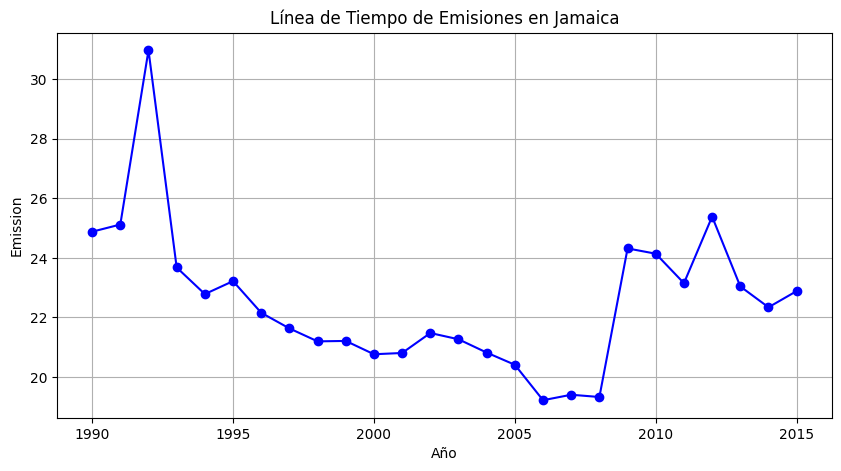

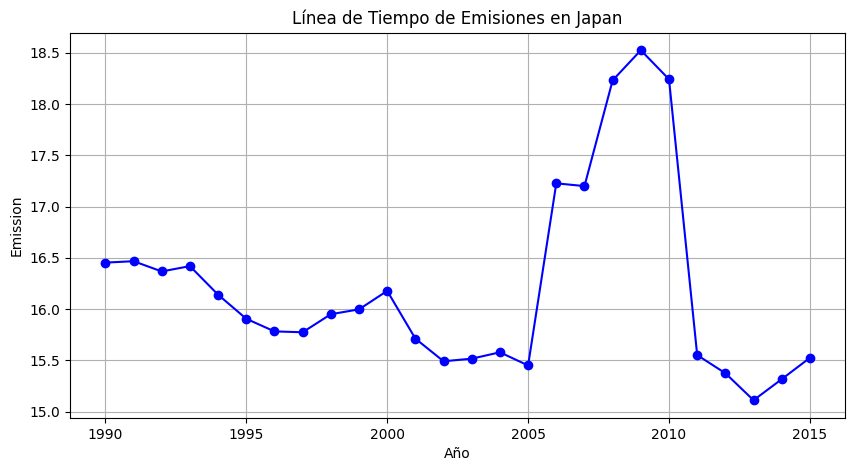

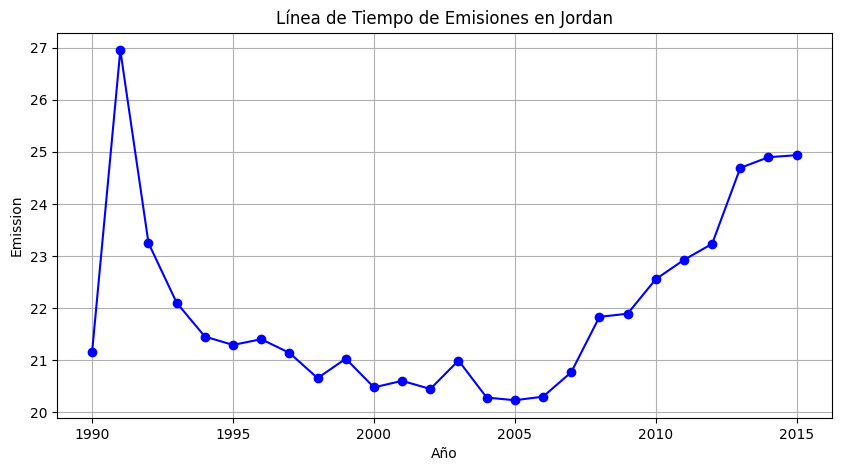

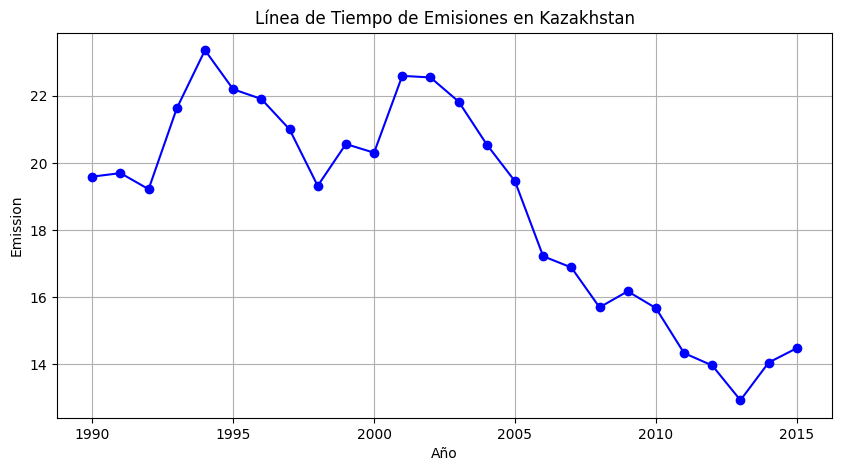

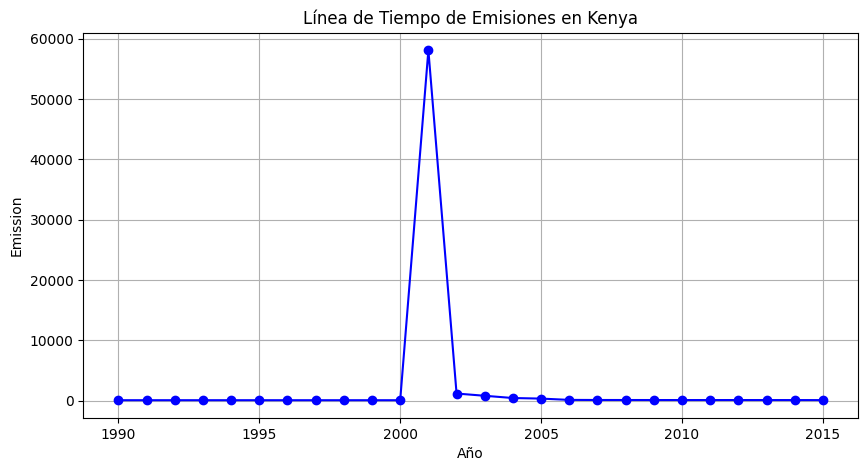

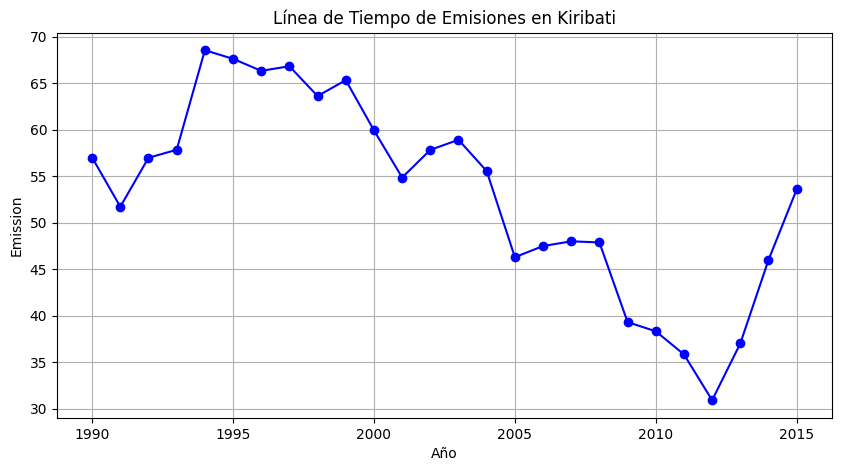

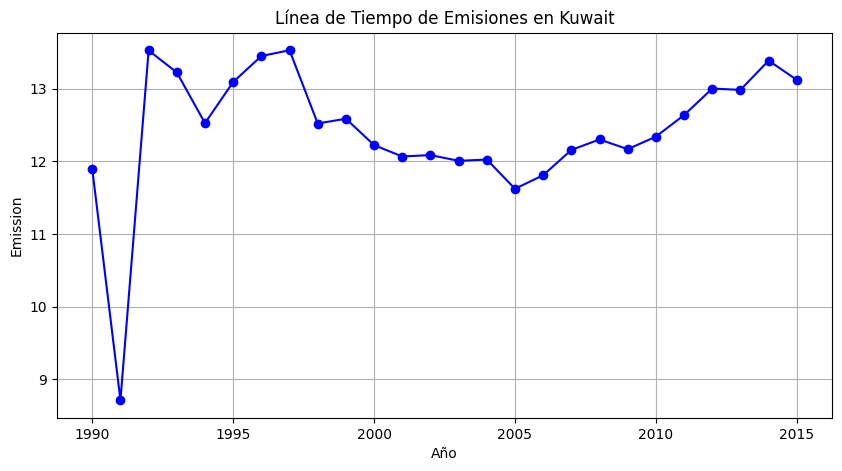

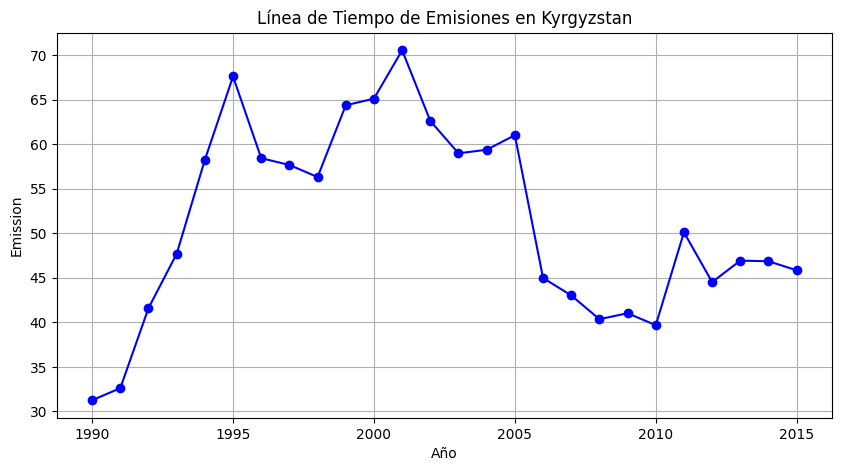

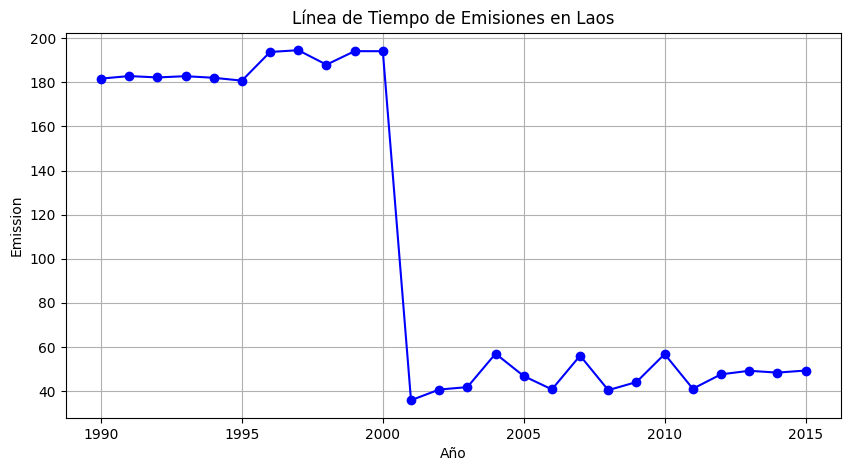

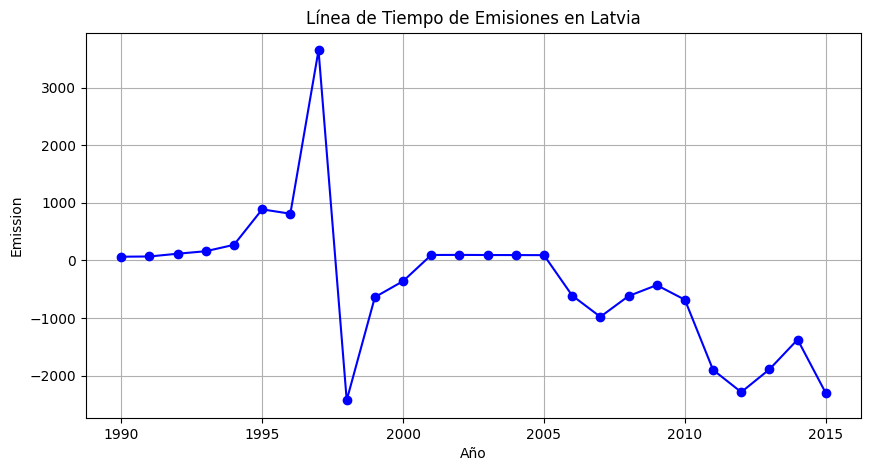

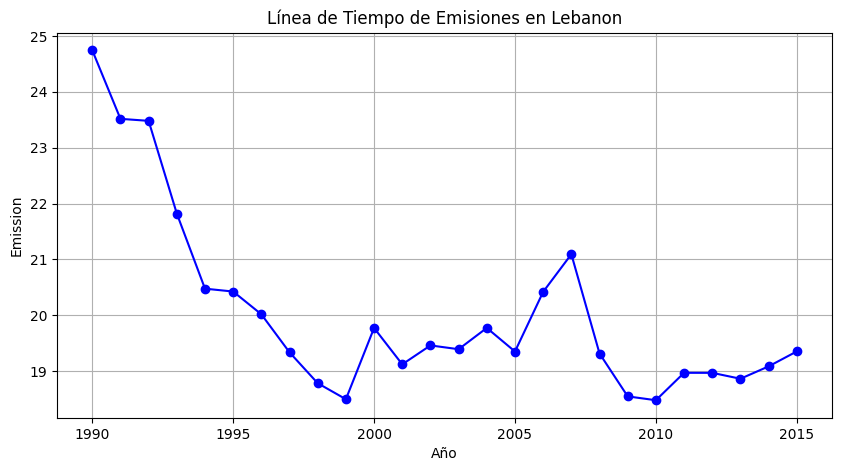

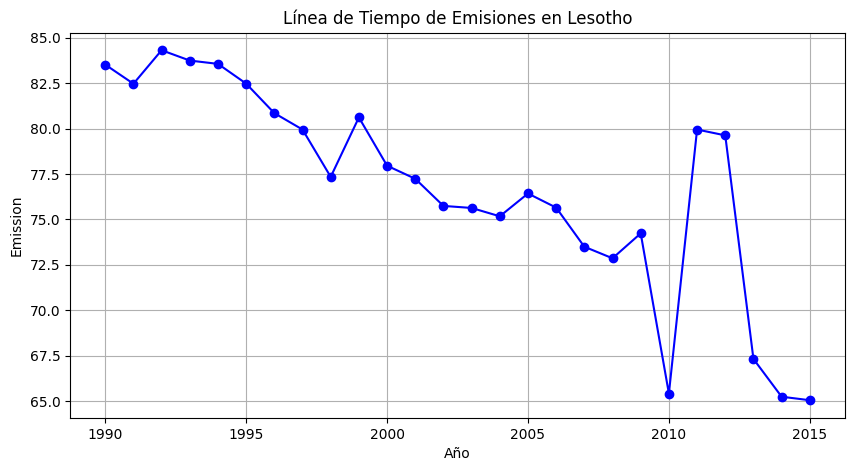

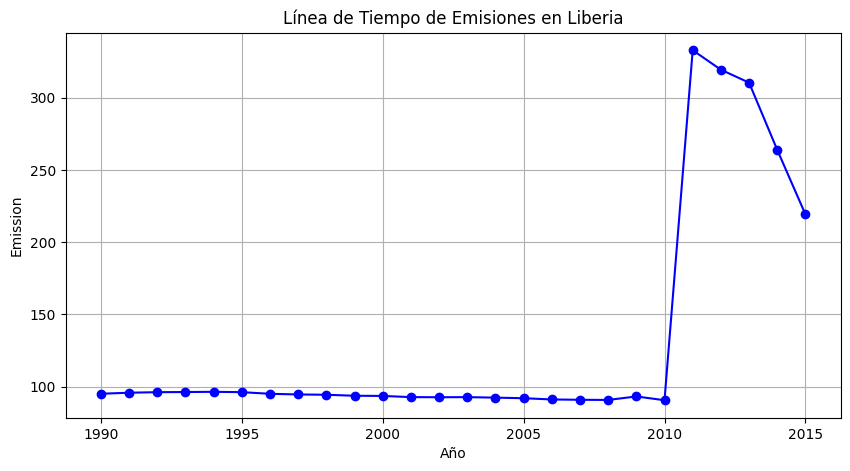

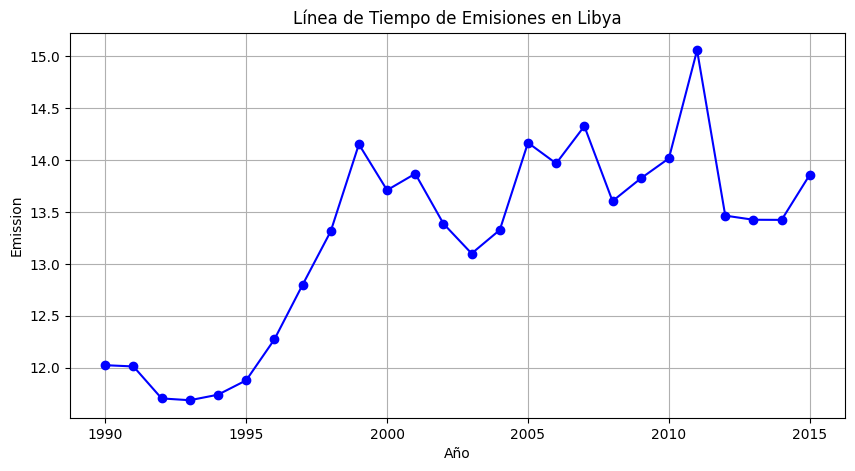

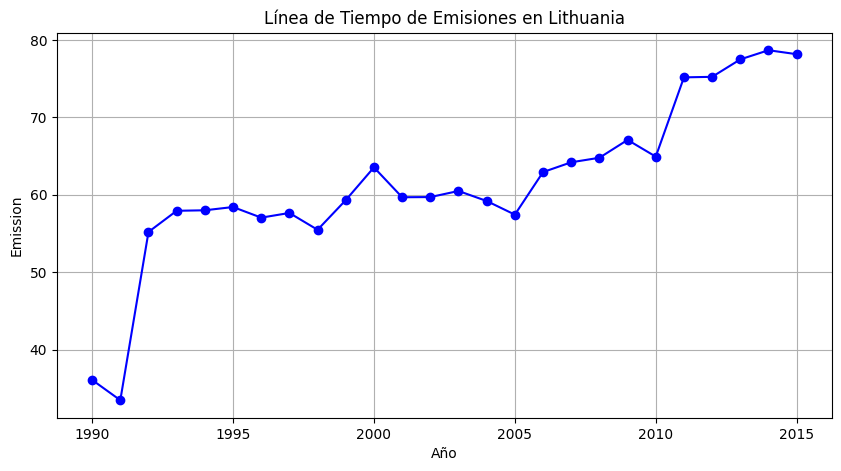

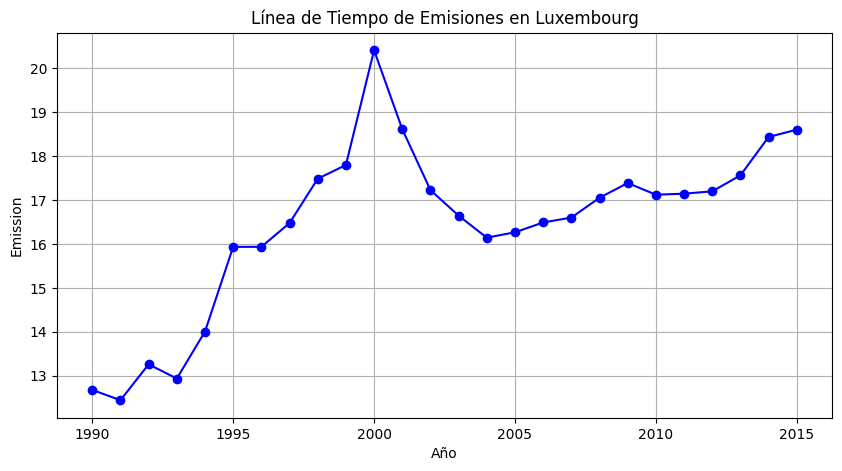

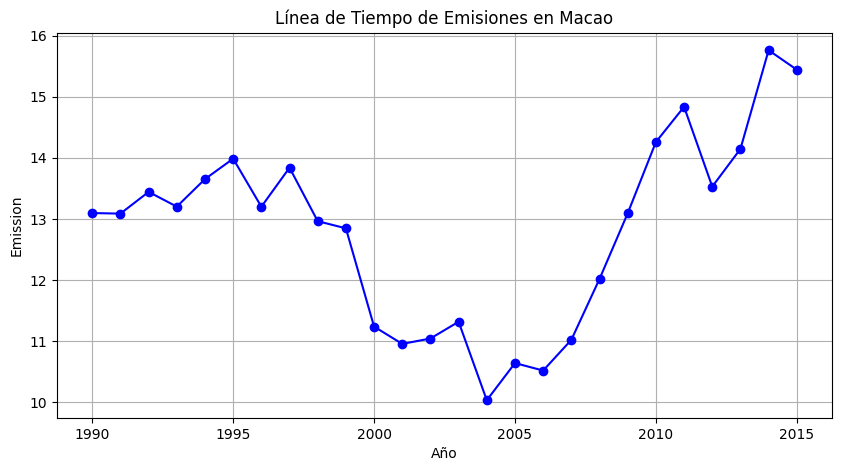

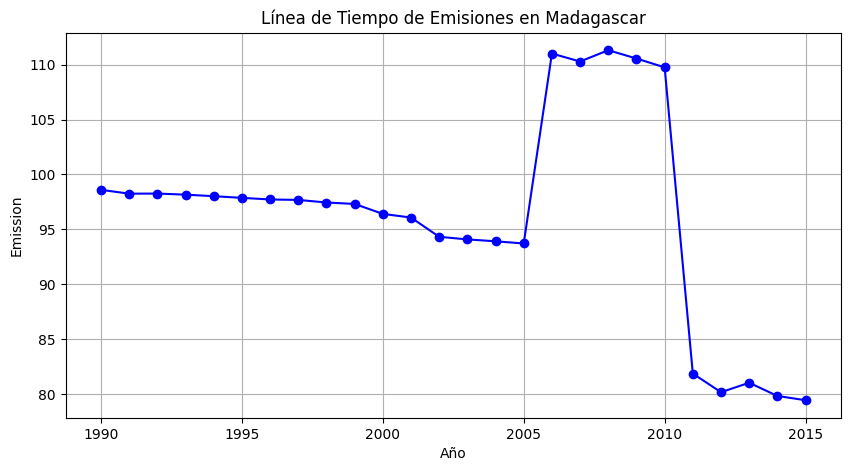

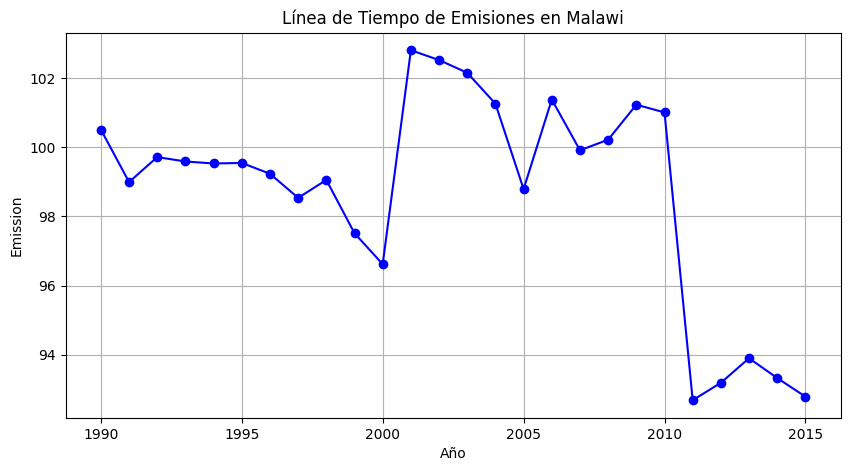

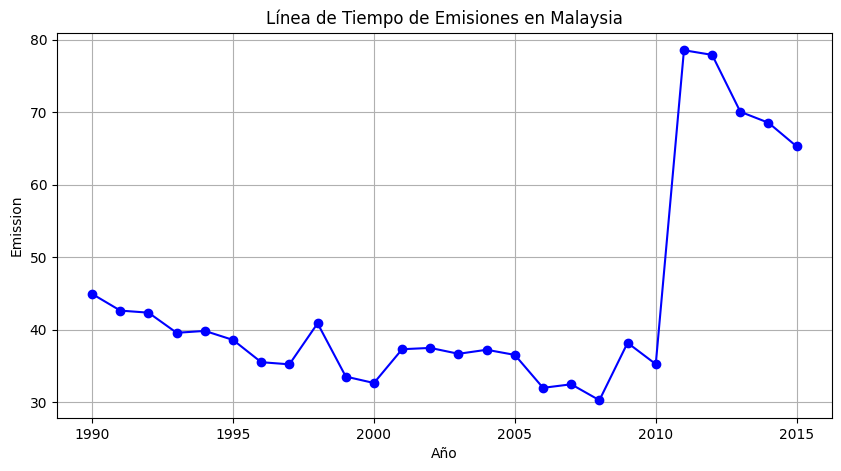

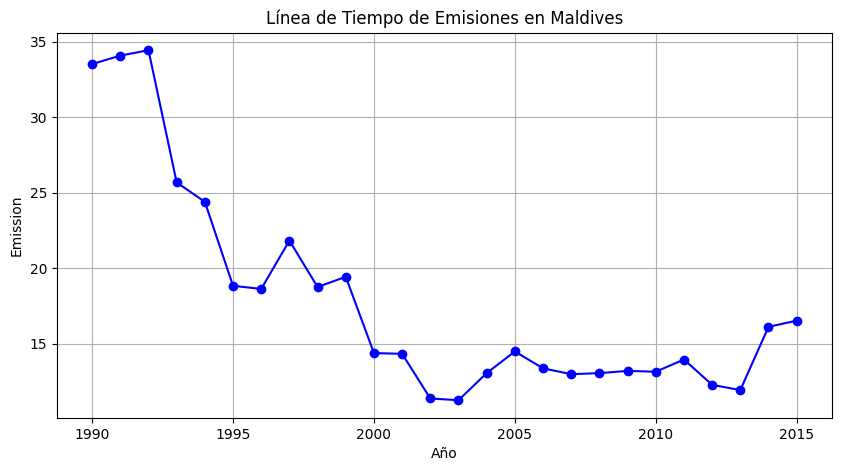

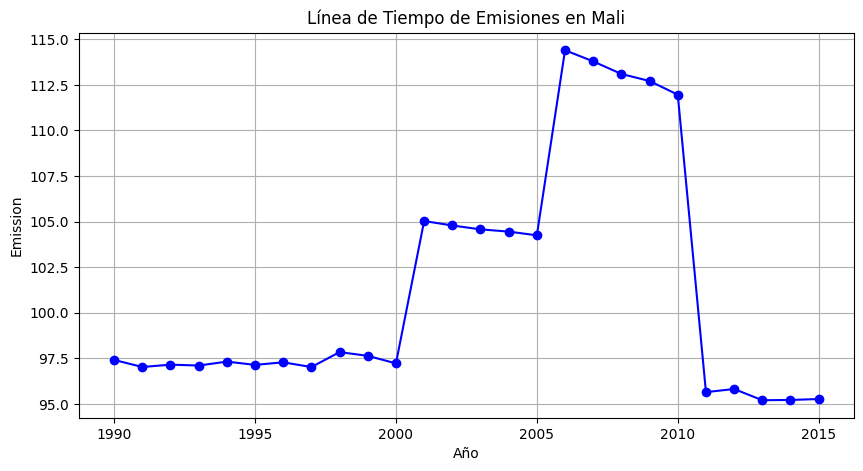

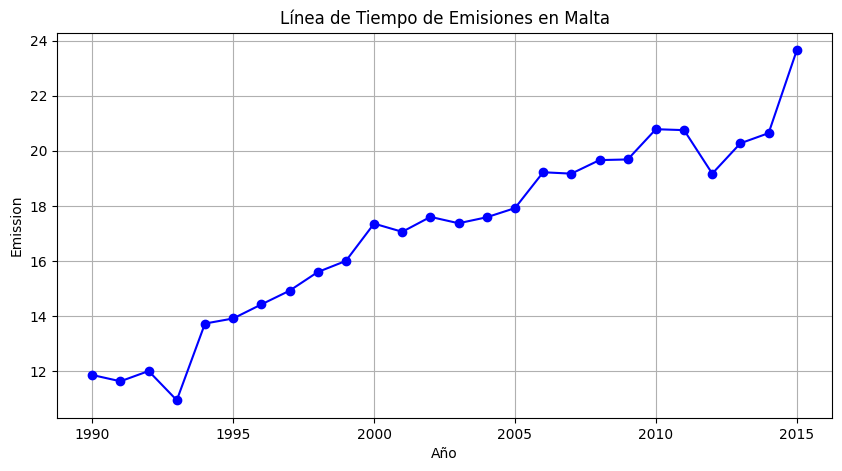

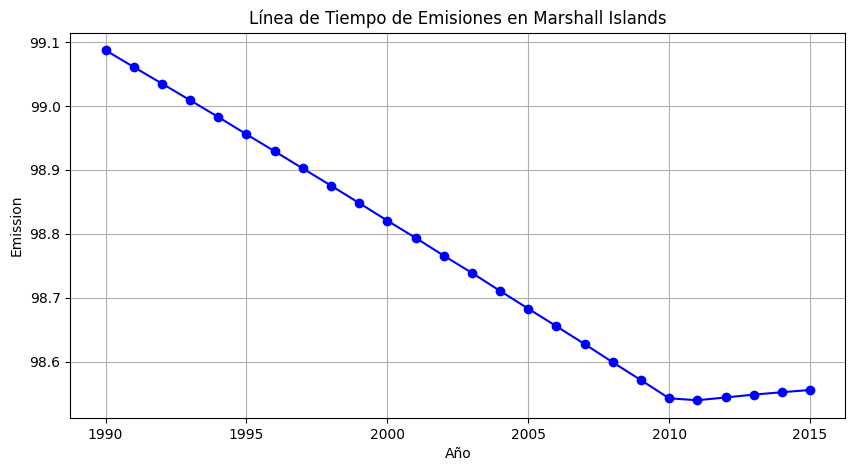

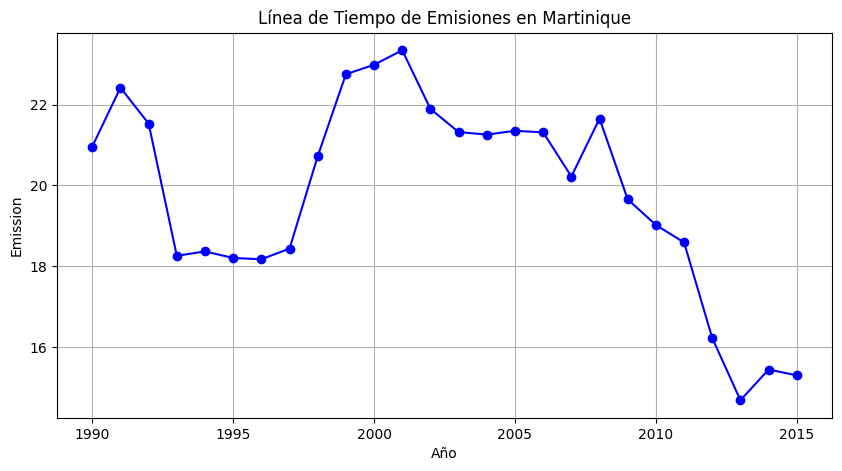

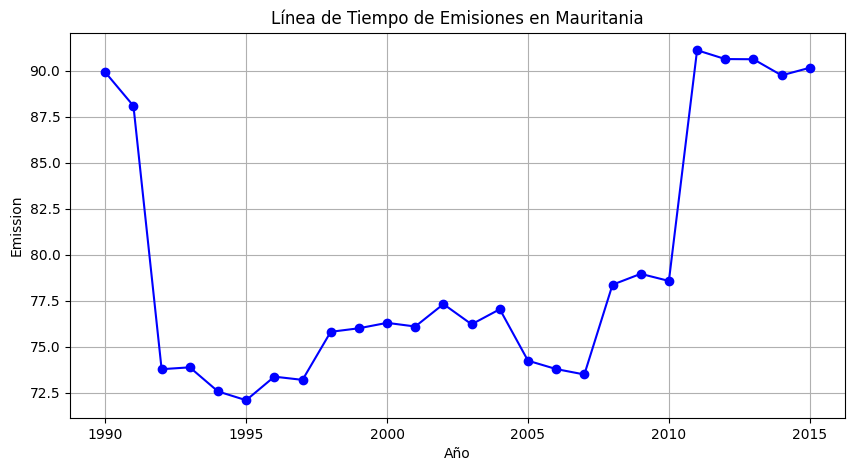

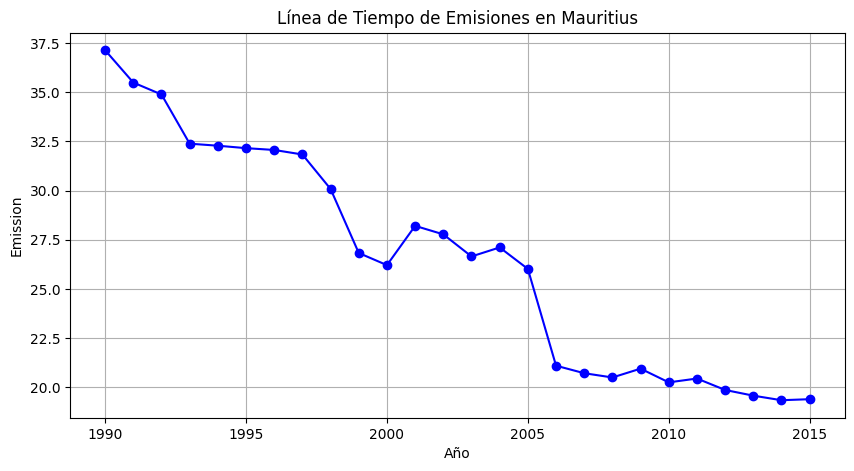

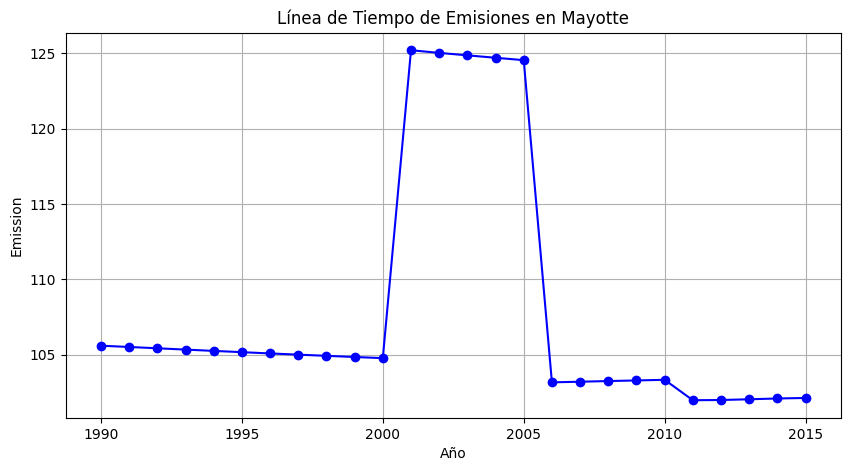

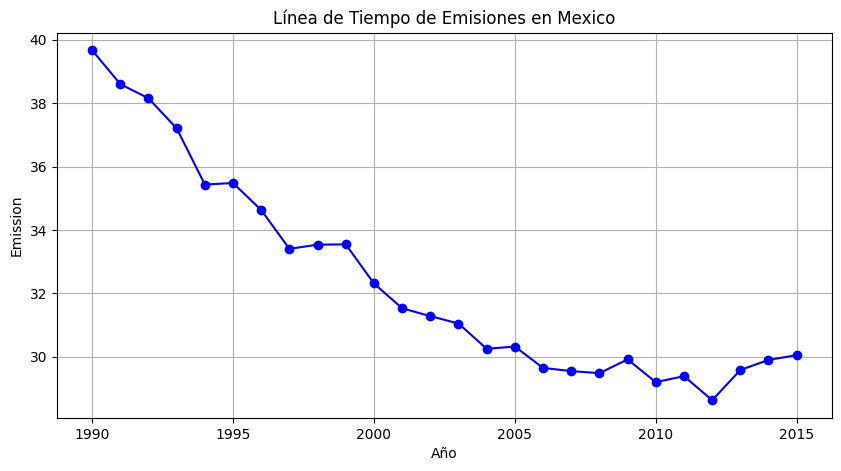

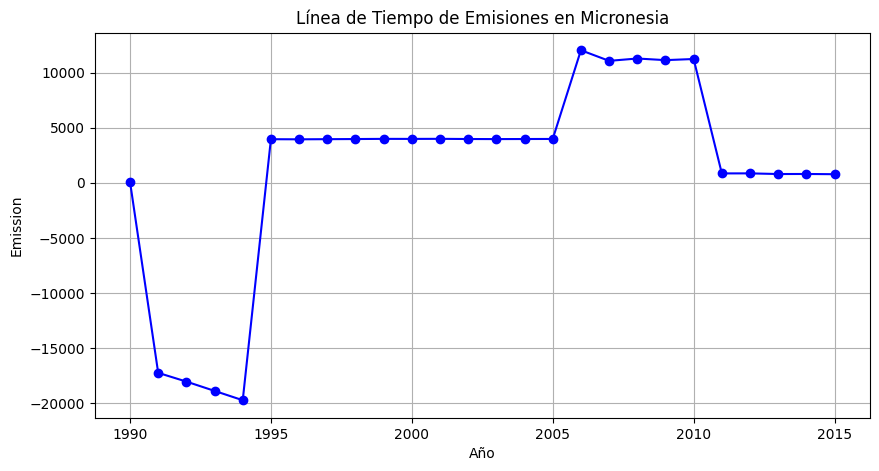

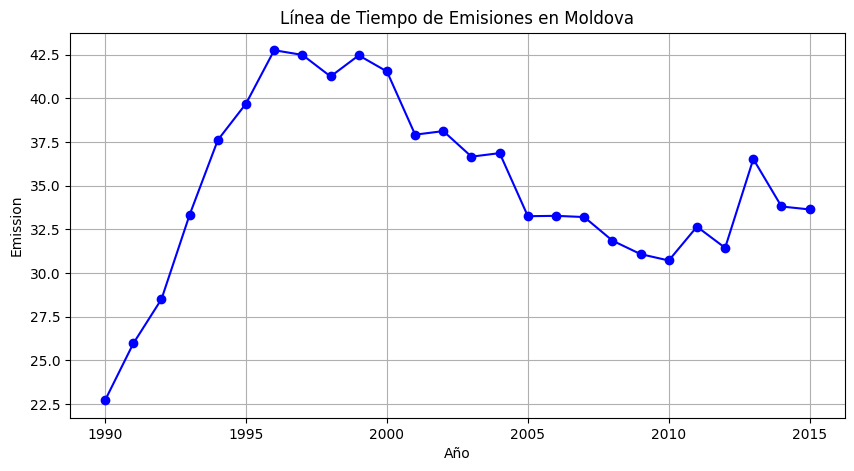

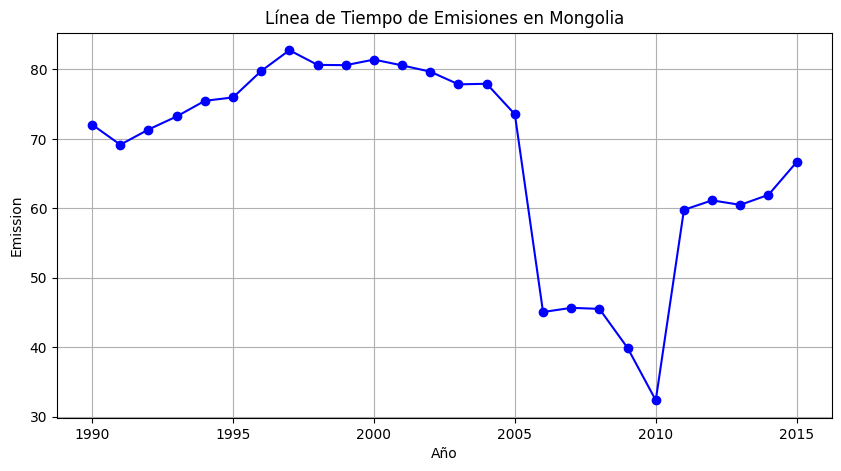

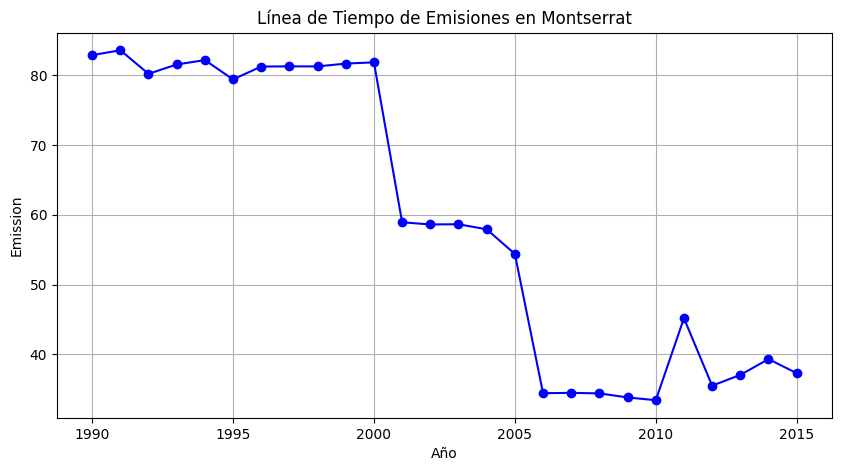

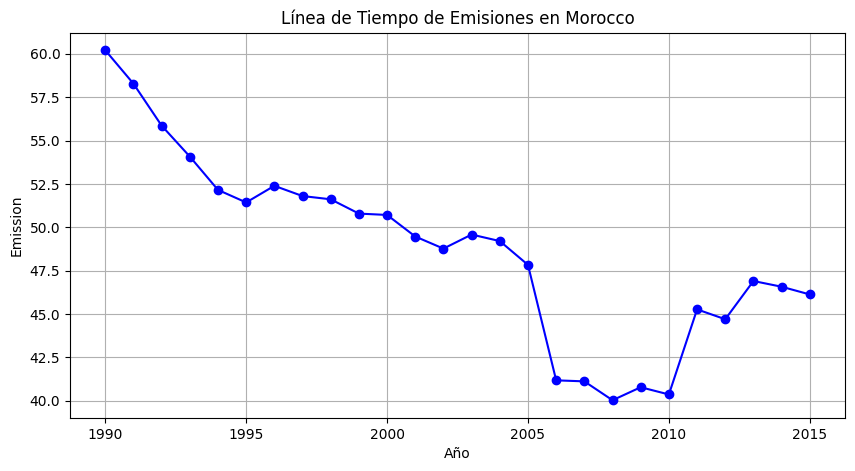

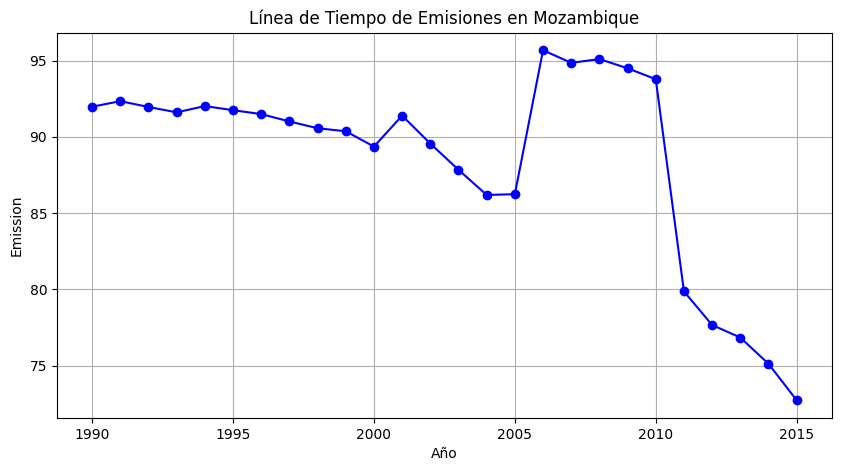

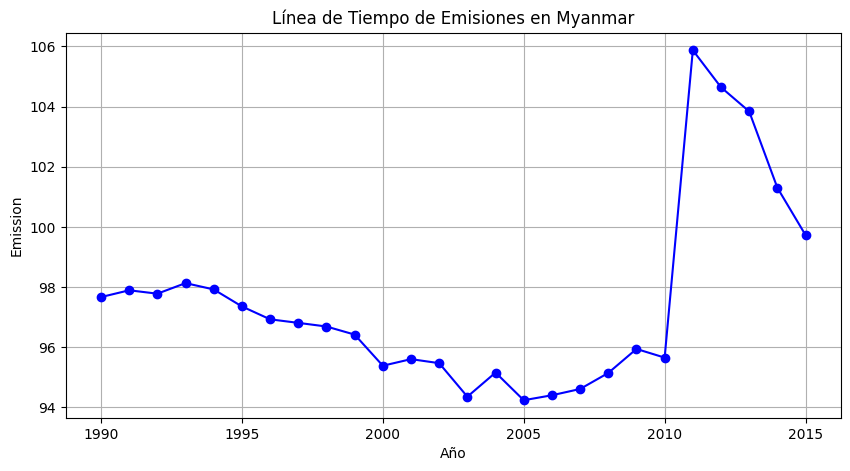

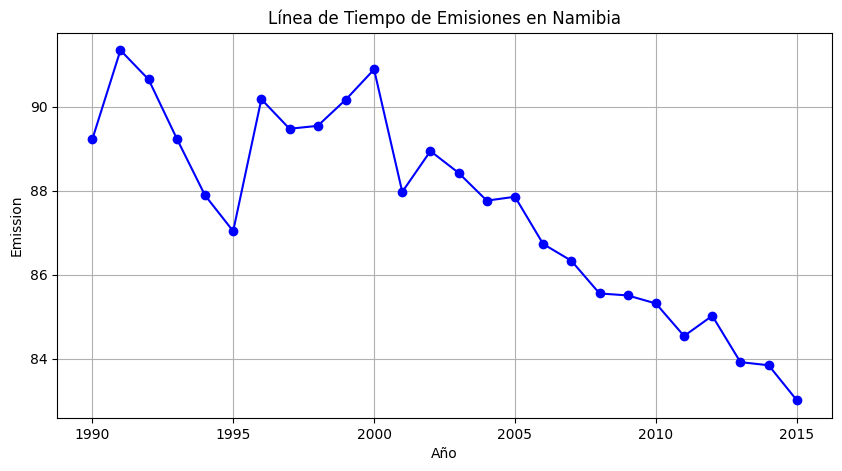

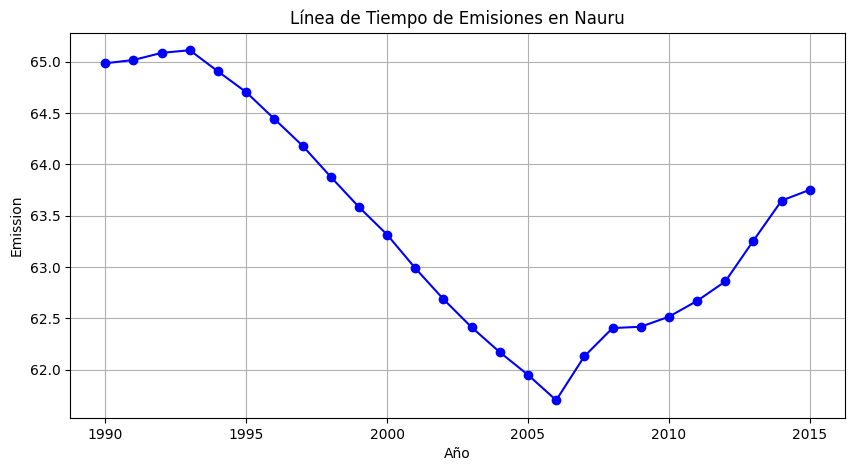

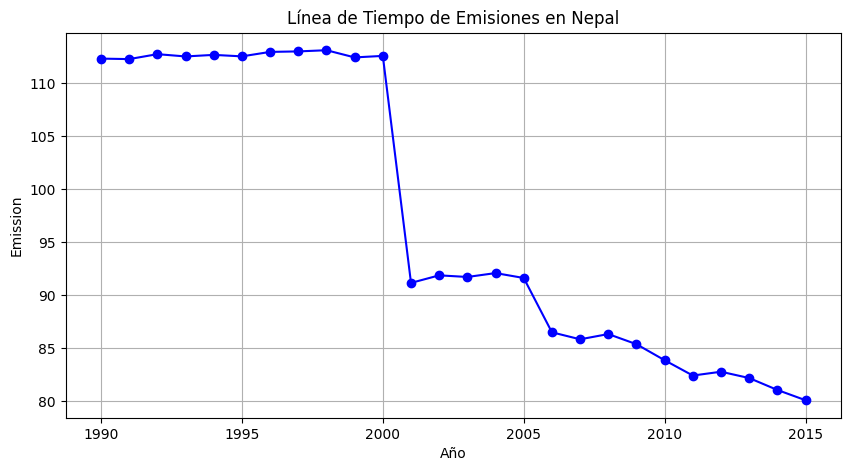

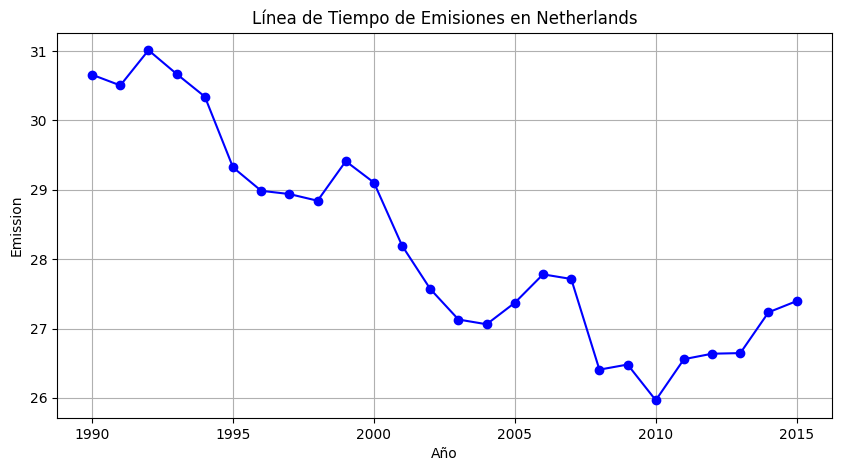

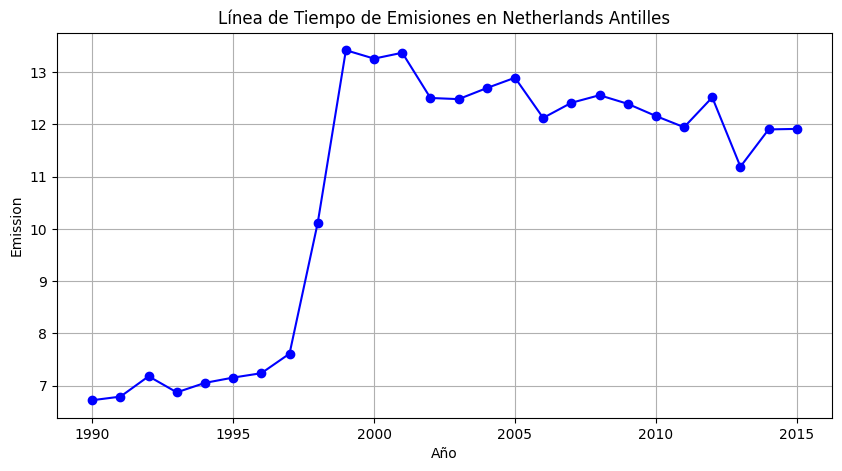

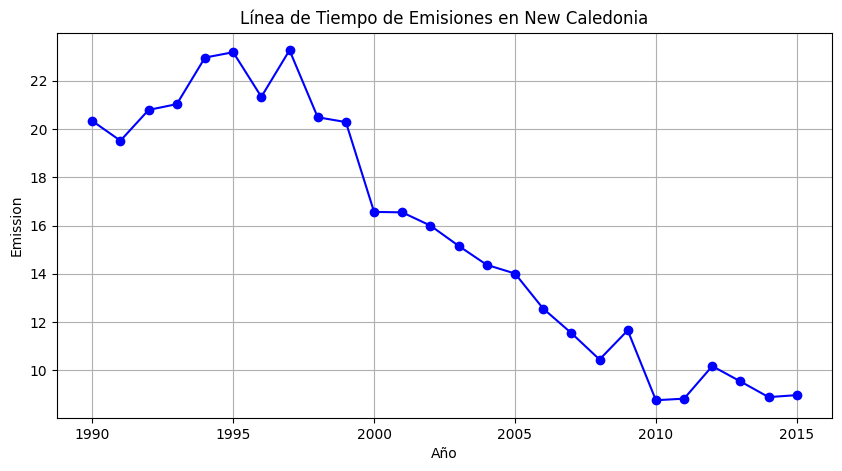

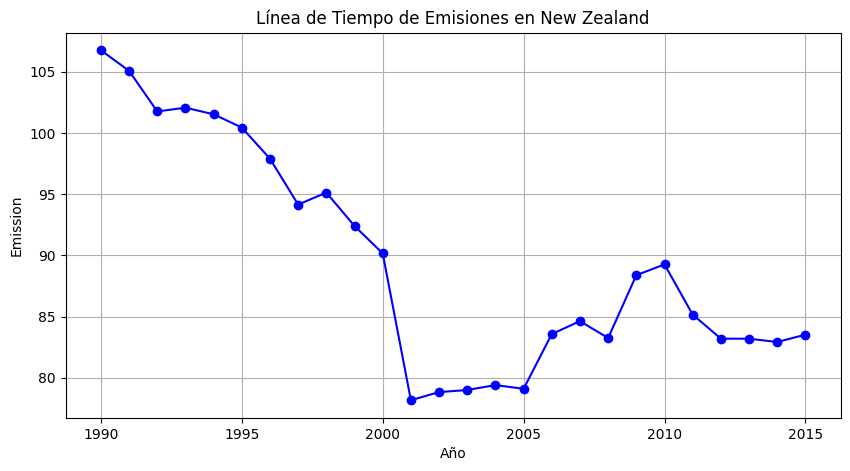

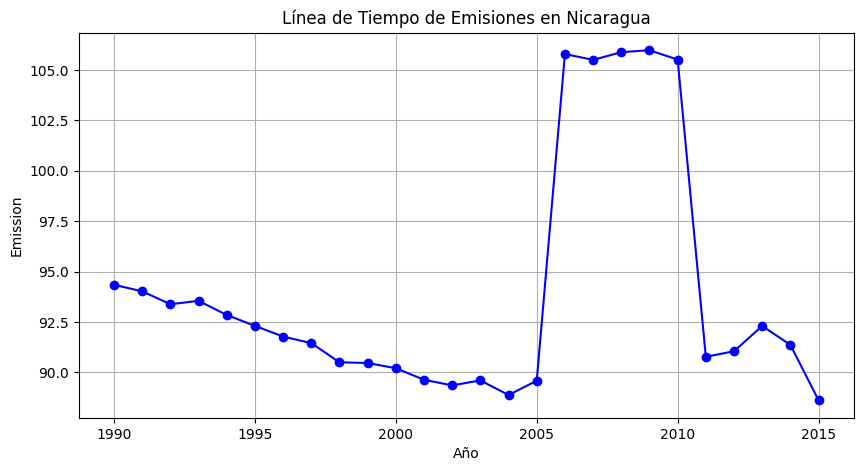

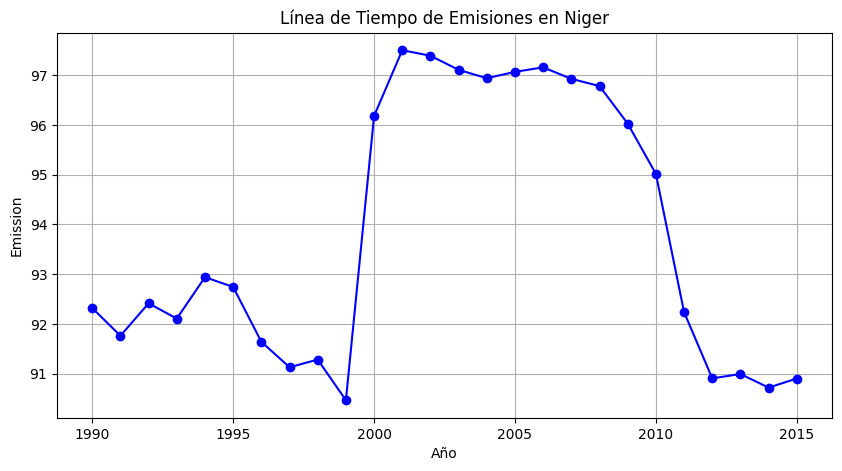

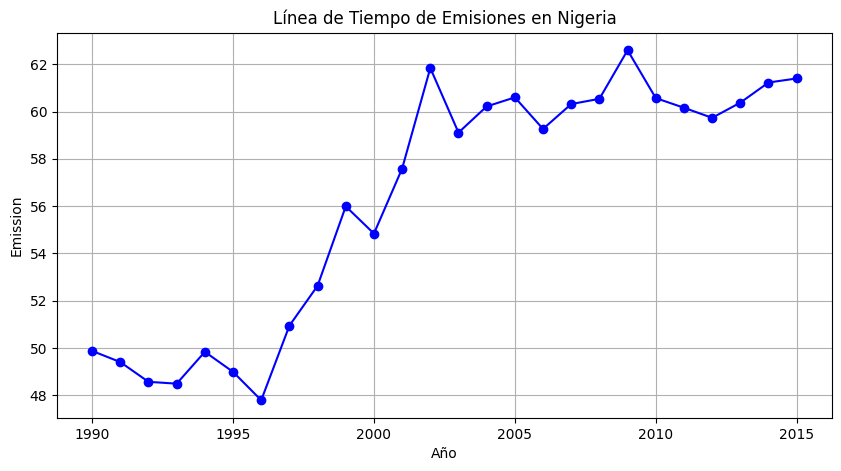

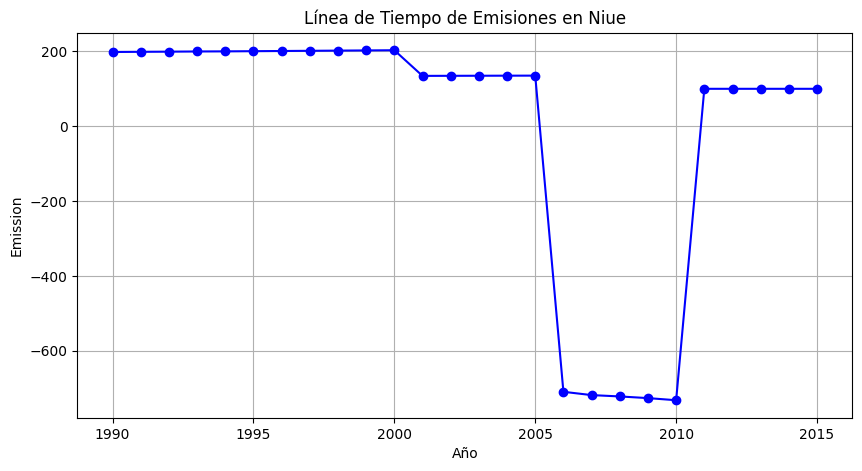

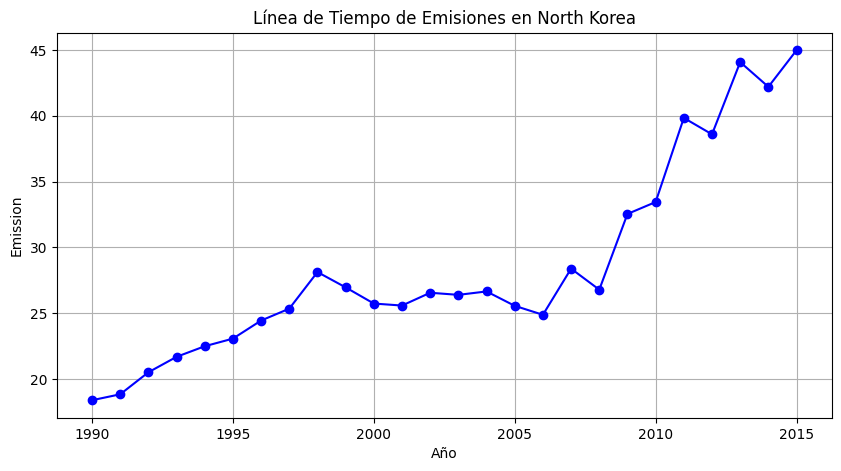

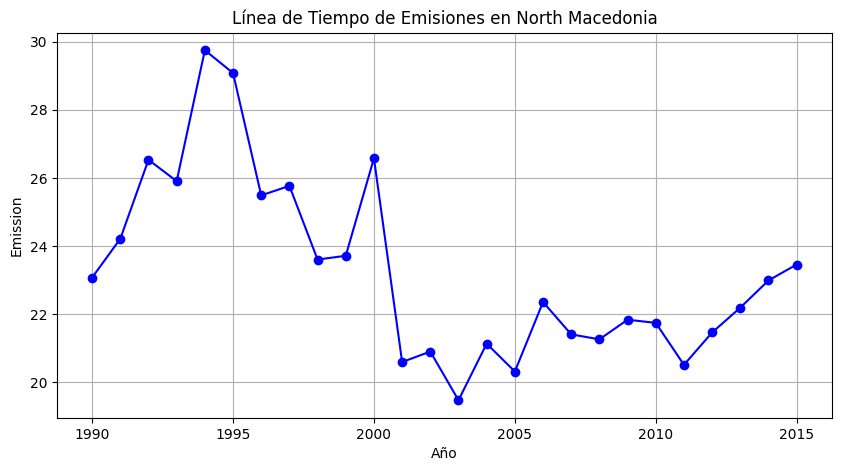

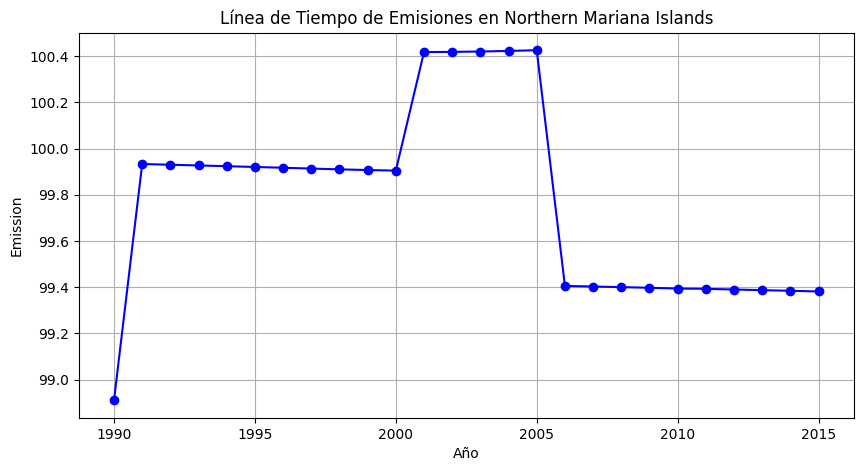

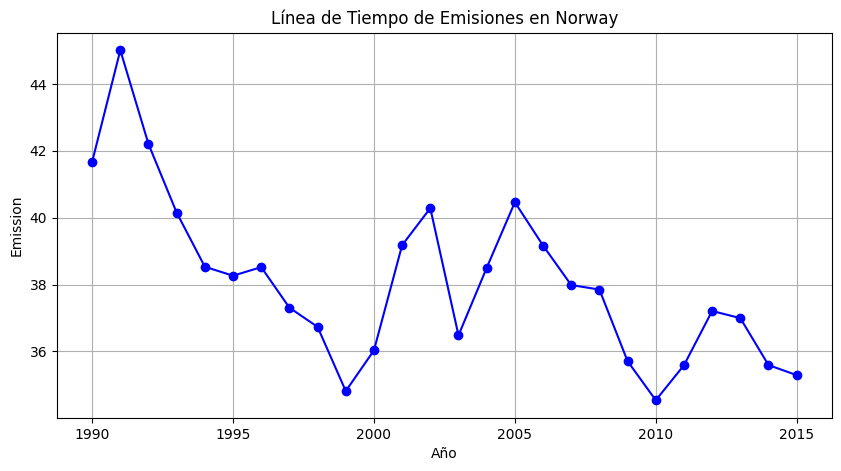

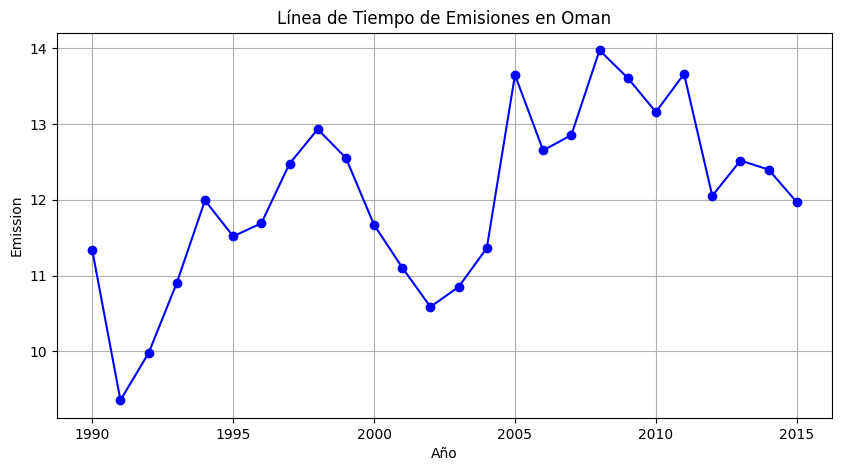

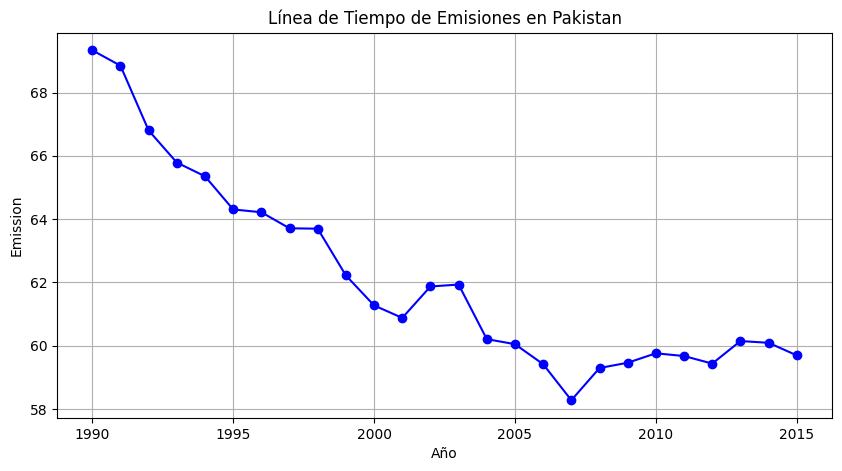

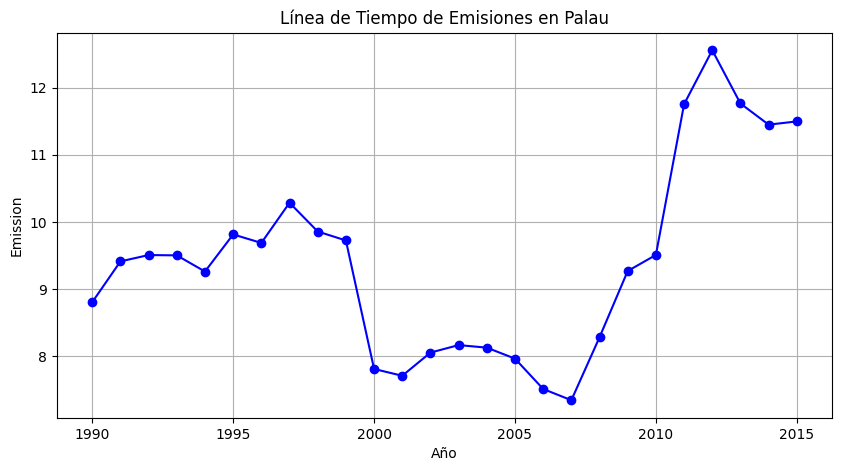

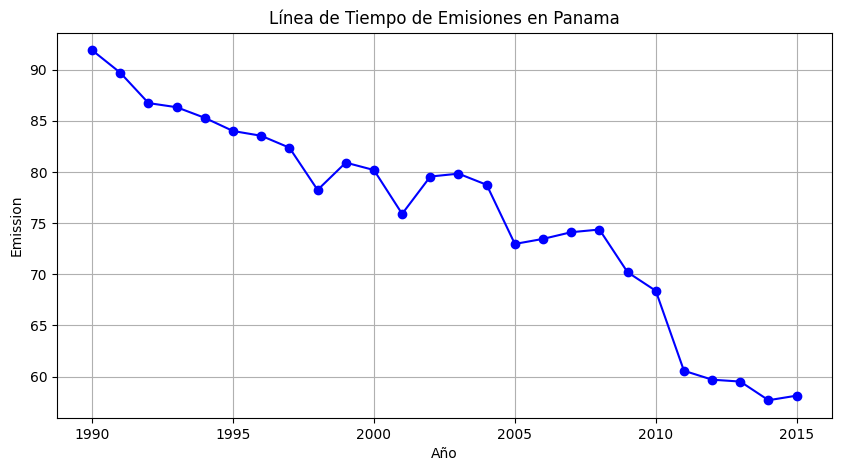

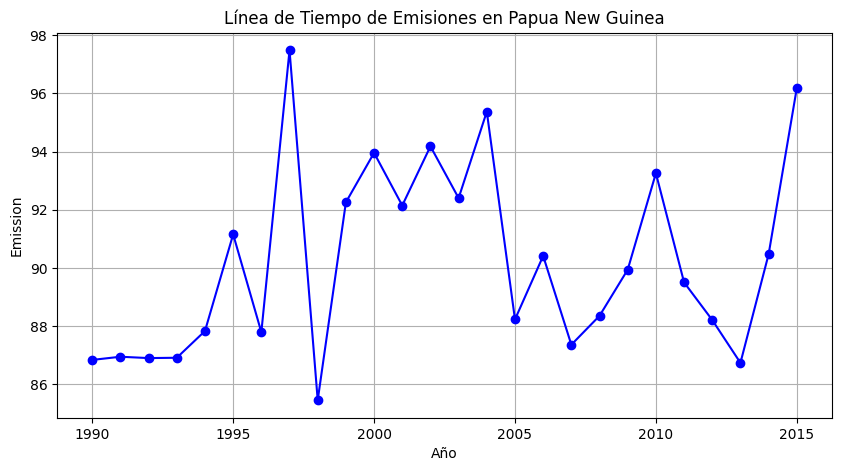

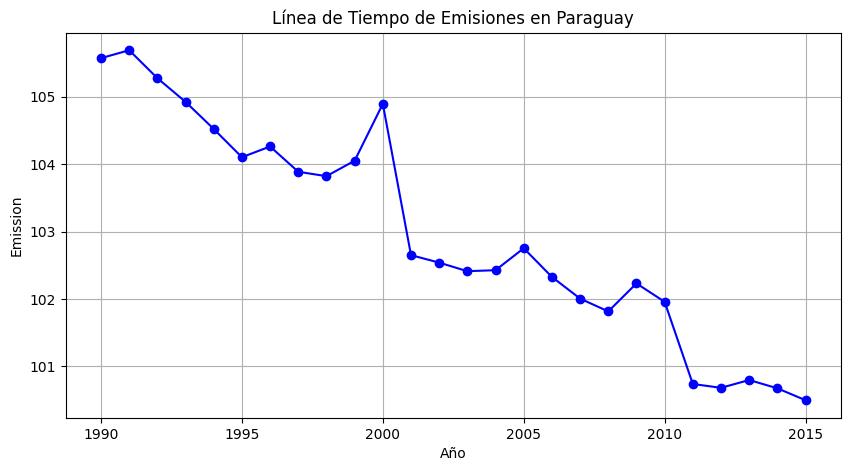

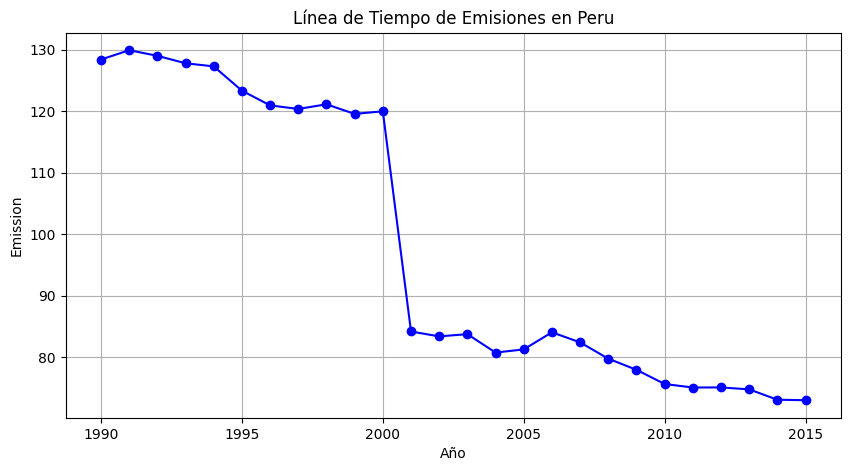

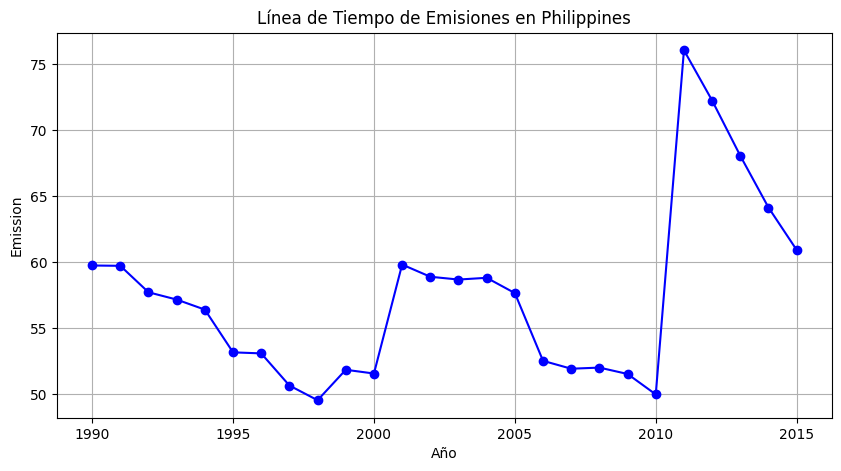

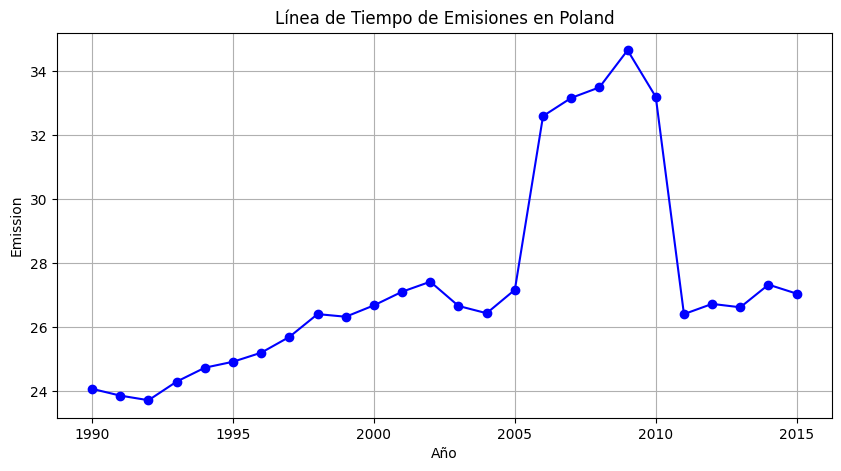

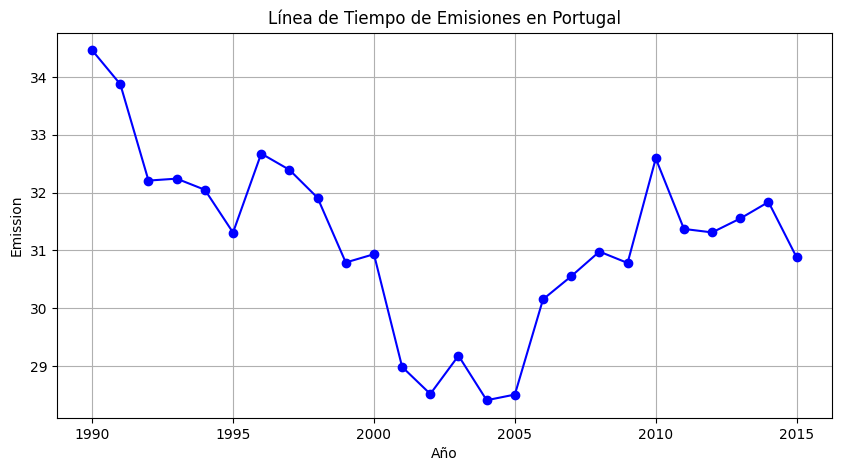

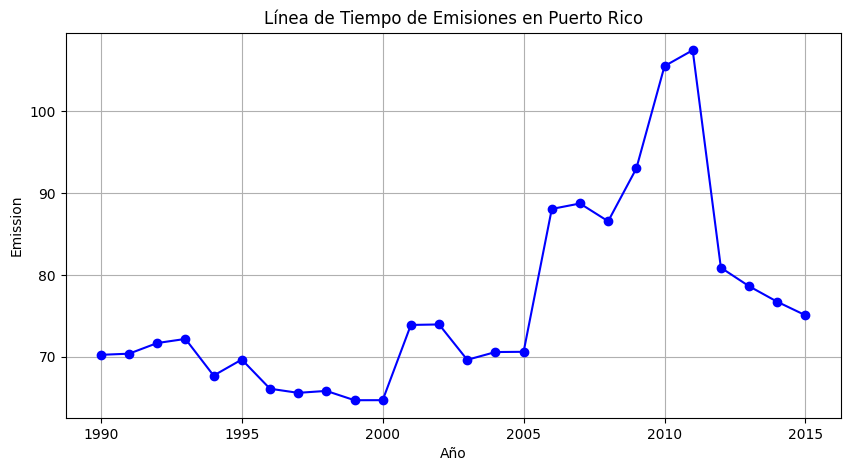

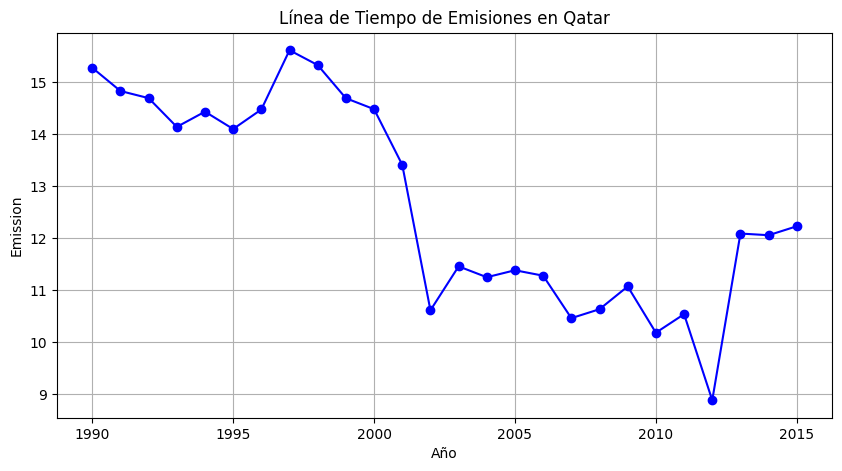

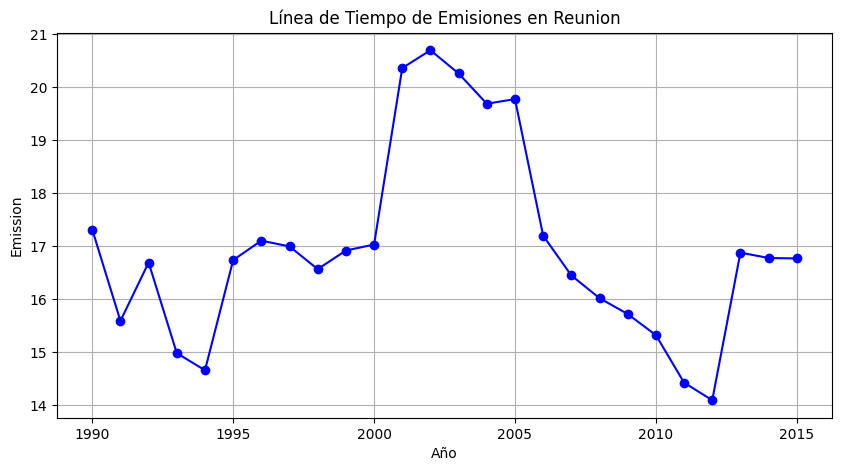

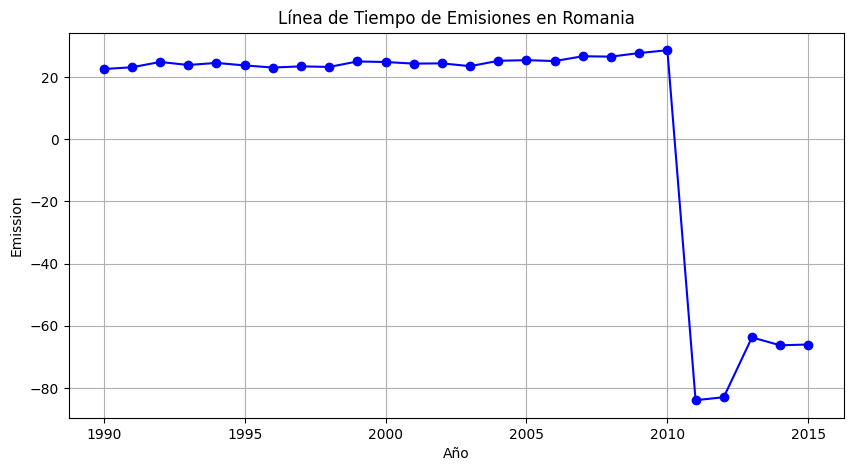

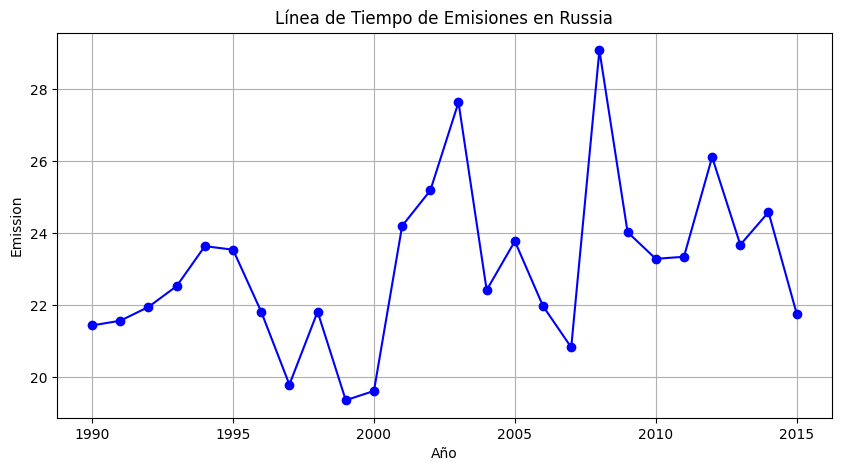

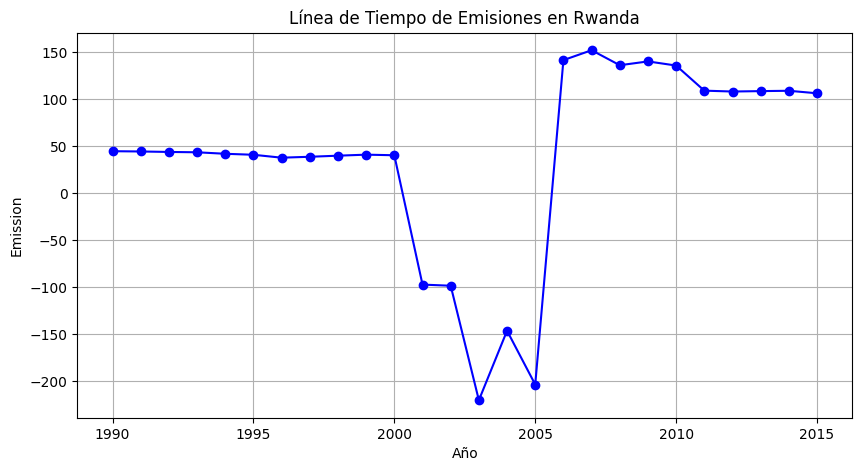

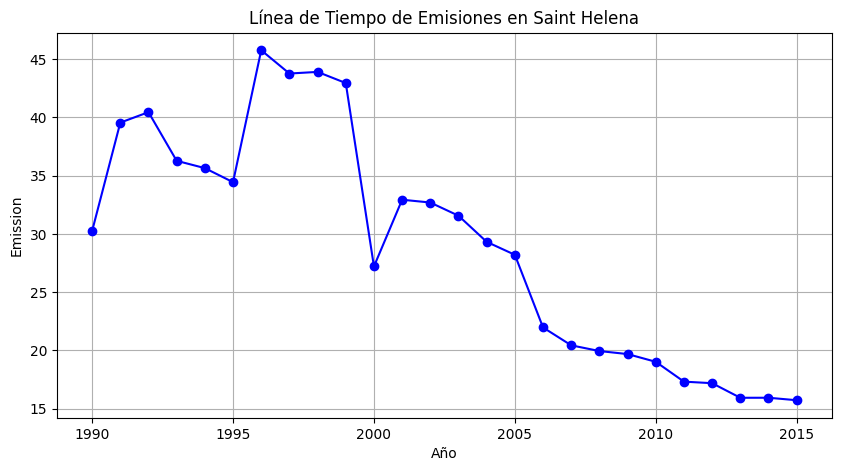

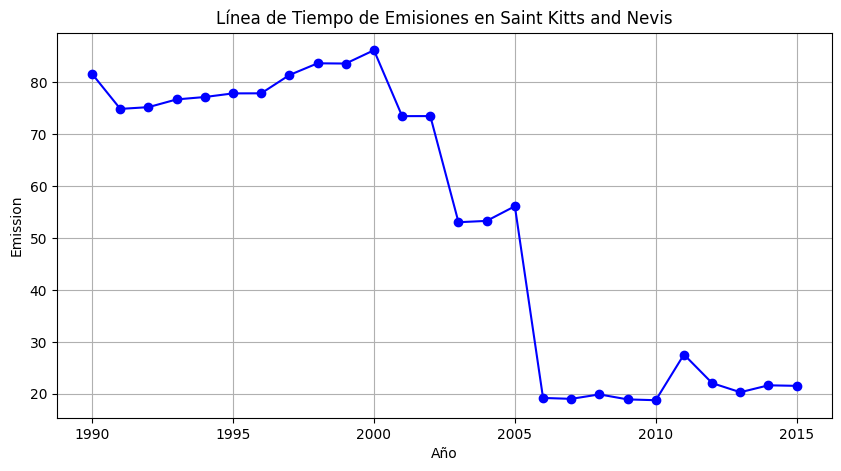

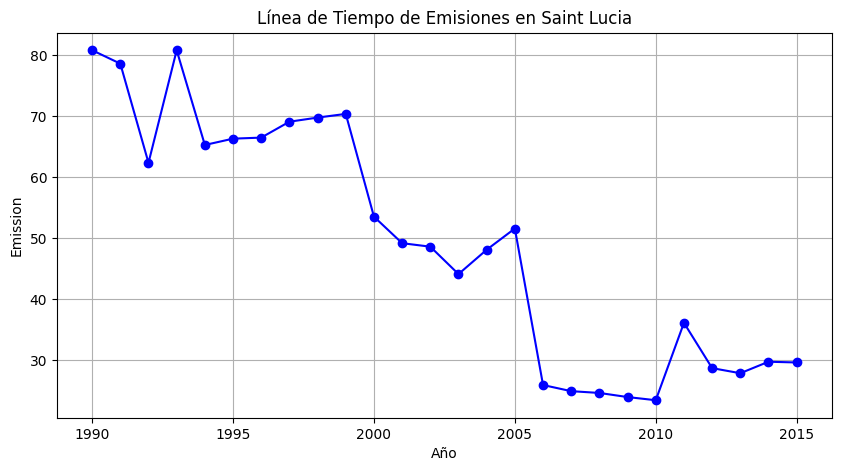

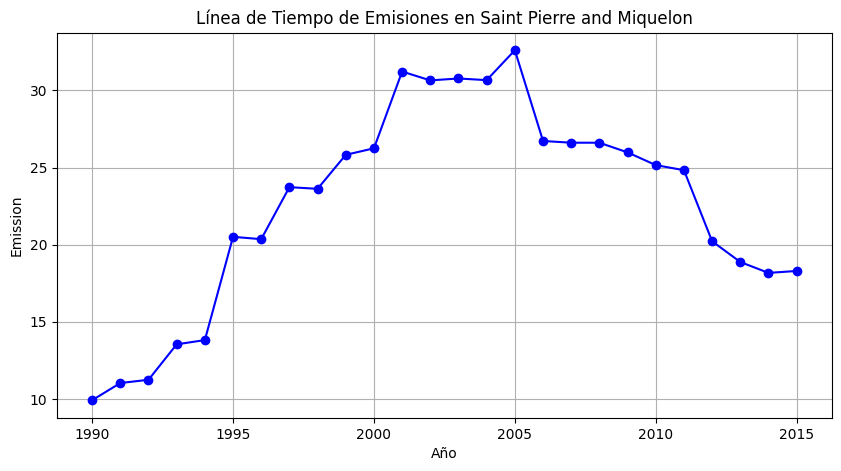

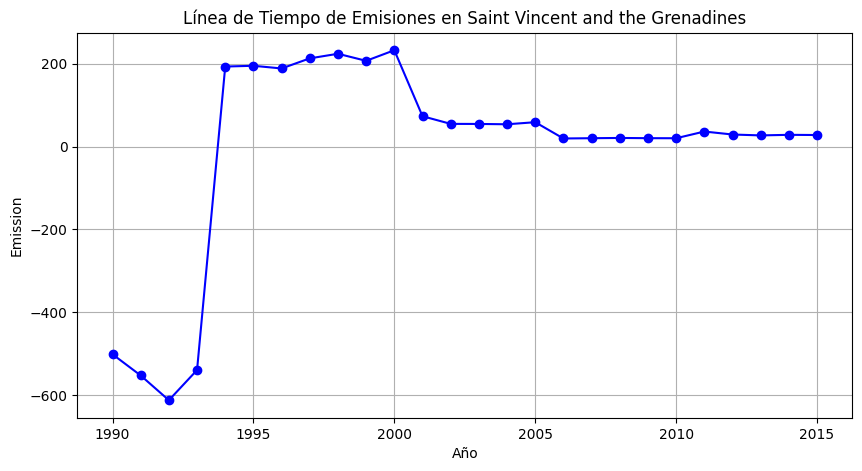

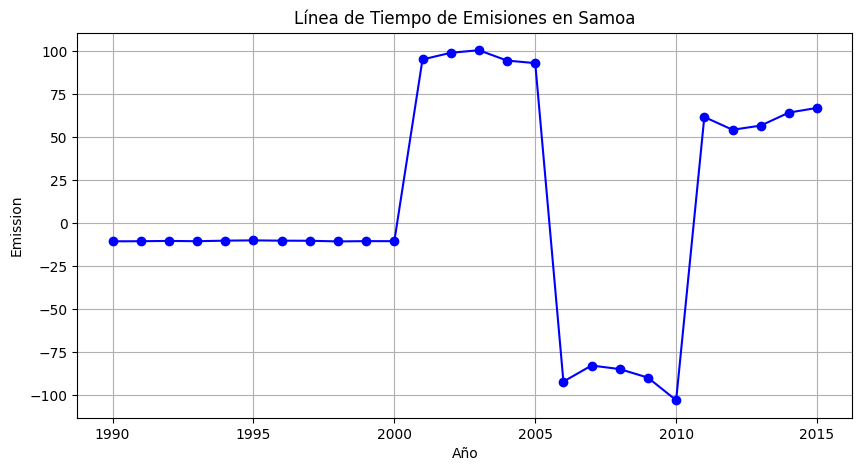

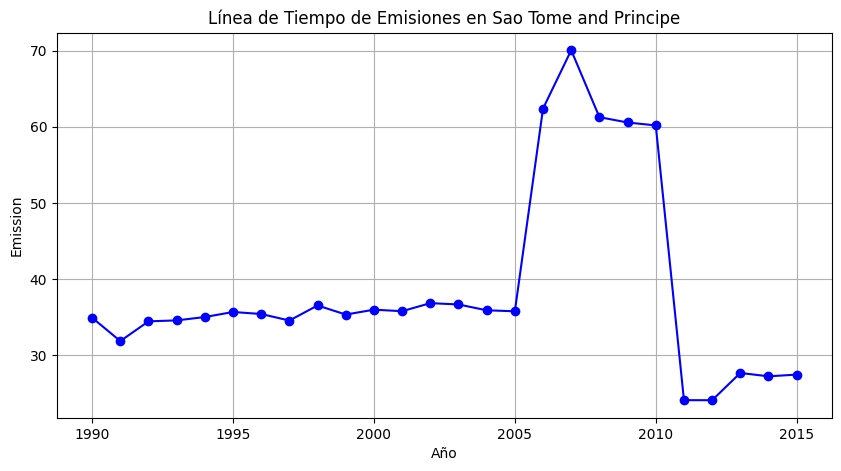

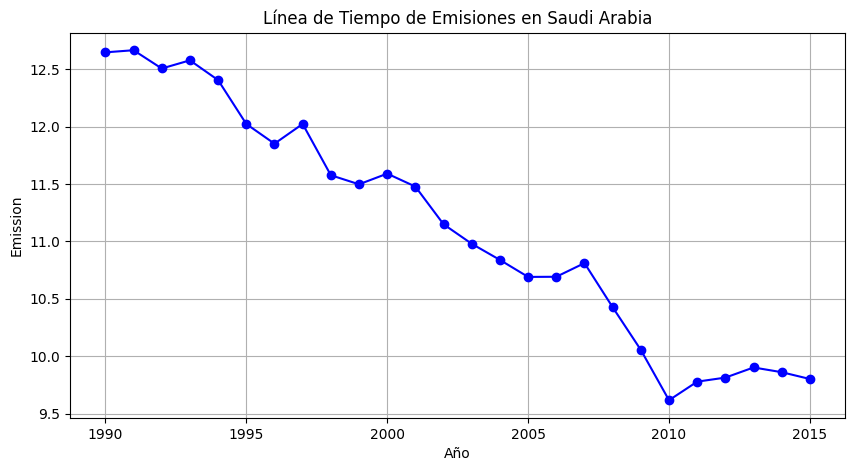

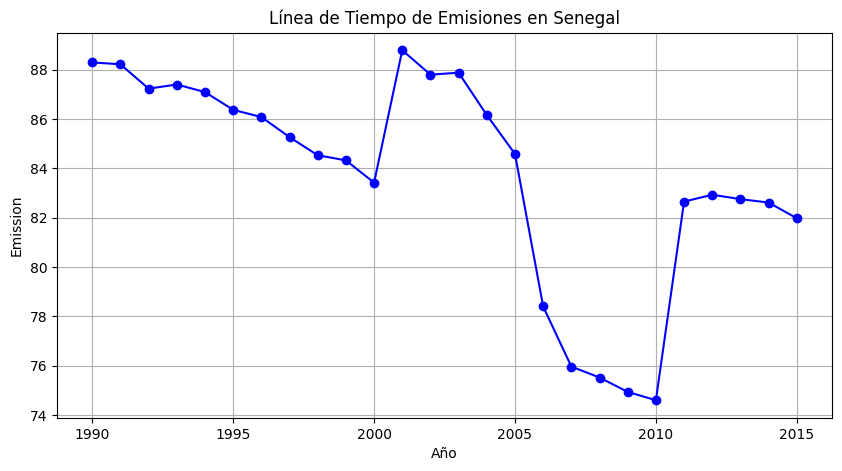

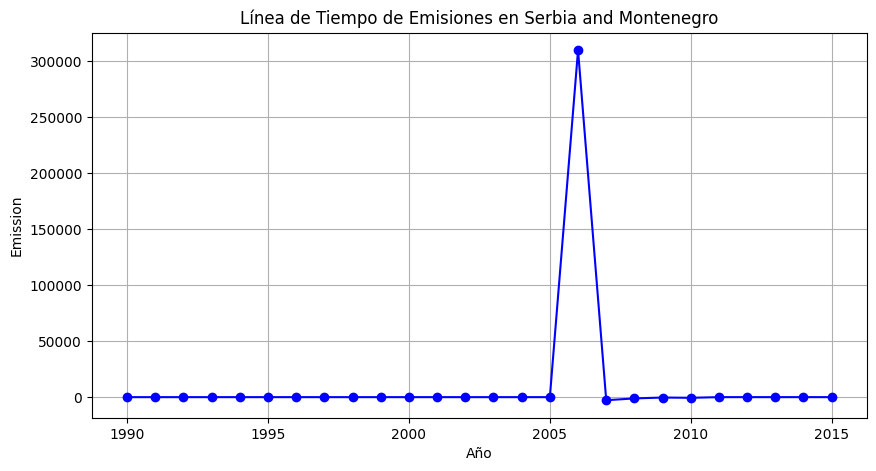

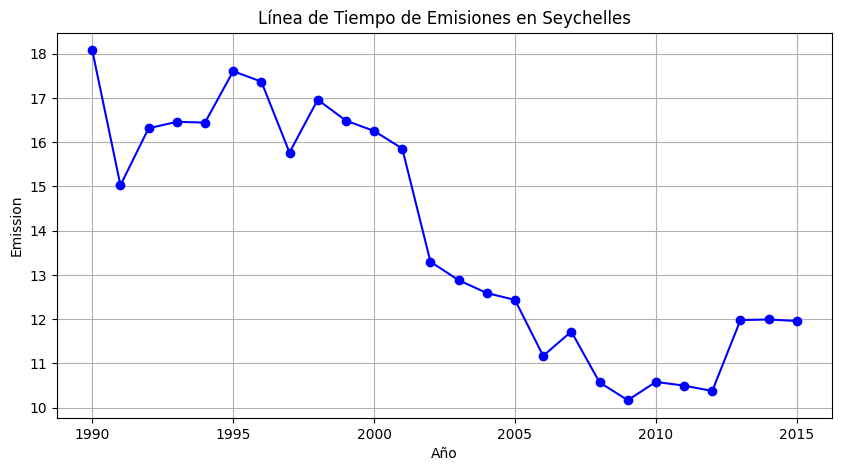

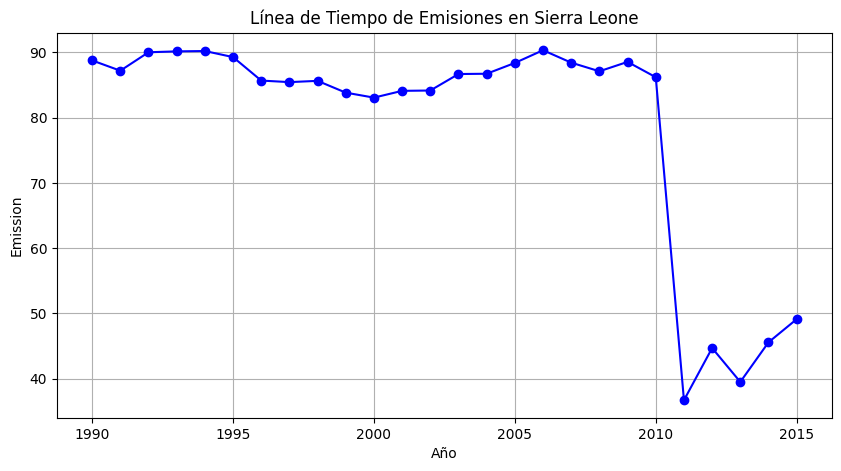

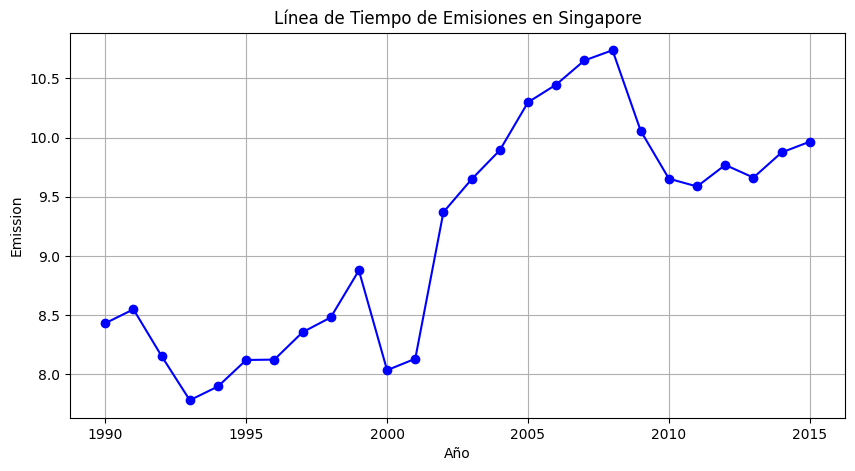

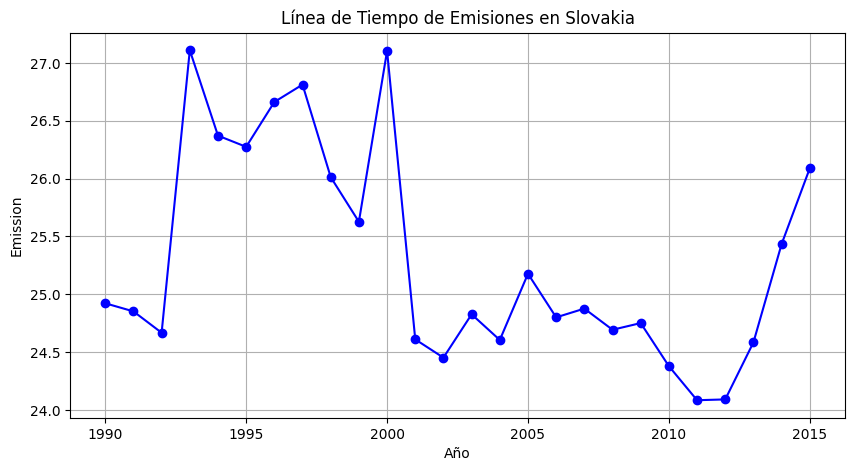

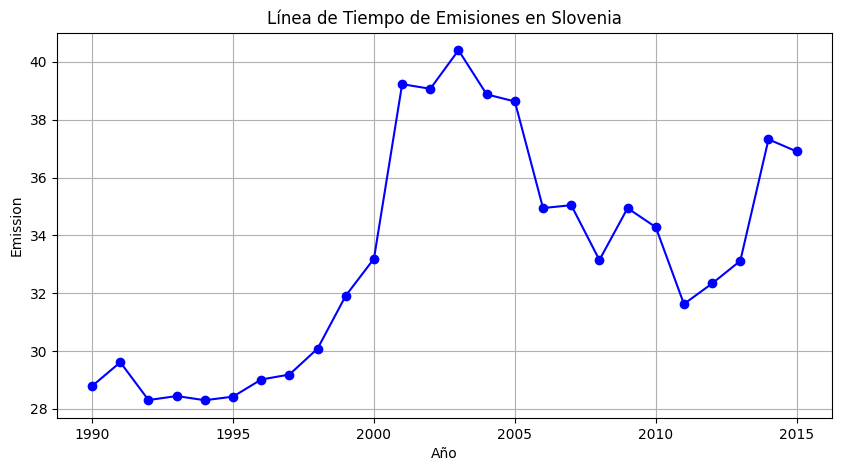

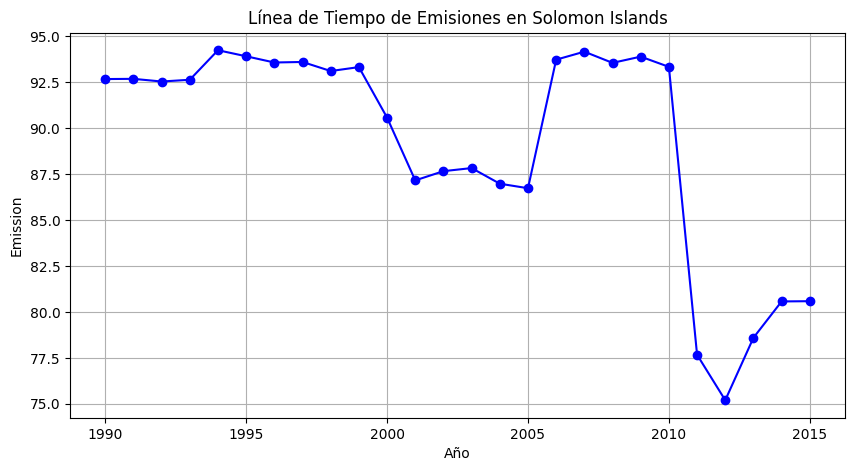

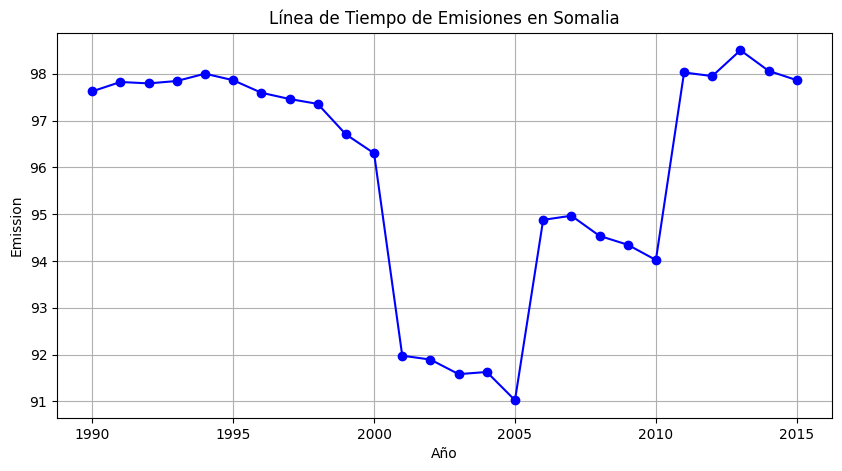

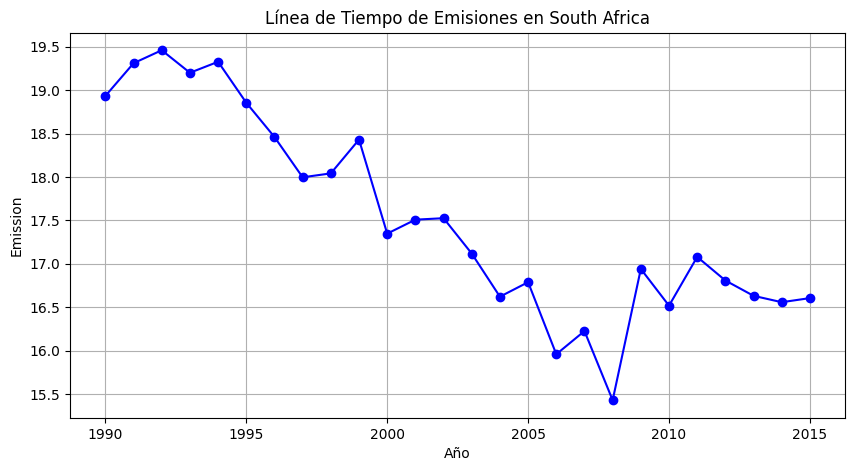

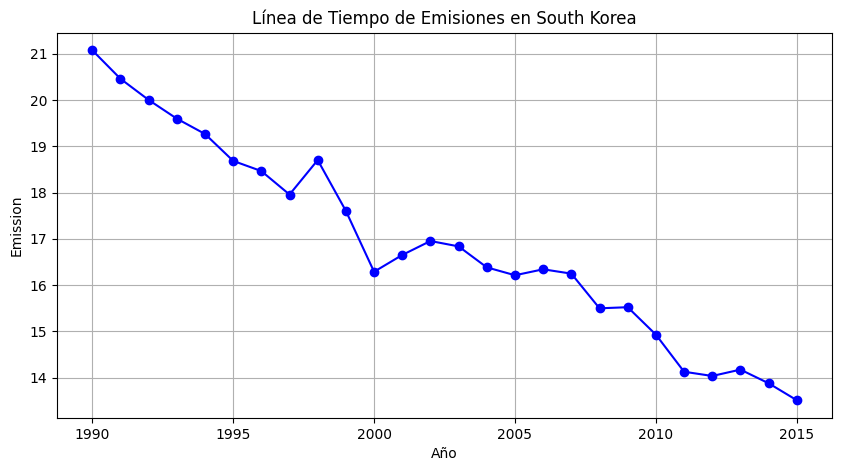

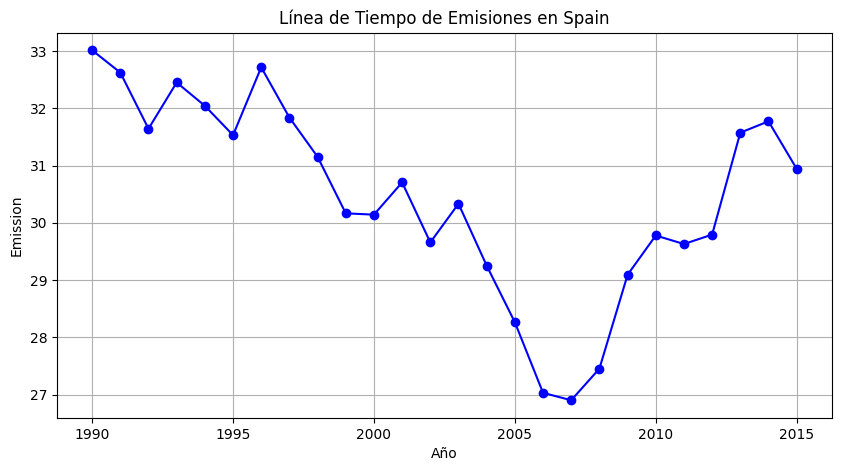

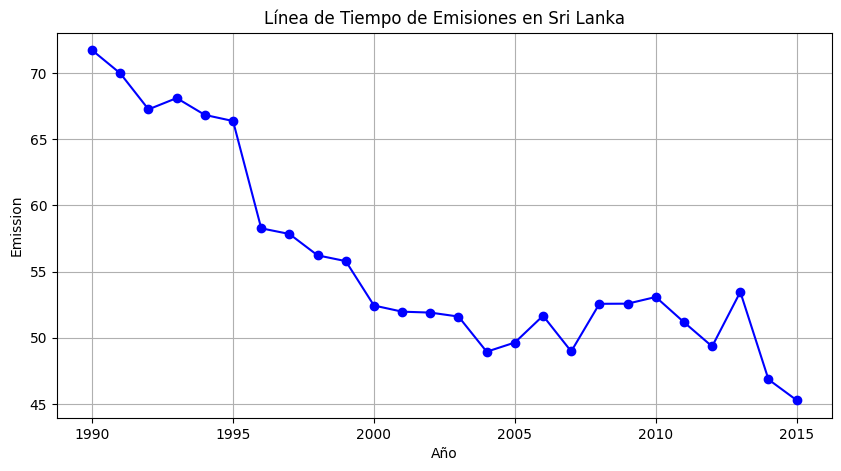

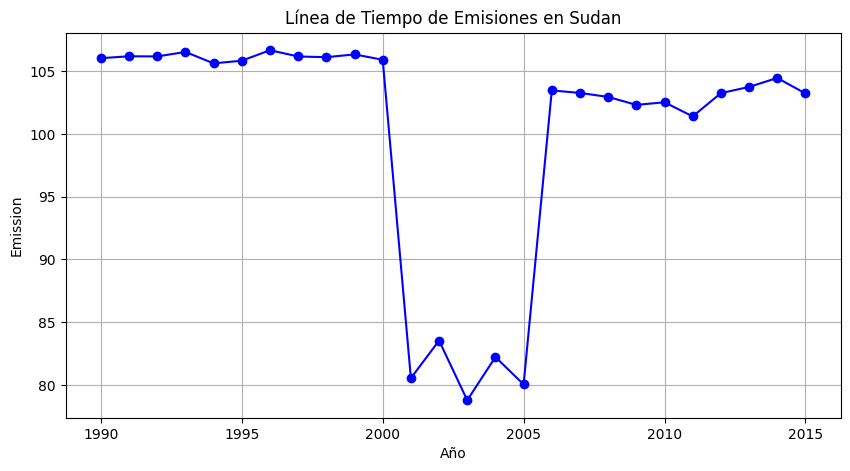

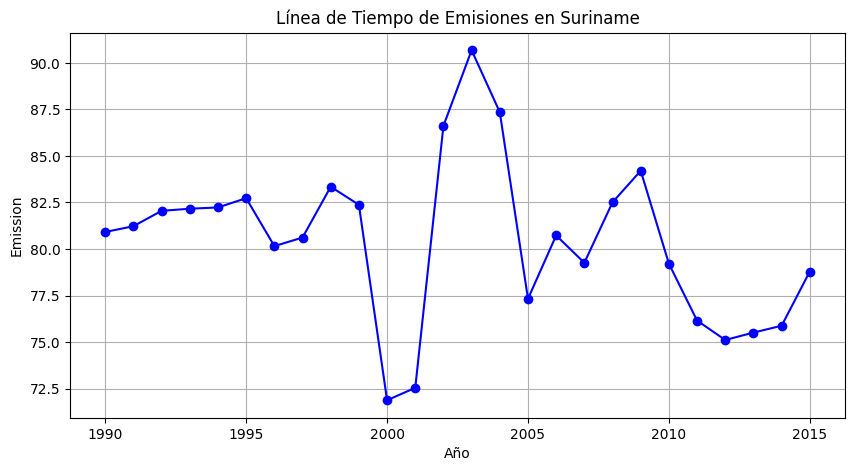

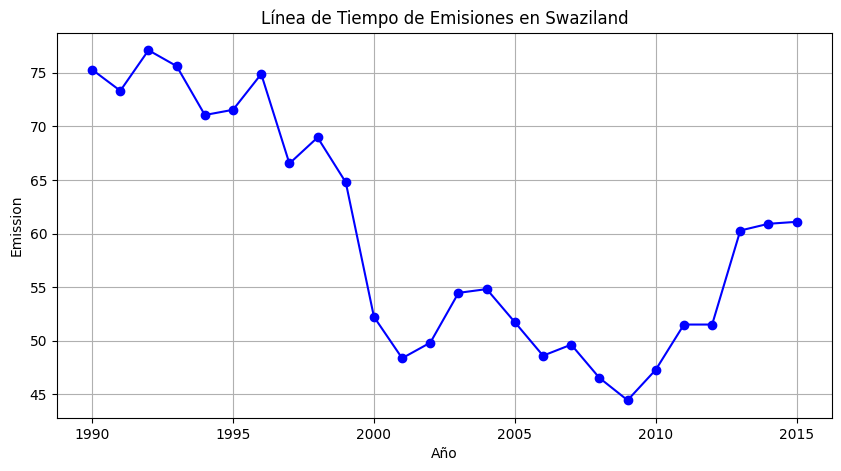

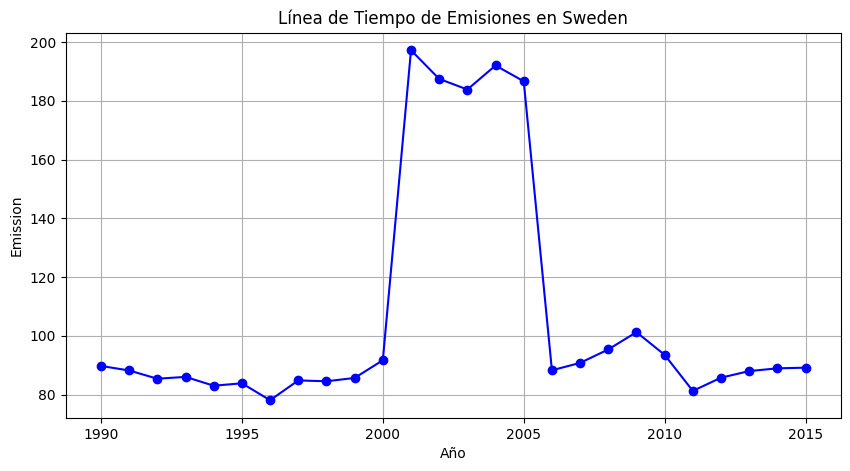

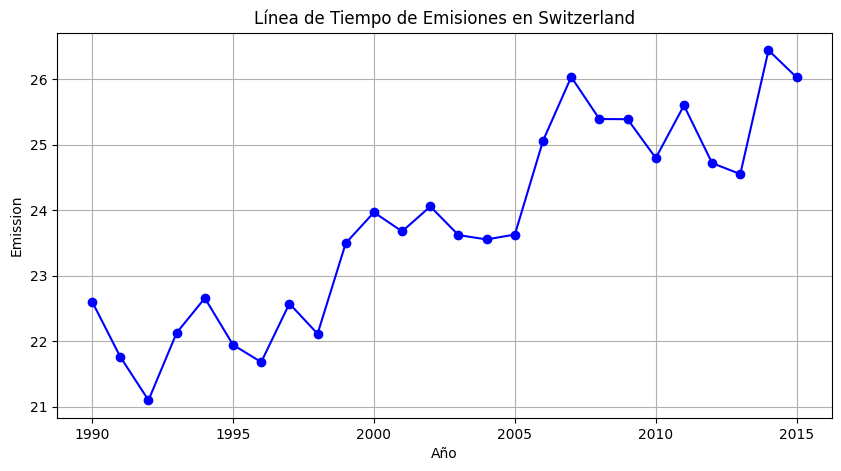

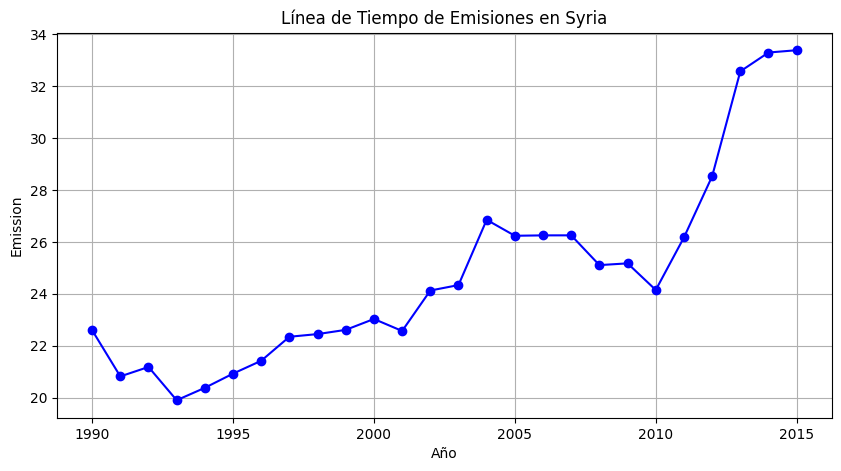

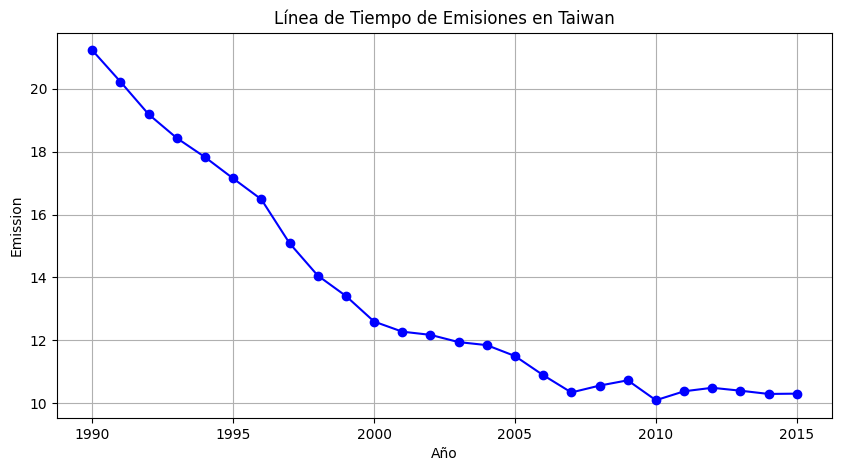

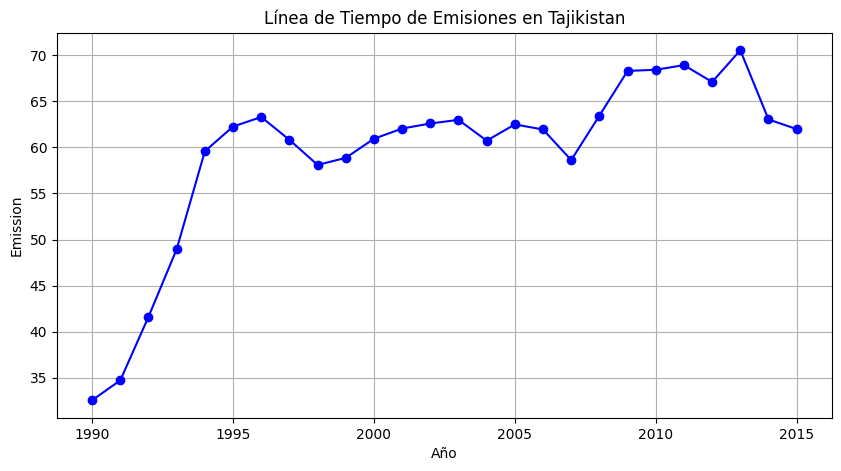

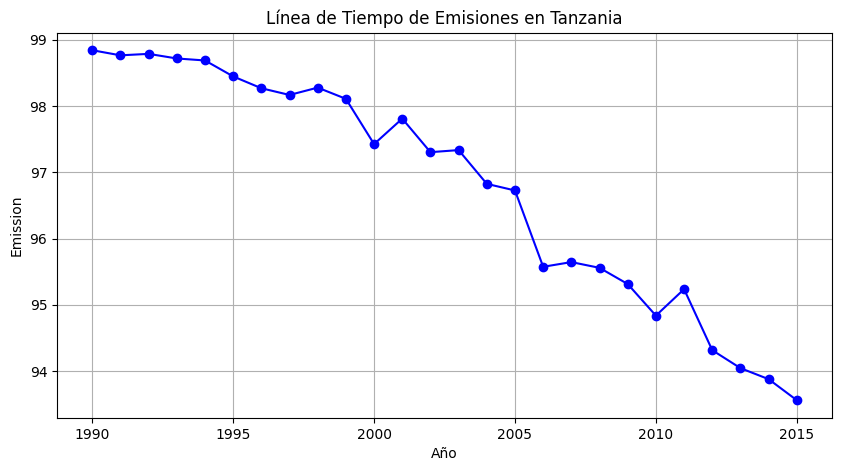

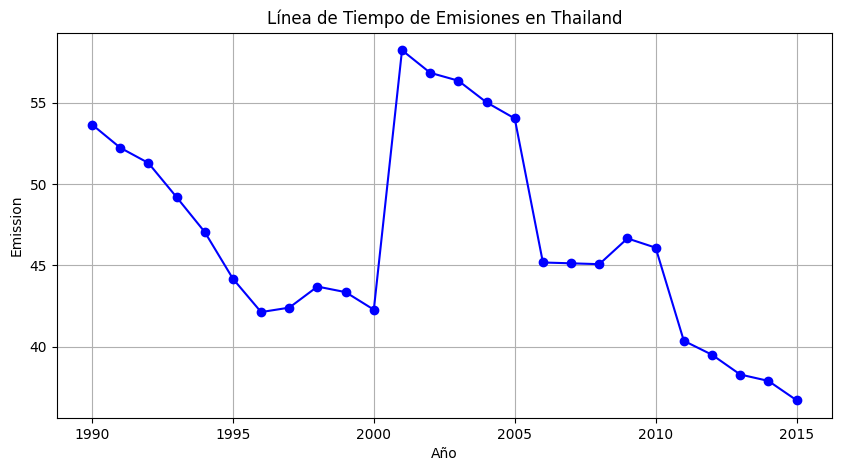

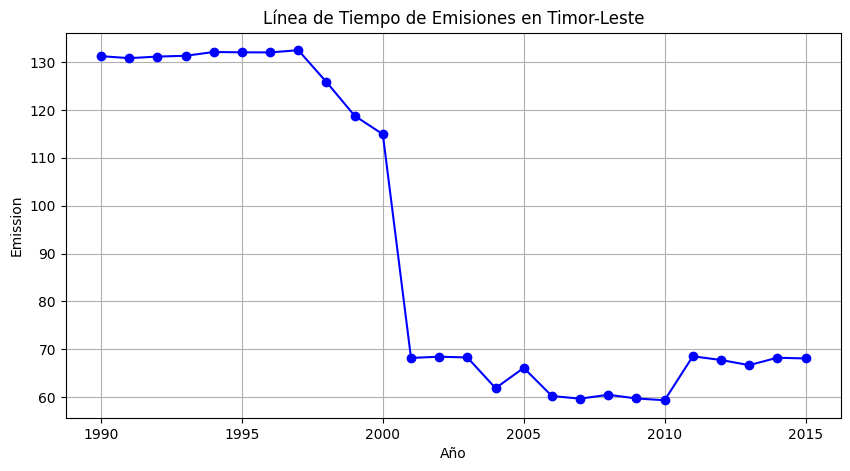

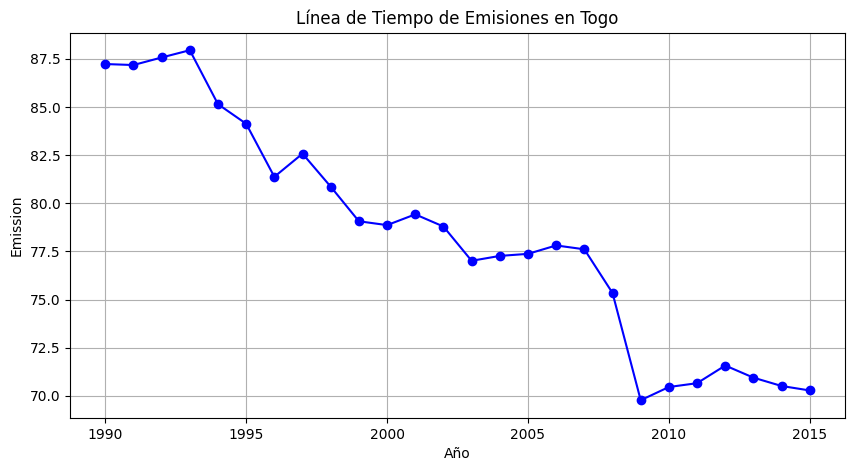

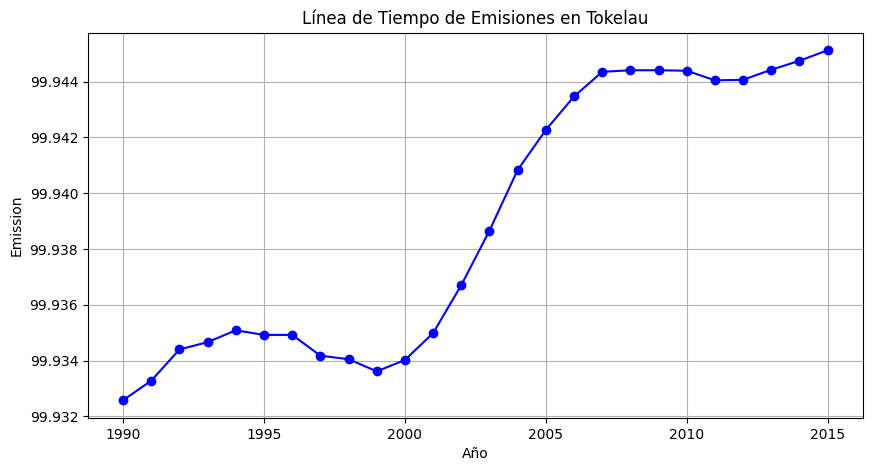

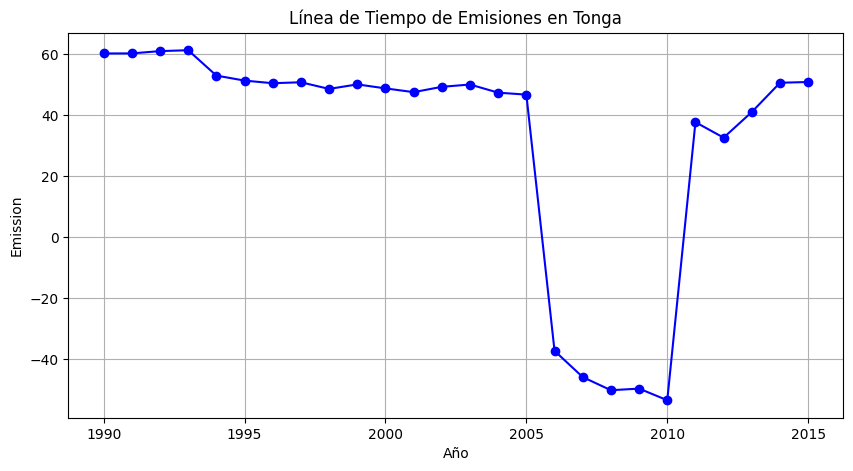

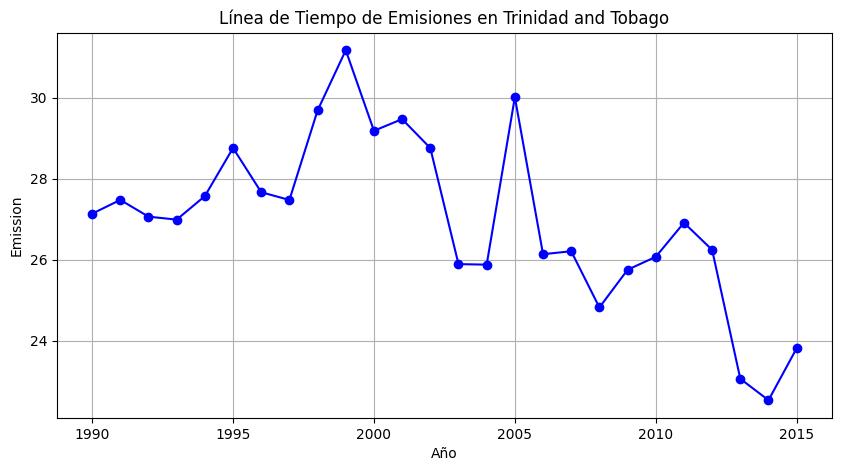

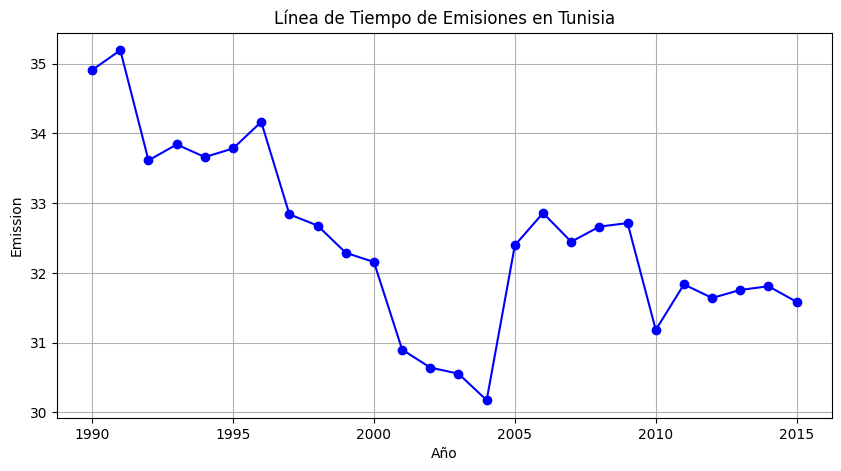

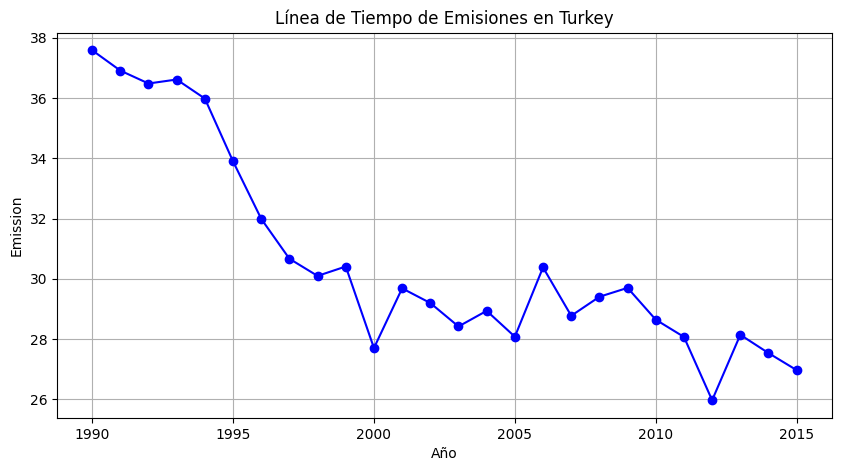

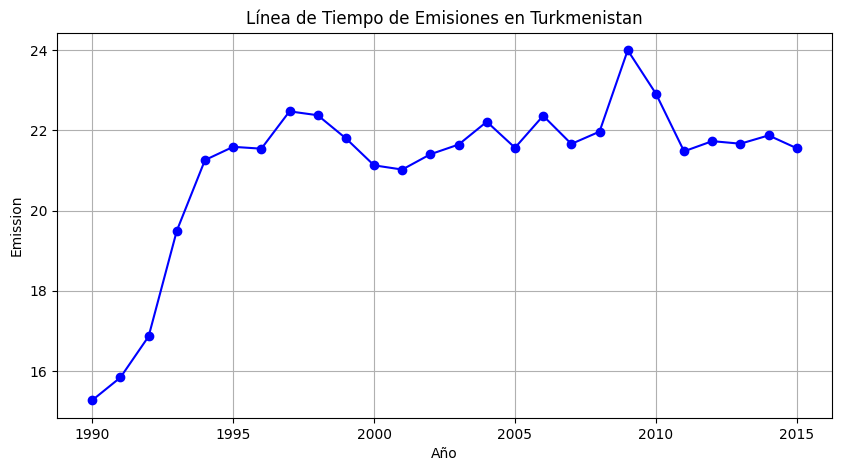

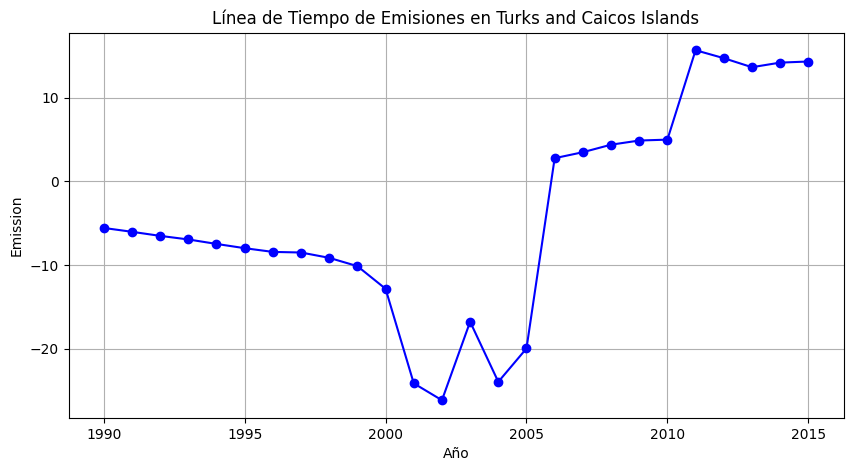

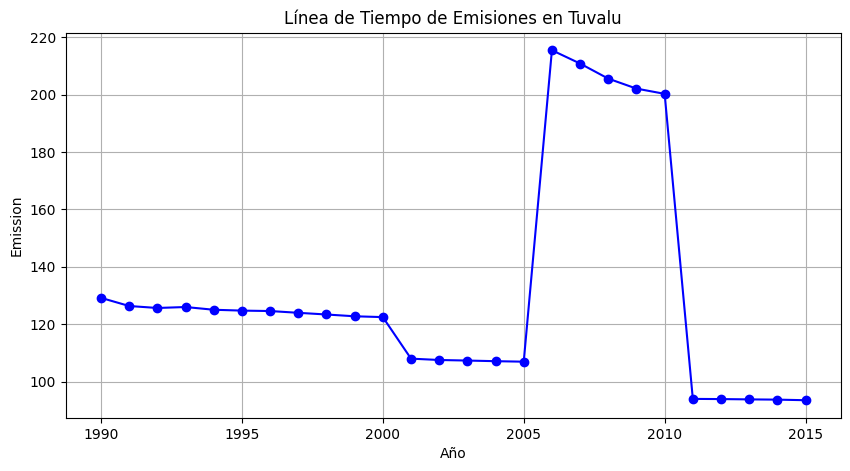

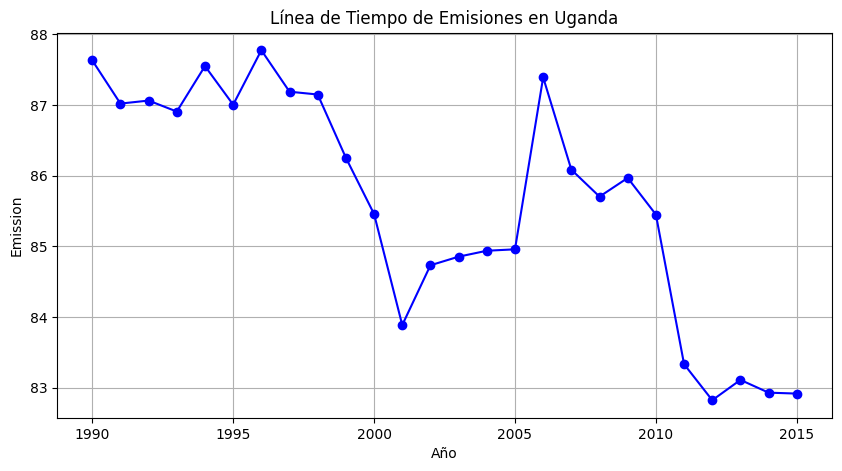

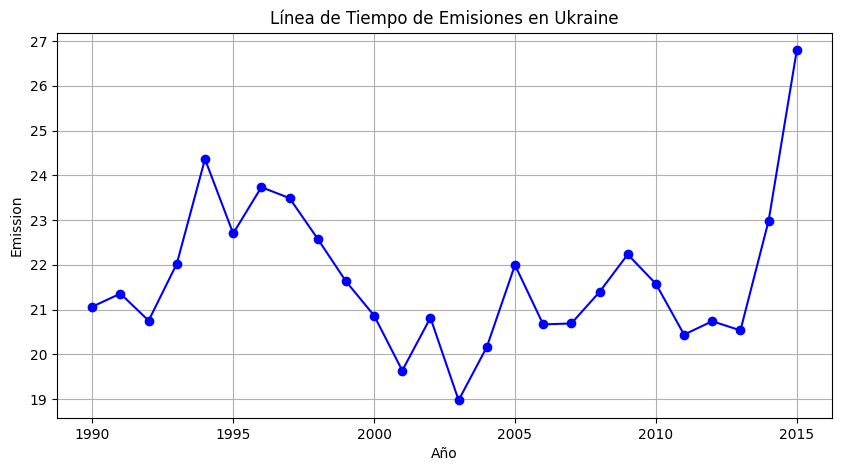

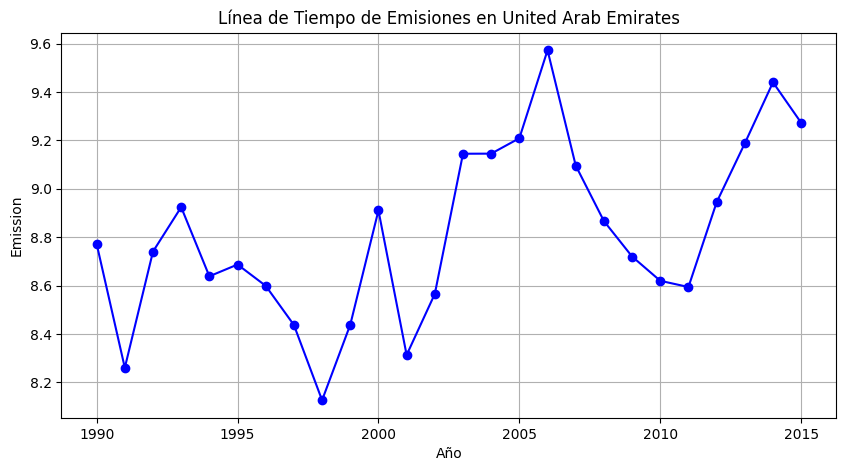

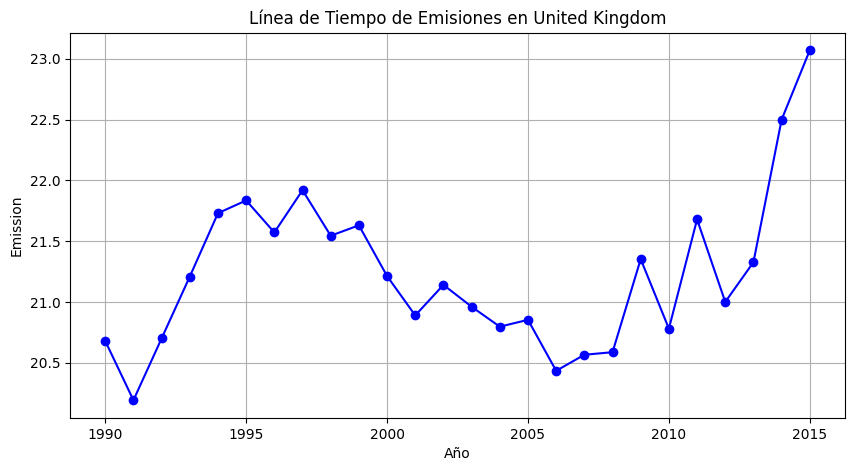

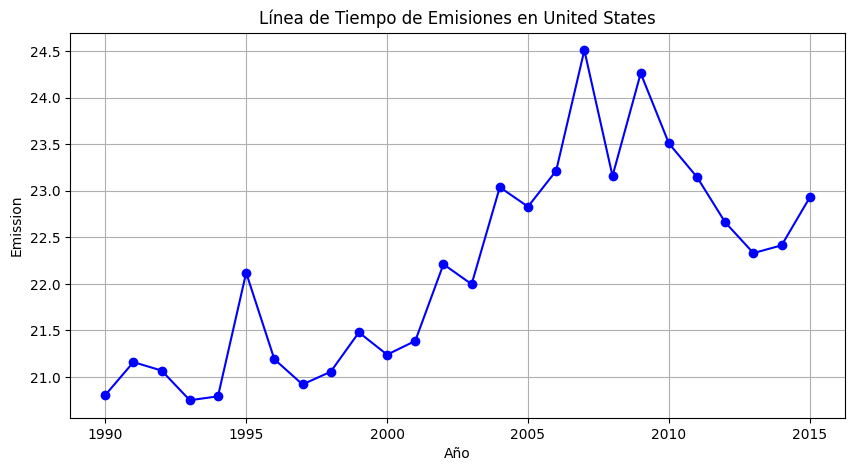

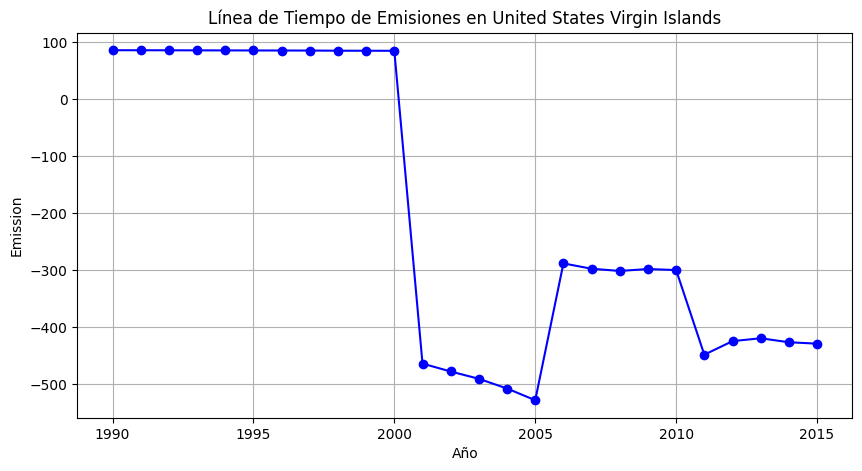

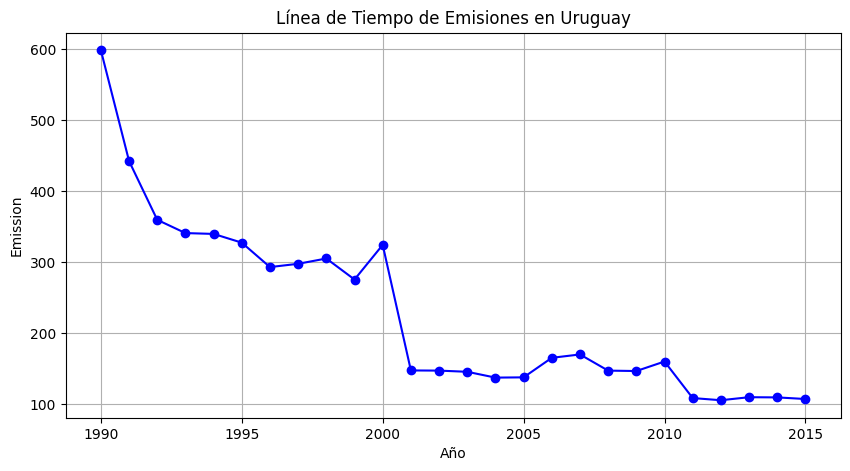

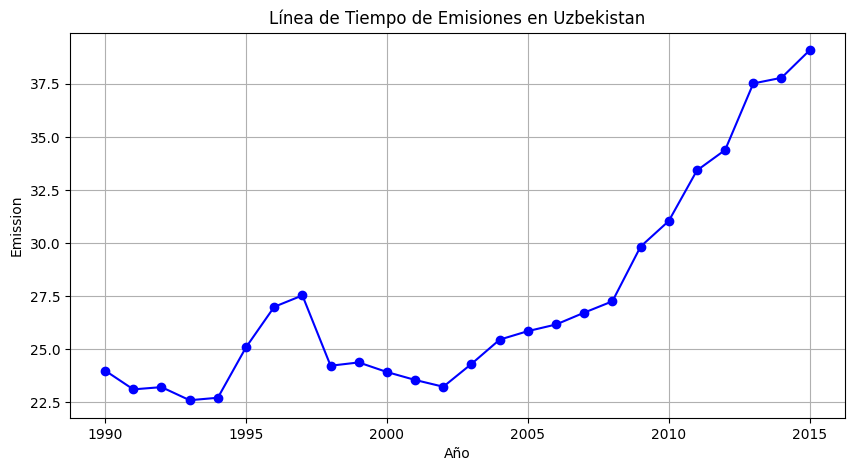

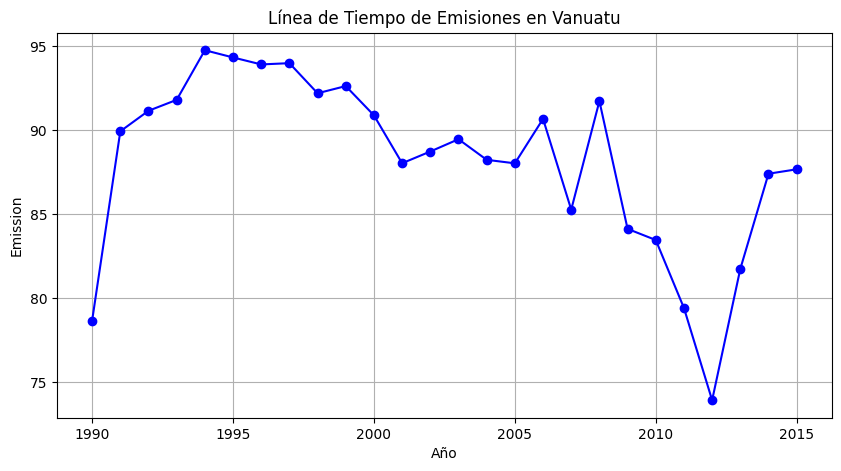

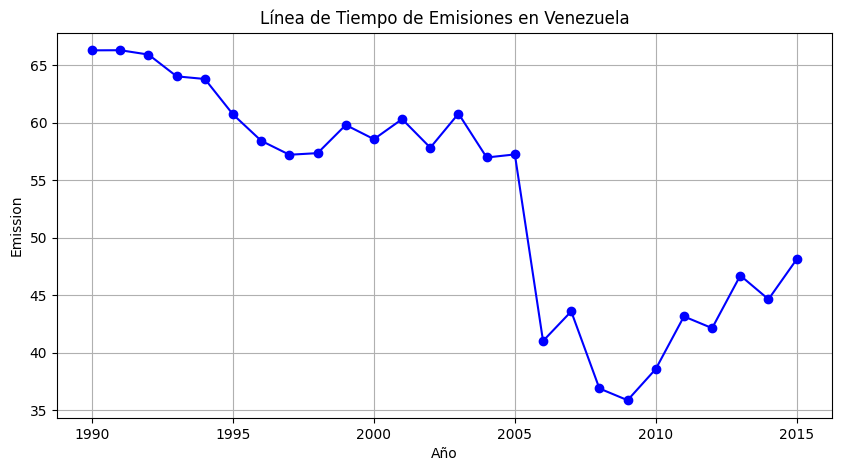

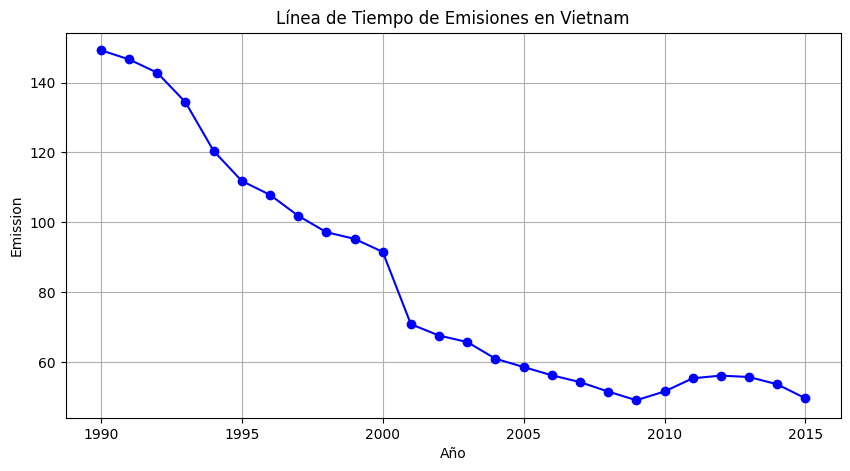

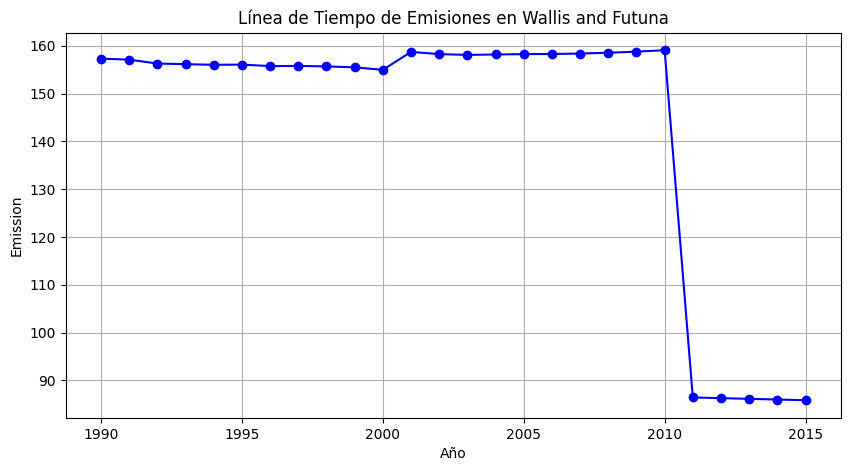

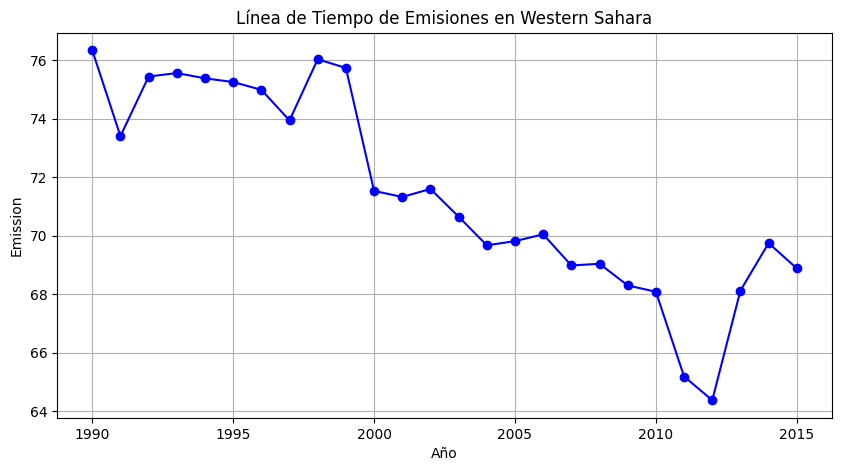

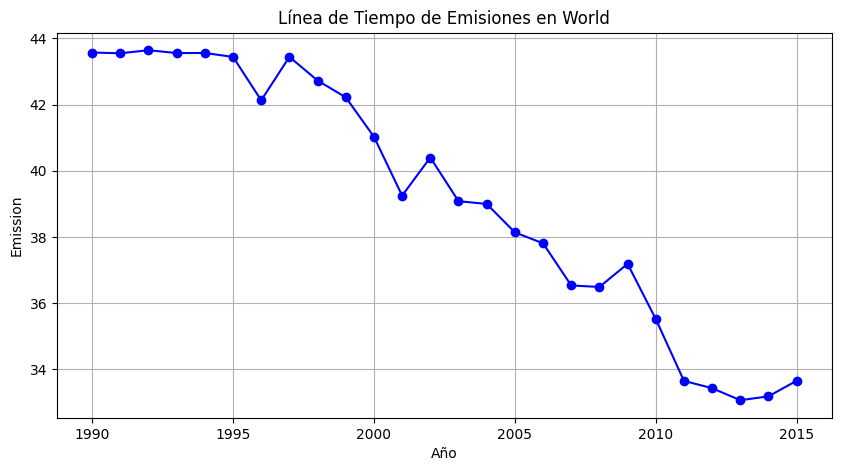

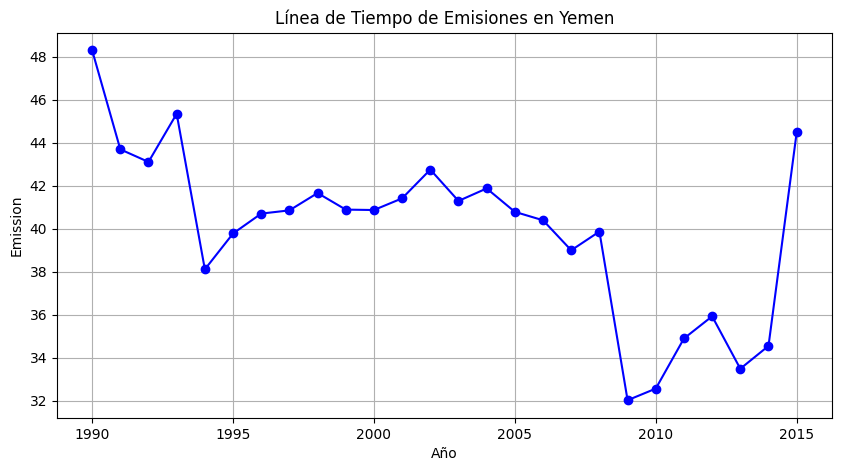

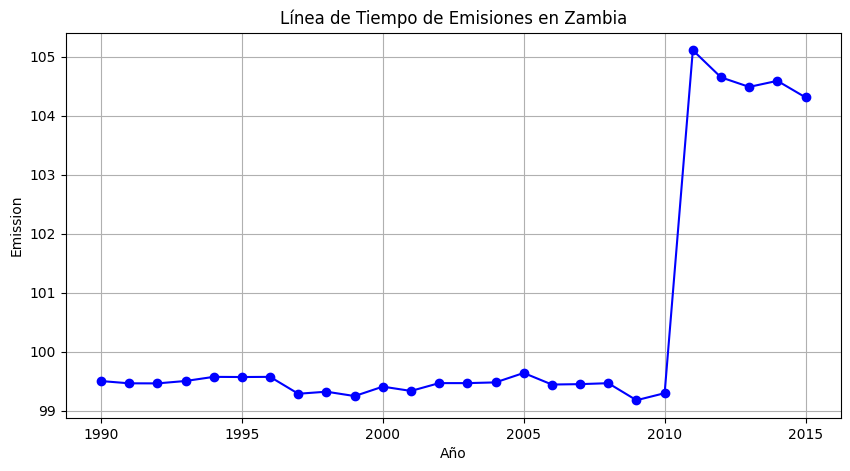

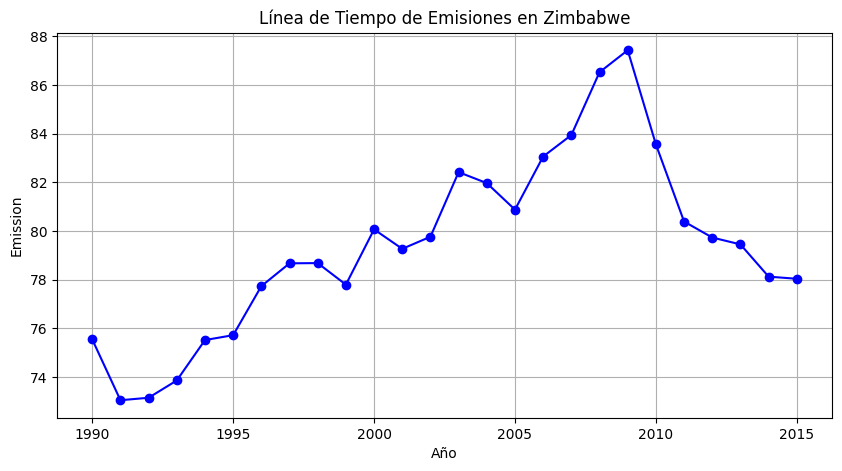

In [36]:
#Lineas del tiempo de emision de cada pais 
paises = data['Entity'].unique()

# Crear el gráfico de línea de tiempo
for pais in paises:
    pais_data = data[data['Entity'] == pais]
    plt.figure(figsize=(10, 5))
    plt.plot(pais_data['Year'], pais_data["Emissions"], marker='o', linestyle='-', color='b')
    plt.xlabel('Año')
    plt.ylabel("Emission")
    plt.title(f'Línea de Tiempo de Emisiones en {pais}')
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()


In [23]:
# Pais que más y menos  emision tiene en el año más reciente y hacer un grafico de tendencia con el tiempo 
# País con las emisiones más altas en 2015
pais_mas_emisiones = data_2015.loc[data_2015['Emissions'].idxmax()]
nameGreater = pais_mas_emisiones["Entity"]

# País con emisiones más bajas en 2015
pais_menos_emisiones = data_2015.loc[data_2015['Emissions'].idxmin()]
nameMinus = pais_menos_emisiones["Entity"]

print("País con las emisiones más altas en 2015:")
print(pais_mas_emisiones)

print("\nPaís con las emisiones más bajas en 2015:")
print(pais_menos_emisiones)


País con las emisiones más altas en 2015:
Entity       Micronesia
Code                NaN
Year               2015
Emissions     778.98225
Name: 3301, dtype: object

País con las emisiones más bajas en 2015:
Entity            Latvia
Code                 LVA
Year                2015
Emissions   -2302.854328
Name: 2781, dtype: object


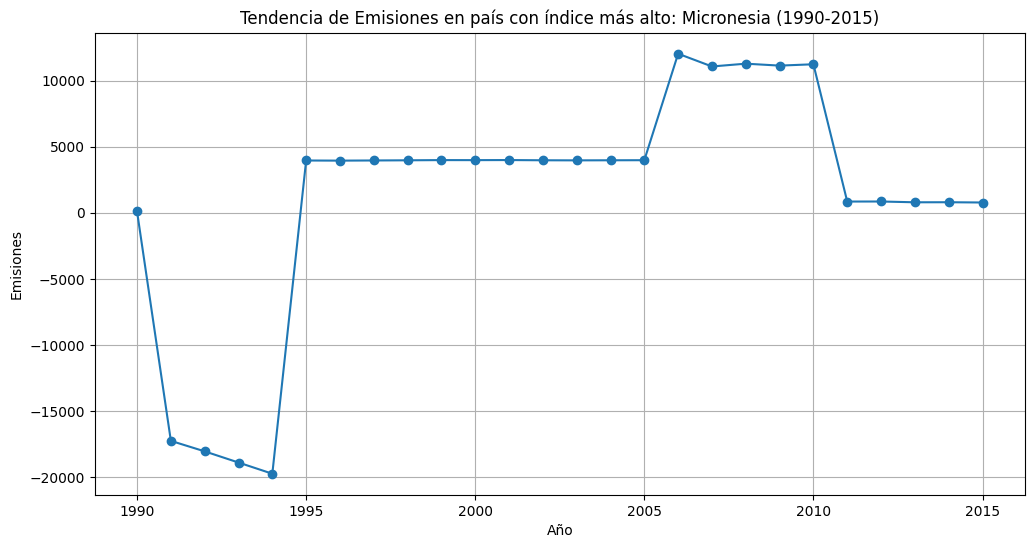

In [24]:
greaterInfo = data[(data['Entity'] == nameGreater) & (data['Year'] >= 1990) & (data['Year'] <= 2015)]

plt.figure(figsize=(12, 6))
plt.plot(greaterInfo['Year'], greaterInfo["Emissions"], marker='o', linestyle='-')
plt.title(f"Tendencia de Emisiones en país con índice más alto: {nameGreater} (1990-2015)")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.show()

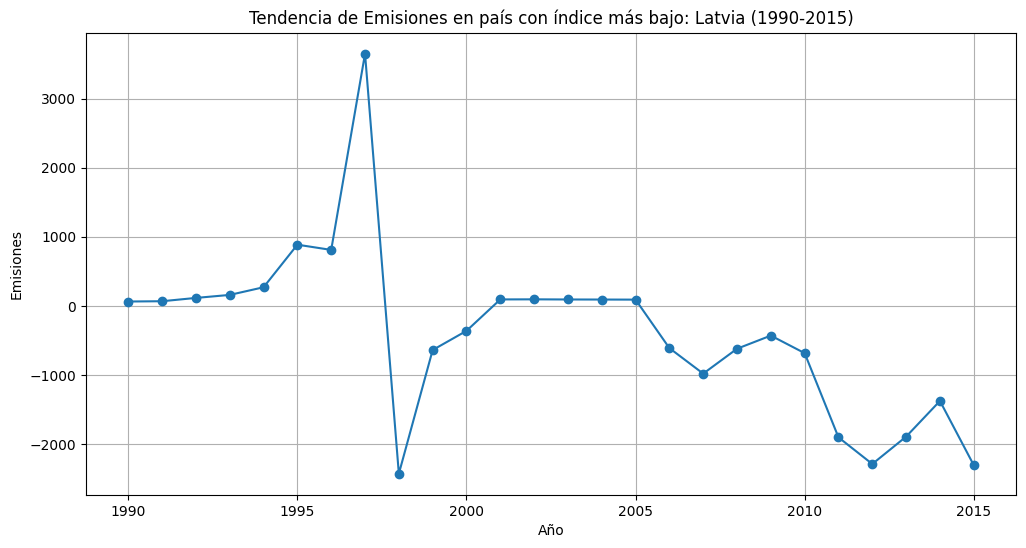

In [25]:
minusInfo = data[(data['Entity'] == nameMinus) & (data['Year'] >= 1990) & (data['Year'] <= 2015)]

plt.figure(figsize=(12, 6))
plt.plot(minusInfo['Year'], minusInfo["Emissions"], marker='o', linestyle='-')
plt.title(f"Tendencia de Emisiones en país con índice más bajo: {nameMinus} (1990-2015)")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.show()

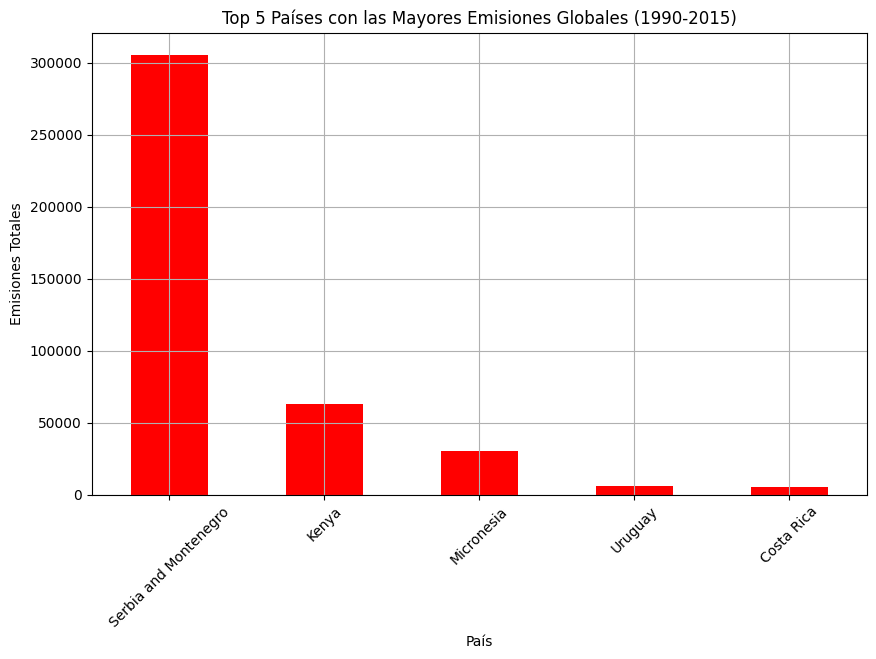

In [27]:
# Top 5 de los paises con mayor emision global 
total_emissions_by_country = data.groupby('Entity')['Emissions'].sum()
top_5_countries = total_emissions_by_country.nlargest(5)

plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='red')
plt.title("Top 5 Países con las Mayores Emisiones Globales (1990-2015)")
plt.xlabel("País")
plt.ylabel("Emisiones Totales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

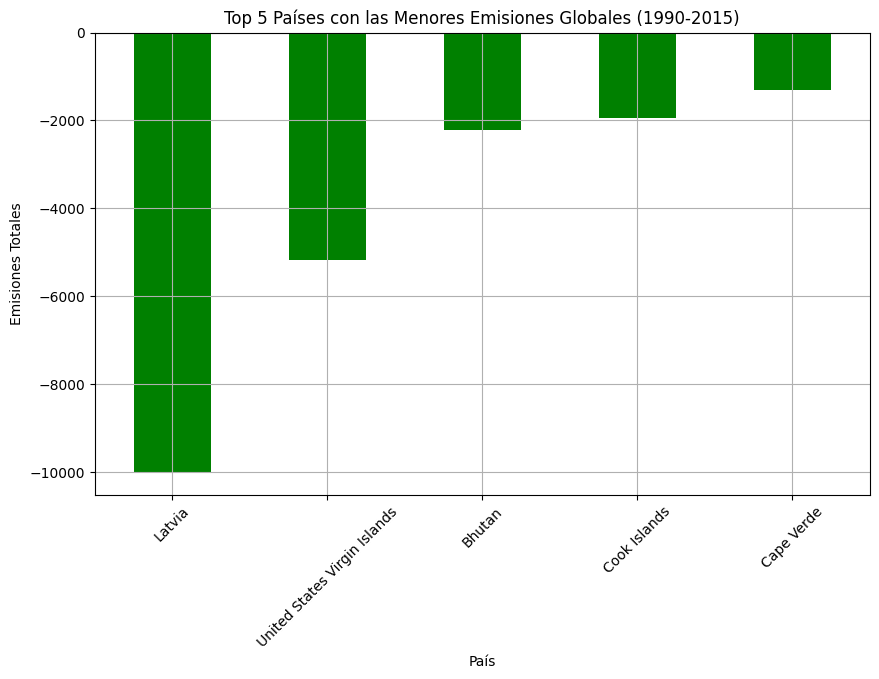

In [28]:
# 5 países con las menores emisiones totales
bottom_5_countries = total_emissions_by_country.nsmallest(5)

plt.figure(figsize=(10, 6))
bottom_5_countries.plot(kind='bar', color='green')
plt.title("Top 5 Países con las Menores Emisiones Globales (1990-2015)")
plt.xlabel("País")
plt.ylabel("Emisiones Totales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

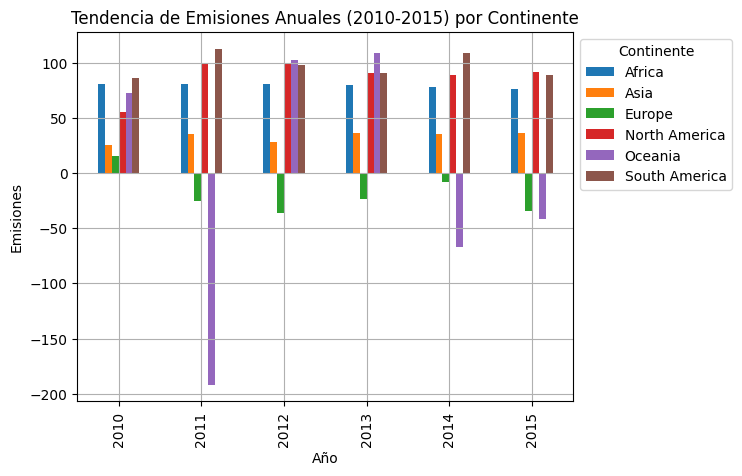

In [26]:
merged_data = world.merge(data, left_on='name', right_on='Entity')
filtered_data = merged_data[(merged_data['Year'] >= 2010) & (merged_data['Year'] <= 2015)]
pivot_table = pd.pivot_table(filtered_data, values='Emissions', index='Year', columns='continent', aggfunc='mean')

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar')
plt.title("Tendencia de Emisiones Anuales (2010-2015) por Continente")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.legend(title="Continente", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


Entity
Micronesia    4078.414889
Costa Rica    3425.443135
Chile         1742.087545
Liberia       1446.318274
Botswana       612.373973
Name: Emissions, dtype: float64


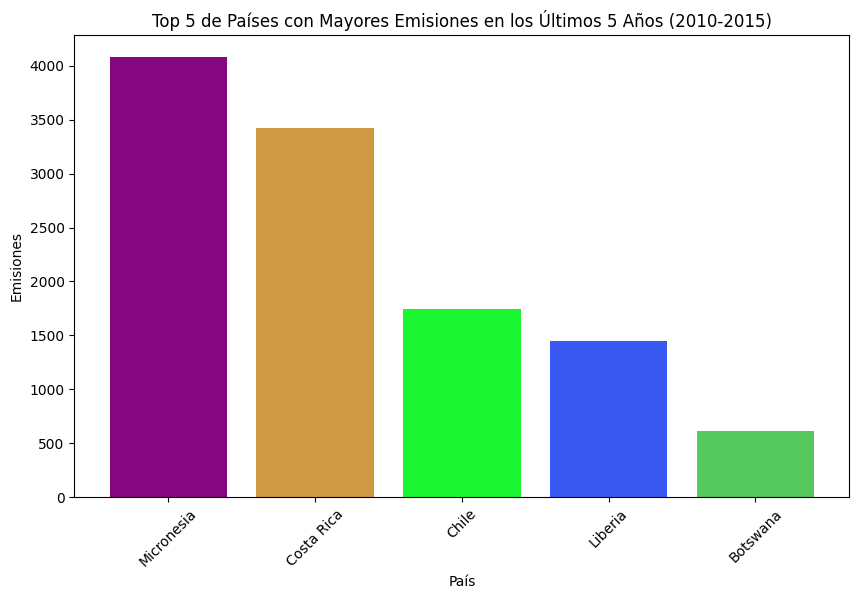

In [29]:
# top 5 de los paises con mayor emision en los ultimos 5 años 
year = data["Year"].unique()[-5:]
df = data[data['Year'].isin(year)]

em = df.groupby("Entity")["Emissions"].sum()
top = em.nlargest(5)

# Imprime los resultados
print(top)

colores_aleatorios = ['#%02X%02X%02X' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(top))]

plt.figure(figsize=(10, 6))
plt.bar(top.index, top.values, color=colores_aleatorios)
plt.xlabel('País')
plt.ylabel('Emisiones')
plt.title('Top 5 de Países con Mayores Emisiones en los Últimos 5 Años (2010-2015)')

plt.xticks(rotation=45)
plt.show()

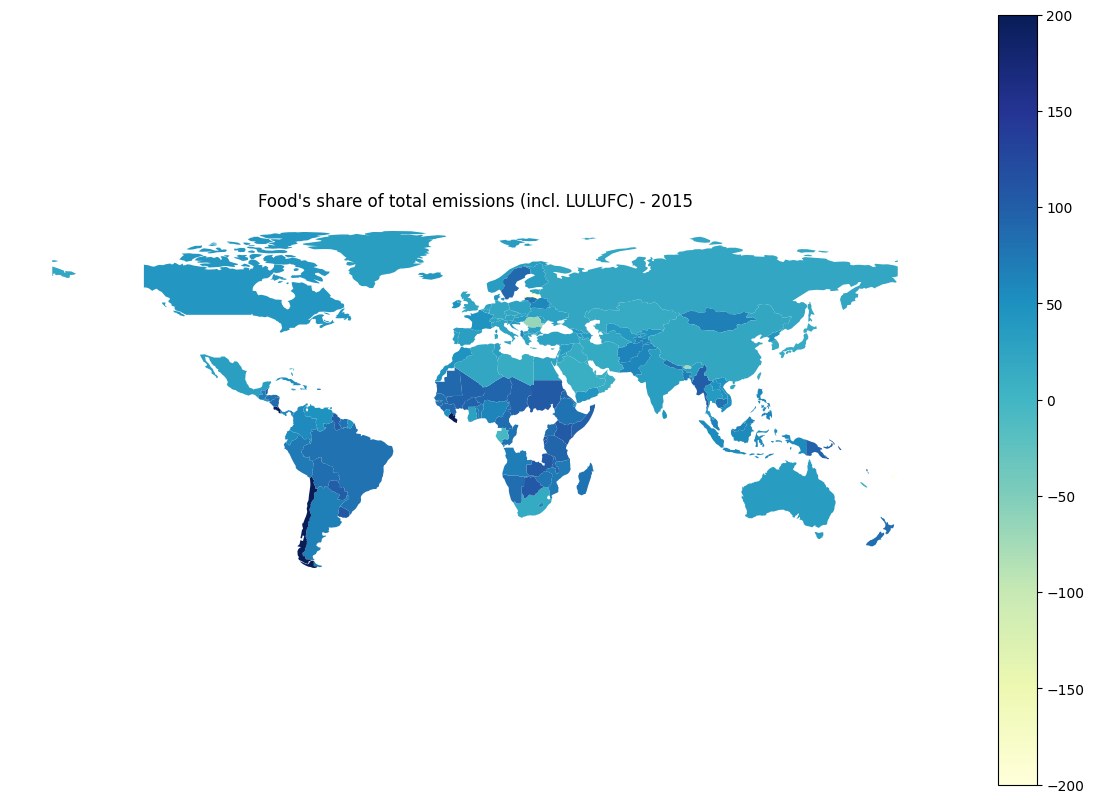

In [22]:
data_2015 = data[data['Year'] == 2015]
world_data = world.merge(data_2015, left_on='name', right_on='Entity')

# Min y max de valores
min_emissions = data["Emissions"].min()
max_emissions = data["Emissions"].max()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_data.plot(column="Emissions", cmap="YlGnBu", linewidth=0.8, ax=ax, legend=True, vmin=-200, vmax=200)

ax.set_title("Food's share of total emissions (incl. LULUFC) - 2015")
ax.set_axis_off()
plt.show()



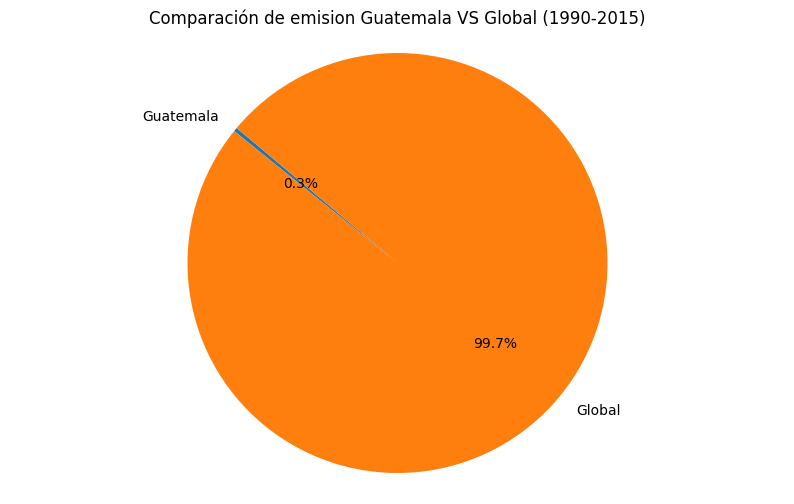

In [30]:
#comparacion de guatemala con el mundo 
df_sin_gtm = data[data['Code'] != 'GTM']
emisiones_guatemala = data[data['Code'] == 'GTM'].groupby(['Code'])['Emissions'].sum()
emisiones_globales = df_sin_gtm.groupby(['Code'])['Emissions'].sum()
suma_emisiones_globales = emisiones_globales.sum()

etiquetas = ['Guatemala', 'Global']
emisiones = [emisiones_guatemala, suma_emisiones_globales]

plt.figure(figsize=(10, 6))
plt.pie(emisiones, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Comparación de emision Guatemala VS Global (1990-2015)')

# Muestra el gráfico
plt.axis('equal')  
plt.show()


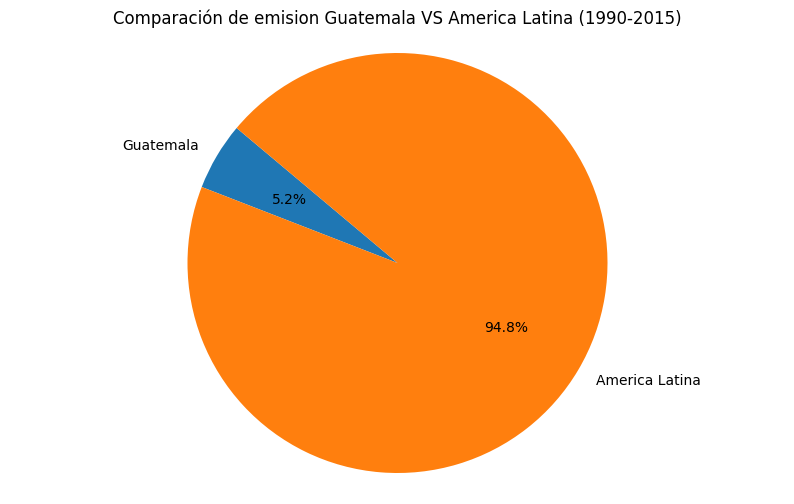

In [31]:
#comparacion de guatemala  y america latina

# Lista de países de América Latina
datos_lat = []
latinoamerica = ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador','Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'República Dominicana', 'Uruguay', 'Venezuela']

# Obtener codigos de los paises
for char in latinoamerica:
    codigo = str(data.loc[data['Entity'] == char, 'Code'].unique())
    if len(codigo) > 4:         
        codigo_str = codigo.replace("[", "").replace("]", "").replace("'", "")
        datos_lat.append(codigo_str)


df =  data[data['Code'].isin(datos_lat)]
em = df.groupby("Code")["Emissions"].sum()
em_lat = []


for i in em.index:
    if i == 'GTM':
        guatemala_emissions = em[i]
    else:
        lat_emissions = em[i]
        em_lat.append(lat_emissions)

sum_emLat = sum(em_lat)

etiquetas = ['Guatemala', 'America Latina']
valores = [guatemala_emissions, sum_emLat]

plt.figure(figsize=(10, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Comparación de emision Guatemala VS America Latina (1990-2015)')

# Muestra el gráfico
plt.axis('equal')  
plt.show()

Reflexión
----

RESPUESTA 